# CQF EXAM Final Project

# Blending Ensemble for Classification (ML)


Summary Table

| CQF Candidate   |
| ----------- |
| Alan Rodriguez |
| June 2023 Cohort |

In [247]:
from IPython.display import display, HTML

### Table of Contents: <a id="table_contents"></a>

- (1)[**Introduction**](#introduction)
    - [***1.1.Objective***](#objective)
    - [***1.2.Technical Note***](#technical_note)
    - [***1.3.Methodology***: Ensemble Learning](#ensemble)
    - [***1.4.Methodology***: Hyperparameter Tuning](#Hyperparameter)


- (2)[Feature Engineering FE](#feature)
    - [2.1.Data decription](#data_description)
    - [2.2.Loading Historical rates dataset](#endog)
    - [2.3.Loading Economic dataset](#exog_fin)
    - [2.4.Loading Financial dataset](#exog_eco)
    - [2.5.Aggregation of Datasets](#aggregation)
    - [2.6.Technical Indicators](#technical)
    - [2.7.Lags Indicators](#lags)
    - [2.8.Binomial Target Variable](#target)


- (3)[Exploratory Data Analysis EDA](#eda)
    - [3.1.Descriptive Statistics](#descriptive_stat)
    - [3.2.Univariate Analysis](#univariate)
    - [3.3.PCA Analysis ](#pca)
    - [3.4.Correlation Analysis ](#correlation)
    - [3.5.Dimensionality Reduction](#dimensionality)
    - [3.6.Multicollinearity Analysis ](#multicollinearity)
    - [3.7.Filtering Methods](#filter)
    - [3.8.Self-Organizing Maps](#som)


- (4)[Data Pre processing and Cleaning](#preprocessing)

  
- (5)[Model Building and Optimization](#model_building)
    - [5.1 Introduction: Modelling and Hyperparameters Tuning](#intro_ht)
    - [5.2.1.Logistic probability regression model with HyperParameter Tuning](#logistic_ht) 
    - [5.2.2.Decision Tree Classifier model with HyperParameter Tuning](#dtc_ht) 
    - [5.2.3.Random Forest Classifier RF model with Hyperparameter Tuning](#rfc_ht) 
    - [5.2.4.Extra Trees Classifier model ET with HyperParameter Tuning](#etc_ht) 
    - [5.2.5.Bagging Classifier model with Hyperparameter Tuning](#bag_ht) 
    - [5.2.6.Support Vector Classifier with Hyperparameter tuning](#svc_ht) 
    - [5.2.7.XGBClassifier (XGBoost)  with Hyperparameter tuning](#xgbc_ht) 
    - [5.2.8.LGBMClassifier (LightGBM) with Hyperparameter tuning](#lgbmc_ht) 
    - [5.2.9.Voting Classifier: Soft_voting](#voting) 
    
- (6)[Evaluation: Backtesting and Trading Strategy](#backtesting)  

- (7)[Conclusion](#conclusion)   
- (8)[References](#references)  



### Introduction <a id="introduction"></a>

- - - - - - -
## **1.1 .Main objective:**<a id="objective">

- The goal is to forecast the daily probability of steepening in the US Treasury Rates curve (variable y= 2s1s curve spread) through the use of an **Ensemble Machine Learning model- Voting Classifier Model (Soft Voting method)** and by using economic and financial data as predictive variables. The dependent variable is  a binary variable that will identify specific episodes in which the target variable surpasses  a predetermined threshold.
- The endogenous data  corresponds to the US Treasury yield curve in all the available maturity tenors published in the FRED database.
- The independent variables (economic and finical data) will be used with lags (more details in Feature Engineering section)
- The time horizon is the last 8 years of available data on a daily basis.
- The prediction target is a daily binomial outcome [0,1]. The binomial outcome corresponds to specific episodes in which the curve moves above an specific threshold. (more details in Feature Engineering: Target Variable section)
- As explanatory variables, we will use a combination of financial and economic data to build the Ensemble learning model and then we will back test the performance of the strategy. 
- The final decision model of the ensemble learning model will be a Soft decision model 
- (i)Hard Voting (majority): voting prediction the final class labels as the class labels that has been predicted most frequently 
- (ii)Soft voting: Soft voting predict the class label by averaging the class probabilities
- What is special of this project is the use of several different approaches to create a comprehensive framework for the voting decision. 
- - - - - - -
**Process:** 
- First, we start by loading the datasets (rates, financial and economic datasets). We create dummies to complement the dataset. 
- After we start creating new features for the model. Economic data is already in a stationarity form (z scores). We also  create the lags. For the binomial target variable, we determine the specific threshold to create the binomial signal.
- Thirdly, we carry the Exploratory Data Analysis (EDA) to analyze the data and find correlations. This step is useful to better understand the  relationships between features. We incorporate a multicollinearity analysis and self organizing maps
- Fourth, we carry some data preprocessing and cleaning previous to the modelling stage.
- Fifth, we can now develop the model. The following classifier model are used: 
- *Logistic regression *
- *Decision Tree Classifier *
- *Random Forest Classifier*
- *Extra Trees Classifier*
- *Support Vector Classifier *
- *Bagging Classifier*
- *XGBClassifier (XGBoost)*
- *LGBMClassifier (LightGBM)*
- *Soft Voting Classifier
        
- Since we already carried the individual hyperparameter tuning, we already know the best  optimized hyperparameters for each base learner for the ensemble learning voting classifier. 
- Sixth, we then back test the results and apply a trading strategy using the signals from the soft voting classifier model. 
- Finally, we provide conclusions regarding the results and provide relevant references.

- - - - - - -

***1.2. Technical Note:***<a id="technical_note">
    
- I have added in the zip file the CSV data sets used in this model
- Additionally, I’m attaching in the zip file the "pkl" files that have loaded each Machine learning model configuration. 
- The following document is easier to navigate using the HTML version.
- Change the directory when running the code


- [Top](#table_contents)

- - - - - - -
### 1.3. Ensemble Learning Voting Classifier<a id="ensemble">

A ***Voting Classifier*** (Supervised ML) is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.

First lets define **Ensemble Learning**:

- **Ensemble Learning methods** are machine learning techniques that combines a concrete finite set of alternative models in order to produce one optimal predictive model with a better overall performance. Its inside the family of  Supervised Learning models.
- ***Ensemble Learning enhances the accuracy and resilience of the forecast by merging the predictions from multiple models while also aiming to mitigate errors or biases that could exist in individual models by using the aggregate intelligence of the ensemble model***. This approach not only enhances accuracy but also provides resilience against uncertainties in the data.
- Ensemble models combine multiple hypotheses to form a better hypothesis.

- - - - - - -
Lets explain the ***different Ensemble techniques***: it can be classified as Heterogenous and Homogeneous models 
- ***Voting Classifiers (Heterogeneous)*** can be divided in Majority, Weighted or Soft Voting (*more details below*)
    - ***Majority or Max Voting***: each model is considered a vote. The predictions which gets the majority of the model's votes are used as the final prediction. In other words, it predicts the class label that has been predicted most frequently by the classification models.
    - ***Soft or Averaging Voting***: average the predictions from all models.
    - ***Weighted Voting***:  Each models is assigned a specific weights, which defines the importance of each model for prediction outcome. 
- ***Stacking (Heterogenous)***: uses the predictions from multiple models (for example decision tree, knn or svm) to build a new model.Basically it involves fitting many different model types on the same data to learn the best combination for the predictions.
- ***Blending***: uses only a holdout set (validation) from the train set to make predictions.
- ***Bagging or Bootstrap Aggregating (Homogenous)***: this technique uses different subsets (bags) to get a fair idea of the distribution (complete set). Bagging involves fitting many decision trees on different sets  of the same dataset and averaging those predictions.
- ***Boosting (Homogenous)***: involves adding ensemble models sequentially that correct the predictions made by prior models and outputs a weighted average of the predictions.

- - - - - - -
**Voting Classifiers with Examples:** What is voting classifier?

- A Voting Classifier aggregates the findings of each classifier and predicts the output class based on the pre set decision rule.
- Instead of creating separate models and finding the accuracy for each model, it generates a single model which is trained by the subset of individual models and predicts the output class based on their combined results. 

***Hard or Majority Voting Classifier:***
- In a hard voting classifier, each individual classifier model in the ensemble makes a single prediction, and the final prediction is determined by a majority vote. The class that receives the most votes among the individual classifiers is the predicted class.

***Soft or Average Voting Classifier:***
- In a soft voting classifier, the individual classifiers not only make class predictions but also provide probability estimates for each class. The final prediction is determined by averaging the class probabilities from each classifier and selecting the class with the highest average probability.

 - - - - - - -

- [Top](#table_contents)  
- - - - - - -
### 1.4.  Hyperarameters Tuning <a id="Hyperarameters"></a>

- The Parameters which define each specific model architecture, or control the behavior of the algorithm, are referred  as **Hyperparameters**
- The process of searching for the ideal ("optimized") model architecture is referred as **Hyperparameter tuning**
- By optimizing a statistical loss function in a model, the model parameters are learned. 
- Therefore, by an iterative sampling process, we can find which are the best parameters that improve the accuracy of the model. 
- **In summary, while the model parameters specify how to transform the input "X" data into the desired "Y" output, the hyperparameters define how our model should actually be structured for optimal forecasting results.**
 
 
- Hyperparameter tuning methods relate to how we sample possible model architecture candidates from the space of possible hyperparameter values. This is often referred to as "searching" the hyperparameter space for the optimum values. 
- There are two main approaches: GridSearch Cross validation and RandomSearch Cross validation.

- - - - - - -
### Grid search CV
- Grid search approach builds a model for each possible combination of all of the hyperparameter values provided, and then evaluates each model, and selects the architecture that  produces the best results.

- - - - - - - 
### RandomSearch CV 
- similar to GridSearchCV, but instead of evaluating all possible combinations of hyperparameter values, it randomly samples a fixed number of hyperparameter combinations from predefined ranges. 
- This is particularly useful when the search space of hyperparameters is large, as it provides a more computationally efficient way to explore different configuration


- [Top](#table_contents)
### Importing Packages <a id="importing_Package"></a>

In [248]:
print("Importing Packages") 
import os
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
from numpy import *
import scipy.stats as stats0
from scipy.stats import norm as norm0
import math as math0
from tabulate import tabulate  
import sympy as sp
import scipy.stats as si
from scipy import stats
import matplotlib
import datetime as dt
import seaborn as sns
import matplotlib.ticker as mtick
import pandas_datareader.data as web
from pandas.tseries.offsets import BDay
from dateutil.relativedelta import relativedelta
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sbs
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')
import pickle
import time
from tqdm import tqdm
import joblib
import time

Importing Packages


In [249]:
print("scikit SKLEARN Packages") 
#import sklearn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV, learning_curve
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from boruta import BorutaPy
from sklearn.model_selection import train_test_split, cross_val_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
#References Mahmudul Hasan " A blening ensemble learning model for crude oil pirce prediciont" 2022
#from sklearn.model_selection import train_test_split, 

scikit SKLEARN Packages


- [Top](#table_contents)

## 2. Feature Engineering <a id="feature"></a>

- First, we will describe the variables of the model, then we will start loading the three dataset and aggregating them
- The we start creating the technical Indicators and scaling indicators. Finally we process  with the target variable.


- [Top](#table_contents)
    
- - - - - - -
## 2.1. Variables:<a id="data_description"></a>

- **US Treasury Yield Curve:** 
- Is the set of yields of the U.S. Treasury securities across various maturities. The yield curve illustrates the relationship between the interest rates (yields) and the time to maturity for a range of government bonds.  Curve spreads are the difference between tenors. For examples the "2s1s" is the difference between the yields of the maturity tenors of 2y and 1y.The curve spread can indicate if the curve is steepening or flatenning

- Source: https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2022   

- - - - - - -
-**Financial variables:**
- ***SPX 500 Index***
- ***FTSE Index***
- ***Dax index***
- ***DXY usd dollar index***
- ***Vix ***

- - - - - - -
-**Economics variables:**
- ***Prices: Headline Monthly Inflation:***
- ***Prices: Core Monthly inflation***
- ***Prices: Core PCE***
- ***Prices: Cleveland median pce****
- ***Real Sector: Retail Sales excluding Auto Sales***
- ***Real Sector: GDP****
- ***Real Sector: Household consumption***
- ***Real Sector: S&P Monthly GDP DATA***
- *** Real Sector: Industrial Activity***
- ***Cycle sector: PMI***
- ***Cycle sector: Michigan Consumer Survey***
- ***Cycle sector: Conference Consumer Board***
- ***Cycle sector: Chicago Business***
- ***Cycle sector: ISM MANUFACTURING***
- ***Cycle sector: ism services***
- ***Employment Sector: Initial Jobless Claims***
- ***Employment Sector: Continuous jobless Claims ***
- ***Employment Sector: Jolts Hiring RATES***
- ***Employment Sector: - Employment Sector: Unemployment***
- ***Employment Sector: Participation***
- ***Employment Sector: NFP***
- - - - - - -
-***Calendar Seasonality***: Dummy for day of the week, day of the month, month, quarter, year


- [Top](#table_contents)
### 2.2. Loading Historical rates data (1/3)

In [251]:
print("2.2. Feature Engineering: Loading Historical rates data")
###First, lets load the rates dataset and establish work directory
os.chdir('C:/Alan_UK19/2022 CQF/2023 Project/Data/')
print("Load dataset")
#df = pd.read_csv('C:/Alan_UK19/2022 CQF/2023 Project/Data/dataset.csv', index_col=0, parse_dates=True)
df = pd.read_csv('dataset.csv',)
df = df.iloc[::-1]
#setting index
df = df.set_index('Date')
df = df.apply(pd.to_numeric, errors='coerce')
##Check for Missing Values . drop na and drop duplicates
#df = df.dropna(how='all')
#print("Reviewing that there  are no Null values")
#df.isnull().sum() 
#print(df.columns)
df_original=df.copy()
#print("Size")
#print(df.head(4))
print(df.shape[0])
df.columns = df.columns.str.lower()
#converting index to yyyy-mm-dd format
df.index = pd.to_datetime(df.index, origin='1899-12-30', unit='D')
df['date0']=df.index

print("Seasonality dummy")
# Create dummy columns for each month, day, and year
#print("Month")
df_d=pd.get_dummies(df.index.month, prefix='Month')
df_d.index=df.index
df_d_l0 = df_d.columns.tolist()
#print(df_d.columns.tolist())
df = pd.concat([df, df_d],axis=1, sort=False)
#print("Daily")
df_d=pd.get_dummies(df.index.day, prefix='Day')
df_d.index=df.index
df_d_l1 = df_d.columns.tolist()
df_d_l0 = df_d_l0+df_d_l1
#print(df_d.columns.tolist())
df = pd.concat([df, df_d],axis=1, sort=False)
#print("Daily")
df_d=pd.get_dummies(df.index.dayofweek, prefix='Day_of_Week')
df_d.index=df.index
df_d_l1 = df_d.columns.tolist()
df_d_l0 = df_d_l0+df_d_l1
#print(df_d.columns.tolist())
df = pd.concat([df, df_d],axis=1, sort=False)
print(df_d.columns.tolist())
#print("Year")
df_d=pd.get_dummies(df.index.year, prefix='Year')
df_d.index=df.index
df_d_l1 = df_d.columns.tolist()
df_d_l0 = df_d_l0+df_d_l1
#print(df_d.columns.tolist())
df = pd.concat([df, df_d],axis=1, sort=False) 
#print(df_d.columns.tolist())
#print(df_d_l0)       
#print(df.columns.tolist())
#df_bu0002=df.copy()

print("Creating the Yield Curve spreads")
df['6m1s']=df['6 mo']-df['1 yr']
df['2s1s']=df['2 yr']-df['1 yr']
df['3s1s']=df['3 yr']-df['1 yr']
df['5s1s']=df['5 yr']-df['1 yr']
#df['7s1s']=df['7 yr']-df['1 yr']
#df['10s1s']=df['10 yr']-df['1 yr']
df['3s2s']=df['3 yr']-df['2 yr']
df['5s2s']=df['5 yr']-df['2 yr']
df['7s2s']=df['7 yr']-df['2 yr']
df['10s2s']=df['10 yr']-df['2 yr']
df['5s3s']=df['5 yr']-df['3 yr']
df['7s3s']=df['7 yr']-df['3 yr']
df['10s3s']=df['10 yr']-df['3 yr']
df['7s5s']=df['7 yr']-df['5 yr']
df['10s5s']=df['10 yr']-df['5 yr']

print("Creating daily differential of the yield curve spreads and logarithmic returns")
#print("List of columns before loop")
lag_variables = ['6m1s','2s1s','3s1s','5s1s',
                 '3s2s','5s2s','7s2s','10s2s',
                 '5s3s','7s3s','10s3s',
                 '7s5s','10s5s']
#print("Creating daily differential")
list_variable_names1 = []
# Loop to generate lagged columns
for variable in lag_variables:
    new_column_name = f"{variable}_diff"
    df[new_column_name] = df[variable].diff()
    list_variable_names1.append(new_column_name)
    new_column_name2 = f"{variable}_log_return"
    df[new_column_name2] = np.log(df[variable] / df[variable].shift(1))
    list_variable_names1.append(new_column_name2)
    
    
print("Dimensionality reduction:Scaling dataset and adding back the columns")
#MinMaxScaler
scaler = MinMaxScaler()
# Extracting the columns to be scaled
columns_to_scale =lag_variables
# Performing Min-Max scaling
scaled_values = scaler.fit_transform(df[columns_to_scale])
# Creating a new DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_values, columns=[f'{col}_scaled' for col in columns_to_scale])
# Adding the scaled columns to the original DataFrame
scaled_df.index=df.index
print(scaled_df.shape[0],scaled_df.shape[1])
print(df.shape[0],df.shape[1])
#print(scaled_df.head(5))
df = pd.concat([df, scaled_df], axis=1)
print(scaled_df.shape[0],scaled_df.shape[1])
print(df.shape[0],df.shape[1])  
print("list of rate varaibles")  
### Concatenating list of indeopendent variables 
list_endog =   lag_variables+list_variable_names1
#print(list_endog)
print(df.shape[0])
print(df.shape[1])
# step backup
df_bu0001 =df.copy()
df_bu0001.to_clipboard()
del scaled_values,scaler,scaled_df,df_d_l0,df_d_l1,df_d
print("2.2. Feature Engineering: Loading Historical rates data")

2.2. Feature Engineering: Loading Historical rates data
Load dataset
4003
Seasonality dummy
['Day_of_Week_0', 'Day_of_Week_1', 'Day_of_Week_2', 'Day_of_Week_3', 'Day_of_Week_4']
Creating the Yield Curve spreads
Creating daily differential of the yield curve spreads and logarithmic returns
Dimensionality reduction:Scaling dataset and adding back the columns
4003 13
4003 117
4003 13
4003 130
list of rate varaibles
4003
130
2.2. Feature Engineering: Loading Historical rates data


***Comment***:
- We load the rates dataset. 

- [Top](#table_contents)
### 2.3. Loading economic dataset (2/3)

In [253]:
print("2.3. Feature Engineering: loading economic dataset")
df_exog_eco = pd.read_csv('dataset_exog_eco.csv', )
#df_exog_eco = df_exog_eco.iloc[::-1]
df_exog_eco = df_exog_eco.set_index('Date')
df_exog_eco = df_exog_eco.apply(pd.to_numeric, errors='coerce')
df_exog_eco.columns = df_exog_eco.columns.str.lower()
df_exog_eco.index = pd.to_datetime(df_exog_eco.index, origin='1899-12-30', unit='D')
#list_exog_eco=df_exog_eco.columns.tolist()
#print("List of varaibles)
list_exo_f =['nfp_diff','private_nfp_diff',
             'nfp_diff_rm','nfp_diff_zscore5y',
             'private_nfp_diff_rm','private_nfp_diff_zscore5y',
             'participation_rate',
             'ur',
             'ur_rm','ur_zscore5y',
             'michigan_consumer',
             'michigan_consumer_rm','michigan_consumer_zscore5y',
             'chicago_activity',
            'chicago_activity_rm','chicago_activity_zscore5y',
            'industrial_prod_rm','industrial_prod_zscore5y',
            'retail_sales_rm','retail_sales_zscore5y',
            'retail_sales_yy','retail_sales_6m_ann','retail_sales_3m_ann','retail_sales_mm',
            'industrial_prod_yy','industrial_prod_6m_ann','industrial_prod_3m_ann','industrial_prod_mm',
            'headline_cpi_yy','headline_cpi_6m_ann','headline_cpi_3m_ann','headline_cpi_mm',
            'core_cpi_yy','core_cpi_6m_ann','core_cpi_3m_ann','core_cpi_mm',
            'pce_deflator_yy','pce_deflator_6m_ann','pce_deflator_3m_ann','pce_deflator_mm',
            'core_pce_deflator_yy','core_pce_deflator_6m_ann','core_pce_deflator_3m_ann','core_pce_deflator_mm',
            'cleveland_median_pce']
df_exog_eco=df_exog_eco[list_exo_f]

print("Dimensionality reduction:Scaling dataset and adding back the columns")
list_exo_s= ['retail_sales_rm','cleveland_median_pce',
             'michigan_consumer', 'chicago_activity',  
             'nfp_diff','private_nfp_diff',  ]

# Min max scaling of features
scaler = MinMaxScaler()
# Extract the columns to be scaled
columns_to_scale =list_exo_s
# Perform Min-Max scaling
scaled_values = scaler.fit_transform(df_exog_eco[columns_to_scale])
# Create a new DataFrame with scaled values
scaled_df_exog_eco = pd.DataFrame(scaled_values, columns=[f'{col}_scaled' for col in columns_to_scale])
# Add the scaled columns to the original DataFrame
scaled_df_exog_eco.index=df_exog_eco.index
print(scaled_df_exog_eco.shape[0],scaled_df_exog_eco.shape[1])
print(df.shape[0],df.shape[1])
#print(scaled_df.head(5))
df_exog_eco = pd.concat([df_exog_eco, scaled_df_exog_eco], axis=1)
print(scaled_df_exog_eco.shape[0],scaled_df_exog_eco.shape[1])
print(df.shape[0],df.shape[1])   
    
    
list_exog_eco=df_exog_eco.columns.tolist()
#print(list_exog_eco)
print(df_exog_eco.shape[0])
print(df_exog_eco.shape[1])
df_bu0002 =df_exog_eco.copy()
df_bu0002.to_clipboard()
del scaler,scaled_values,scaled_df_exog_eco
print("2.3 Feature Engineering: load exogenous economic dataset")



2.3. Feature Engineering: loading economic dataset
Dimensionality reduction:Scaling dataset and adding back the columns
6261 6
4003 130
6261 6
4003 130
6261
51
2.3 Feature Engineering: load exogenous economic dataset


- [Top](#table_contents)
### 2.4. loading financial dataset (3/3)

In [255]:
print("2.4.Feature Engineering: loading financial dataset")
df_exog_fin = pd.read_csv('dataset_exog_fin.csv', )
#df_exog_eco df_exog_eco.iloc[::-1] df_exog_fin
df_exog_fin = df_exog_fin.apply(pd.to_numeric, errors='coerce')
df_exog_fin.columns=df_exog_fin.columns.str.lower()
df_exog_fin=df_exog_fin.set_index('date')
df_exog_fin.index=pd.to_datetime (df_exog_fin.index, origin='1899-12-30', unit='D')
######filtering
list_ffill=['sp500', 'ftse', 'nasdaq', 'dax', 'usd_index', 'vix'] 
df_exog_fin[list_ffill]=df_exog_fin[list_ffill].fillna (method='ffill')
df_exog_fin=df_exog_fin.drop('ftse',axis=1)
df_exog_fin=df_exog_fin.drop('vix',axis=1)
list_exog_fin=df_exog_fin.columns.tolist()

print("Creating daily differential and logarithmic return ")
#print("List of columns before loop")
lag_variables = ['sp500',  'nasdaq', 'dax', 'usd_index', ]
#print("Creating daily differential")
list_variable_names1 = []
# Loop to generate lagged columns
for variable in lag_variables:
    new_column_name = f"{variable}_diff"
    df_exog_fin[new_column_name] = df_exog_fin[variable].diff()
    list_variable_names1.append(new_column_name)
    new_column_name2 = f"{variable}_log_return"
    df_exog_fin[new_column_name2] = np.log(df_exog_fin[variable] / df_exog_fin[variable].shift(1))
    list_variable_names1.append(new_column_name2)
    
    
print("Dimensionality reduction:Scaling dataset and adding back the columns")
#MinMaxScaler
scaler = MinMaxScaler()
# Extract the columns to be scaled
columns_to_scale =lag_variables
# Perform Min-Max scaling
scaled_values = scaler.fit_transform(df_exog_fin[columns_to_scale])
# Create a new DataFrame with scaled values
scaled_df_exog_fin = pd.DataFrame(scaled_values, columns=[f'{col}_scaled' for col in columns_to_scale])
# Add the scaled columns to the original DataFrame
scaled_df_exog_fin.index=df_exog_fin.index
print(df_exog_fin.shape[0],df_exog_fin.shape[1])
df_exog_fin = pd.concat([df_exog_fin, scaled_df_exog_fin], axis=1)
print(df_exog_fin.shape[0],df_exog_fin.shape[1])
#print(list_exog_fin)
print (df_exog_fin.shape[0])
print(df_exog_fin.shape[1])
df_bu0003 =df_exog_fin.copy()
df_bu0003.to_clipboard()
#print(df_exog_fin.head())
del scaler,scaled_values, scaled_df_exog_fin,lag_variables,list_ffill
print("2.4.Feature Engineering: loading financial dataset")

2.4.Feature Engineering: loading financial dataset
Creating daily differential and logarithmic return 
Dimensionality reduction:Scaling dataset and adding back the columns
6177 12
6177 16
6177
16
2.4.Feature Engineering: loading financial dataset




- [Top](#table_contents)
### 2.5. Aggregating dataset (3/3) <a id="aggregation">

In [256]:
print("2.5. Feature Engineering: Matching the 3 datasets: rates, economic data, financial data")
df_complete = pd.merge(df, df_exog_eco, left_index=True, right_index=True, how='left',)
df_complete = pd.merge(df_complete, df_exog_fin, left_index=True, right_index=True, how='left',)
df_complete = df_complete.fillna(method='ffill')
del df
del df_exog_eco
del df_exog_fin 
#print(df_complete.shape[0])
#print(df_complete.shape[1])
df_complete_list=list_endog+list_exog_eco+list_exog_fin
#print(df_complete_list)
original_count = len(df_complete_list)
#print(len(df_complete_list))
df_complete_list = list(set (df_complete_list)) 
#print(len(df_complete_list))
df_complete_list_markets=list_endog+list_exog_fin
#print(df_complete_list_markets)
original_count = len(df_complete_list_markets) 
#print(len(df_complete_list_markets))
df_complete_list_markets = list(set(df_complete_list_markets))
#print(len(df_complete_list_markets))
print("2.5. Feature Engineering: Matching the 3 datasets: rates, economic data, financial data")
#df_complete.to_clipboard()

2.5. Feature Engineering: Matching the 3 datasets: rates, economic data, financial data
Feature Engineering: Matching the 3 datasets: rates, economic data, financial data


- [Top](#table_contents)

- [Top](#table_contents)
### 2.6. Technical Indicators <a id="technical_indicators"></a>

We will create technical indicators for the finacial variables in order to test their predicitve power in the model.
- - - - - - -
#### **MAV Moving Average** 
- MAV is a statistical calculation used to analyze data over a certain time period to identify trends or patterns. 
- It is particularly useful for smoothing out fluctuations in time series data.
- - - - - - -
#### **EWMA- Exponentially Weighted Moving Average**
- EWMA is an enhancement of the traditional moving average that assigns exponentially decreasing weights to historical observations. EWMA gives more weight to recent observations while still considering older data points, providing a more responsive measure of trends and variations over time.

 $$  \text{EWMA}_{t} = (1 - \lambda) \cdot \text{EWMA}_{t-1} + \lambda \cdot X_t \ $$

- EWMA t is the EWMA at time 
- λ is the smoothing parameter (also known as the smoothing factor or weight) The smoothing parameter λ determines the weight assigned to the most recent observation
- X t is the observed value at time 

- EWMA Characteristics:
- ***Volatility Estimation***: EWMA is commonly used for estimating volatility since it responds quickly to recent market conditions.
- ***Exponential Decay***: The term "exponential" in EWMA reflects the fact that the weights assigned to older observations decrease exponentially.
- - - - - - -
#### **Bollinger Bands (BB) **
- **Bollinger Bands**: is a technical indicator to assess the volatility and potential price movements.
- The primary purpose of Bollinger Bands is to provide a relative definition of high and low prices.
- The bands are constructed based on simple moving averages and standard deviation times the number of standard deviations
- The bands expand and contract based on the volatility of the market.
- The bands widen during more volatile periods and contract during less volatile periods 

$$ \text{Upper Bollinger Band} = SMA(close, N) + \text{number of standard deviations}*st.dev(close, N) $$
$$ \text{Lower Bollinger Band} = SMA(close, N) - \text{number of standard deviations}*st.dev(close, N) $$

- ***Middle Band (Simple Moving Average)***: The middle band is a moving average, typically calculated over a specified period, such as 20 days
- ***Upper Band:*** The upper band is derived by adding a multiple of the standard deviation of the asset's price to the middle band
- ***Upper Band:*** The upper band is derived by adding a multiple of the standard deviation of the asset's price to the middle band
   
- Overbought and Oversold Conditions: When prices touch or exceed the upper band, the asset may be overbought, suggesting a potential reversal or pullback. Conversely, when prices touch or fall below the lower band, the asset may be oversold, indicating a potential rebound.
- Volatility Squeeze: A period of low volatility is often indicated by the bands contracting closely together. 
- Trend Confirmation: Prices consistently riding along the upper band may indicate a strong uptrend, while prices hugging the lower band may signify a strong downtrend.

- - - - - - -
##### **MACD**
- **Moving Average Convergence Divergence, or MACD** is a technical  indicator that provides insights into the momentum and trend strength. 
- The MACD indicator is the difference between EMA over period M and EMA over the period N. M is usually 12 and N is 26.
- Trend Identification: Traders use the MACD to identify the overall trend direction of an asset. When the MACD line is above the Signal Line, it suggests a bullish trend, and when it is below, it indicates a bearish trend.
- Momentum Confirmation: The MACD Histogram is used to confirm the strength of a price move. Rising histogram bars indicate increasing momentum, while declining bars suggest waning momentum.

$$ MACD = EMA(M) - EMA(N),  {\quad}  $$

- ***MACD Line (Fast Line):*** The MACD line is the core component and is calculated by subtracting the longer-term Exponential Moving Average (EMA) from the shorter-term EMA. The standard short-term period is 12 days, and the standard long-term period is 26 days.
- ***Signal Line (Slow Line):*** The Signal Line is a 9-day EMA of the MACD line. It helps smooth out the MACD line, making it easier to identify potential trend reversals or shifts in momentum.
- ***Histogram:*** The Histogram represents the difference between the MACD line and the Signal Line. It is plotted below the MACD chart and provides a visual representation of the divergence or convergence between the two lines. When the histogram is above zero, it indicates bullish momentum, while below zero suggests bearish momentum



- - - - - - -
#### **Relative Strength Index (RSI)**
- The **Relative Strength Index (RSI)** is a momentum oscillator, measuring the velocity and magnitude of directional price movements. Usually, it is bounded between 0 and 100. 
- To compute it, we compute upward `U` and downard `D` changes. `U` measures are charaterized by the situation when the close being higher than the previous close. If close prices do not change over a period `U` and `D` are zeros. 


$$ U = close_{t} - close_{t-1},  {\quad} $$
$$ D = 0 $$
$$ U = 0 $$
$$ D = close_{t-1} - close_{t},  {\quad} $$
$$ RSI = 100*{ EMA_{N}(p) \; of \; U \over EMA_{N}(p) \; of \; U + EMA_{N}(p) \; of \; D },  {\quad}  $$


- Overbought Conditions: When the RSI surpasses the 70 level, there is a higher likelihood of a potential reversal
- Oversold Conditions: when the RSI falls below the 30 level, there is a higher likelihood of a potential upward reversal 
- Bullish Divergence: Occurs when the price makes new lows, but the RSI fails to confirm those lows, creating a potential signal for a bullish reversal.
- Bearish Divergence: Occurs when the price makes new highs, but the RSI fails to confirm those highs, signaling a potential bearish reversal.

- - - - - - -

#### **Commodity Channel Index (CCI)**
- **Commodity Channel Index (CCI)** is a momentum-based technical indicator to track cyclical movements in commodity and other asset prices. 
- CCI divergence can provide potential signals for trend reversals.

$$ {TP_{t} = p_{t} = {\frac {high_{t} + low_{t} + close_{t}}{3}} },  {\quad}   $$

$$ {\displaystyle CCI_{t}={\frac {1}{0.015}}\cdot 
    {\frac {p_{t}-{\textit {SMA}}_{n}(p_{t})}{{\textit {MAD}}_{n}(p_{t})}}},  {\quad}   $$
    
    
- Overbought: When the CCI moves above +100, it indicates that the asset may be overextended to the upside.
- Oversold: Conversely, when the CCI falls below -100, it suggests that the asset may be oversold

- - - - - - -
#### Z score Standard scale



### 2.6. Technical Indicators <a id="technical"></a>

In [257]:
print("2.6. Feature Engineering: Technical Indicators")
print("Technical Indicators: applying hte technical indicators to the dataset")


df_complete_list_markets0=['6m1s','5s2s','10s3s','2s1s',
                           '3s1s','10s5s','7s3s','7s5s',
                           '3s2s','10s2s','5s3s','5s1s','7s2s',
                           'nasdaq','sp500','usd_index','dax',]


#target='y_10Y_USD'
#print("parameters")
rsi_period=14
k_period=14
d_period=3
cci_period=30
print("for rates and market financial variables")
df_complete_list0=df_complete_list_markets0
df=df_complete.copy()
for variable in df_complete_list0:
    #print(variable)
    column_name = str(variable)
    #print("rolling avg")
    #df[str(column_name)+'_rolling_avg5']=df [column_name].rolling (window=5).mean()
    df[str(column_name)+'_rolling_avg10']=df [column_name].rolling (window=10).mean()
    df[str(column_name)+'_rolling_avg22']=df [column_name].rolling (window=22).mean()
    df[str(column_name)+'_rolling_avg44']=df[column_name].rolling (window=44) .mean()
    df[str(column_name)+'_rolling_avg66']=df [column_name].rolling (window=66) .mean()    
    #print("rolling max")
    #df[str(column_name)+'_rolling_max5']=df [column_name].rolling (window=5).max()
    df[str(column_name)+'_rolling_max10']=df [column_name].rolling (window=10).max()
    df[str(column_name)+'_rolling_max22']=df[column_name].rolling (window=22).max()
    df[str(column_name)+'_rolling_max44']=df [column_name].rolling (window=44) .max()
    df[str(column_name)+'_rolling_max66']=df[column_name].rolling (window=66) .max()
    #print("rolling min")
    #df[str(column_name)+'_rolling_min5']=df[column_name].rolling (window=5).min()
    df[str(column_name)+'_rolling_min10']=df [column_name].rolling (window=10).min()
    df[str(column_name)+'_rolling_min22']=df[column_name].rolling (window=22).min()
    df[str(column_name)+'_rolling_min44']=df [column_name].rolling (window=44).min()
    df[str(column_name)+'_rolling_min66']=df [column_name].rolling (window=66) .min()
    #print("macd")
    df[str(column_name)+'_short_ema']=df[column_name].ewm(span=12, adjust=False).mean()
    df[str(column_name)+'_long_ema']=df[column_name].ewm (span=26, adjust=False).mean()
    df[str(column_name)+'_macd_line'] = df[str(column_name)+'_short_ema']-df[str(column_name)+'_long_ema']
    df[str(column_name)+'_macd_line']=df[str(column_name)+'_short_ema']-df[str(column_name)+'_long_ema']
    df[str(column_name)+'_signal_line'] = df[str(column_name)+'_macd_line'].ewm (span=9, adjust=False).mean()
    df[str(column_name)+'_macd_histogram'] = df[str(column_name)+'_macd_line'].ewm (span=9, adjust=False).mean()
    #df['k']=((df[target]-df[target].rolling (window-k_period).min())/(df [target].rolling (window-k_period).max()-df[target].rollir
    #df['d']=df['k'].rolling (window=d_period).mean()
    #print("Commodity Channel Index")
    df[str(column_name)+'_typical_price']=df[column_name]
    #df[str(column_name)+'_mean_deviation']=abs (df[str(column_name)+'_typical_price'] -df[str(column_name)+'_typical_price'].rolling (window=cci_period).mean())
    #df[str(column_name)+'_cci']=(df[str(column_name)+'_typical_price' ]-df[str(column_name)+'_typical_price'].rolling(window=cci_period).mean())/(0.015*df[str(column_name)+'_mean_deviation'].rolling(window=cci_period))
    #### Bollinger Bands
    df[str(column_name)+'_mavg20']=df[column_name].rolling (window=20).mean() 
    df[str(column_name)+'_std_dev20']=df[column_name].rolling (window=20).std()
    df[str(column_name)+'_upper_band20']=df[str(column_name)+'_mavg20']+2*df[str(column_name)+'_std_dev20']
    df[str(column_name)+'_lower_band20']=df[str(column_name)+'_mavg20' ]-2*df[str(column_name)+'_std_dev20']
    #### Bollinger Bands
    df[str(column_name)+'_mavg40']=df[column_name].rolling (window=40).mean() 
    df[str(column_name)+'_std_dev40']=df[column_name].rolling (window=40).std()
    df[str(column_name)+'_upper_band40']=df[str(column_name)+'_mavg40']+2*df[str(column_name)+'_std_dev40']
    df[str(column_name)+'_lower_band40']=df[str(column_name)+'_mavg40' ]-2*df[str(column_name)+'_std_dev40']
    #### Bollinger Bands
    df[str(column_name)+'_mavg60']=df[column_name].rolling (window=60).mean() 
    df[str(column_name)+'_std_dev60']=df[column_name].rolling (window=60).std()
    df[str(column_name)+'_upper_band60']=df[str(column_name)+'_mavg60']+2*df[str(column_name)+'_std_dev60']
    df[str(column_name)+'_lower_band60']=df[str(column_name)+'_mavg60' ]-2*df[str(column_name)+'_std_dev60']

    ####rsi
    df[str(column_name)+'_price_change']=df[column_name].diff()
    df[str(column_name)+'_gain']=df[str(column_name)+'_price_change'].apply(lambda x: x if x>0 else 0) 
    df[str(column_name)+'_loss']=df[str(column_name)+'_price_change'].apply(lambda x:-x if x<0 else 0)
    df[str(column_name)+'_avg_gain']=df[str(column_name)+'_gain'].rolling(window=rsi_period).mean() 
                                                                                                                                 
    df[str(column_name)+'_avg_loss']=df[str(column_name)+'_loss'].rolling(window=rsi_period).mean() 
    df[str(column_name)+'_rs']=(df[str(column_name)+'_avg_gain']/df[str(column_name)+'_avg_loss'])
    df[str(column_name)+'_rsi']=(100-(100/(1+df[str(column_name)+'_rs'])))
    ###### z score
    #30d
    df[str(column_name)+'_mavg30']=df[column_name].rolling (window=30).mean() 
    df[str(column_name)+'_std_dev30']=df[column_name].rolling (window=30).std()
    df[str(column_name)+'_zscore30']=(df[column_name]- df[str(column_name)+'_mavg30'])/df[str(column_name)+'_std_dev30']
    #60d
    df[str(column_name)+'_mavg60']=df[column_name].rolling (window=60).mean() 
    df[str(column_name)+'_std_dev60']=df[column_name].rolling (window=60).std()
    df[str(column_name)+'_zscore60']=(df[column_name]- df[str(column_name)+'_mavg60'])/df[str(column_name)+'_std_dev60']
    #90d
    df[str(column_name)+'_mavg90']=df[column_name].rolling (window=90).mean() 
    df[str(column_name)+'_std_dev90']=df[column_name].rolling (window=90).std()
    df[str(column_name)+'_zscore90']=(df[column_name]- df[str(column_name)+'_mavg90'])/df[str(column_name)+'_std_dev90']
    #120d
    df[str(column_name)+'_mavg120']=df[column_name].rolling (window=120).mean() 
    df[str(column_name)+'_std_dev120']=df[column_name].rolling (window=120).std()
    df[str(column_name)+'_zscore120']=(df[column_name]- df[str(column_name)+'_mavg120'])/df[str(column_name)+'_std_dev120']
    #150d
    df[str(column_name)+'_mavg150']=df[column_name].rolling (window=150).mean() 
    df[str(column_name)+'_std_dev150']=df[column_name].rolling (window=150).std()
    df[str(column_name)+'_zscore150']=(df[column_name]- df[str(column_name)+'_mavg150'])/df[str(column_name)+'_std_dev150']
    
    #180d
    df[str(column_name)+'_mavg180']=df[column_name].rolling (window=180).mean() 
    df[str(column_name)+'_std_dev180']=df[column_name].rolling (window=180).std()
    df[str(column_name)+'_zscore180']=(df[column_name]- df[str(column_name)+'_mavg180'])/df[str(column_name)+'_std_dev180']
    
    
    list_loop_l =[
       str(column_name)+'_rolling_avg10', 
       str(column_name)+'_rolling_avg22',
       str(column_name)+'_rolling_avg44', 
        str(column_name)+'_rolling_avg66',
       str(column_name)+'_rolling_max10',
       str(column_name)+'_rolling_max22',
       str(column_name)+'_rolling_max44',
        str(column_name)+'_rolling_max66',
       str(column_name)+'_rolling_min10',
       str(column_name)+'_rolling_min22',
       str(column_name)+'_rolling_min44', 
        str(column_name)+'_rolling_min66', 
       str(column_name)+'_macd_histogram',
       str(column_name)+'_upper_band20',
       str(column_name)+'_lower_band20',
       str(column_name)+'_upper_band40',
       str(column_name)+'_lower_band40',
       str(column_name)+'_upper_band60',
       str(column_name)+'_lower_band60',
        str(column_name)+'_zscore30',
        str(column_name)+'_zscore60',
        str(column_name)+'_zscore90',
        str(column_name)+'_zscore120',
        str(column_name)+'_zscore150',
        str(column_name)+'_zscore180',]
    df_complete_list0 =df_complete_list0+list_loop_l   
    del list_loop_l
df_complete002=df.copy()  
del df
df_complete_list0_t=df_complete_list0
print("2.6. Feature Engineering:Building Technical Indicators Complete")

2.6. Feature Engineering: Technical Indicators
Technical Indicators: applying hte technical indicators to the dataset
for rates and market financial variables
2.6. Feature Engineering:Building Technical Indicators Complete


****Comment***: We apply a series of technical indicators to the predictive variables. 
    
    

- [Top](#table_contents)
### 2.7. Defining Lags<a id="lags"></a>

In [258]:
print("2.7. Feature Engineering: Lags")
#print("Creating lags for rates and market variables (dont go above 20)")



list_c =['6m1s','5s1s','3s1s','3s2s','5s3s','10s2s','10s5s','7s2s','nasdaq','sp500','usd_index']
list_d =['_diff']
list_cf = [elem1 + elem2 for elem1 in list_c for elem2 in list_d]
list_cf = list(set(list_cf))


max_lag = 7
#list_variable_names2 = []
# Loop to generate lagged columns
df_complete_list0f=df_complete_list0+list_cf
df_complete_list0f = list(set(df_complete_list0f))

for variable in df_complete_list0f:
    for lag in range(1, max_lag + 1):
        #print(variable)
        #print(lag)
        new_column_name = f"{variable}_lag{lag}"
        #print(new_column_name)
        df_complete002[new_column_name] = df_complete002[variable].shift(lag)
        #list_variable_names2.append(new_column_name)
print("2.7. Feature Engineering: Lags")   

2.7. Feature Engineering: Lags
Feature Engineering: Lags


In [ ]:
#print(df_complete002[variable])

***Comment**: we incorporate lags since we cannot forecast with variables that would not be available at the moment of the predictions there ore is necessary to create them 
Also in next step test the import statistical importance of those lagged variables  


- [Top](#table_contents)
### 2.8. Defining Target variable for Binomial Clasification<a id="target"></a>

2.8. Feature Engineering: Defining Target variable for Binomial Clasification
Target variable
Counting target variable
0    2965
1    1038
Name: target_y, dtype: int64

Percentages:
Percentage of 0s: 74.07%
Percentage of 1s: 25.93%
target_y    0   1
year             
2008      192  59
2009      167  83
2010      179  72
2011      190  60
2012      216  34
2013      197  53
2014      193  57
2015      176  75
2016      185  65
2017      198  52
2018      195  54
2019      175  75
2020      193  58
2021      191  60
2022      166  83
2023      152  98


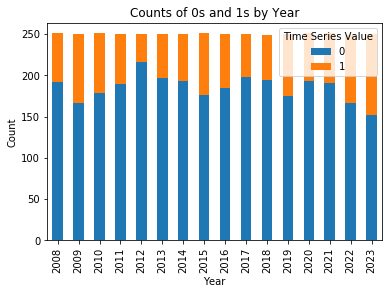

2.8. Feature Engineering: Defining Target variable for Binomial Clasification


In [259]:
print("2.8. Feature Engineering: Defining Target variable for Binomial Clasification")
#df_complete002
#df=df_bu0002.copy()
# Traget variable 
print("Target variable")
#Calculaint dependent varaibel, dummy biinomial whne rates are rallyingh 
target='target_y'
threshold=0.011
df_complete002[target] = (df_complete002['2s1s_diff'] > threshold).astype(int)
df_target = pd.DataFrame(df_complete002[target]) 
#print(df_complete002[target])
#df_target.to_clipboard()
#df.to_clipboard()
#df_bu0002=df.copy()
#df_target1=df_target.dropna()
#df_target1.to_clipboard()
#print(df_target1)
print("Counting target variable")
counts = df_target[target].value_counts()
print(counts)
# Calculate percentages
total_count = df_target[target].count()
percentage_0 = (counts[0] / total_count) * 100
percentage_1 = (counts[1] / total_count) * 100
print("\nPercentages:")
print(f"Percentage of 0s: {percentage_0:.2f}%")
print(f"Percentage of 1s: {percentage_1:.2f}%")

df_target0=df_target.copy()
df_target0['year'] = df_target0.index.year
# Count occurrences of 0s and 1s in the 'time_series' column by year
counts_by_year = df_target0.groupby(['year', target]).size().unstack(fill_value=0)
print(counts_by_year)
# Plotting the bar plot
counts_by_year.plot(kind='bar', stacked=True)
plt.title('Counts of 0s and 1s by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Time Series Value', loc='upper right')
plt.savefig('count_target.png')
plt.show()
del total_count,percentage_0,percentage_1
print("2.8. Feature Engineering: Defining Target variable for Binomial Clasification")

In [260]:
print("2.8. Feature Engineering: Target variable")
print("Reviewing consistency in training and testing dataset")
random_state0=99
test_size0=0.2
print("Splitting")
train1, test1, train2, test2 = train_test_split(df_target, df_target,
                                                                test_size=test_size0, 
                                                                random_state=random_state0)


print("In the training dataset:")
counts = train1[target].value_counts()
print(counts)
# Calculate percentages
total_count = train1[target].count()
percentage_0 = (counts[0] / total_count) * 100
percentage_1 = (counts[1] / total_count) * 100
print("\nPercentages:")
print(f"Percentage of 0s: {percentage_0:.2f}%")
print(f"Percentage of 1s: {percentage_1:.2f}%")

print("In the testing dataset:")
counts = test1[target].value_counts()
print(counts)
# Calculate percentages
total_count = test1[target].count()
percentage_0 = (counts[0] / total_count) * 100
percentage_1 = (counts[1] / total_count) * 100
print("\nPercentages:")
print(f"Percentage of 0s: {percentage_0:.2f}%")
print(f"Percentage of 1s: {percentage_1:.2f}%")

#print(df_complete002[target].shape[0],df_complete002[target].shape[1])
print("2.8. Feature Engineering: Target variable Complete")
df_bu004=df_complete002.copy()

2.8. Feature Engineering: Target variable
Reviewing consistency in training and testing dataset
Splitting
In the training dataset:
0    2388
1     814
Name: target_y, dtype: int64

Percentages:
Percentage of 0s: 74.58%
Percentage of 1s: 25.42%
In the testing dataset:
0    577
1    224
Name: target_y, dtype: int64

Percentages:
Percentage of 0s: 72.03%
Percentage of 1s: 27.97%
2.8. Feature Engineering: Target variable Complete


- [Top](#table_contents)

***Comment:*** When defining the target variable is important to verify that the prediction outcomes are not concentrated in a specific moment, (or year) and that both [0,1] are representative in the training and testing dataset. After reviewing the data by year and by training and testing group, we can verify that the presence of the forecast event is representative in each subgroup. Very important so there is representativeness in both training and testing data set so we can confidently extrapolate the results from the training stage.

- [Top](#table_contents)

### 3 Exploritary Data Analysis (EDA) & Dimensionality Reduction <a id="eda"></a>

***Comment:*** Feature transformation has been applied based on the Exploratory Data Analysis. For good order, there are feature transformations that have been carried on the Feature Engineering step, but those are results of the exploratory data stage. For good order it has been done in the previous steep but the insights are a results of the Exploratory data analysis.
- - - - - - -
In the Exploratory Data Analysis section , we will identify the  relationships between the variable using different statistical tools. 
- First of all, we inspect the time-series visually. 
Principal Component Analysis(PCA)
- After that, we perform a correlation analysis by using Heatmaps and Correlation Matrix 
- When visual inspection and correlation analysis are performed, we move to advanced methods of dimensionality reduction.
- We review Multicollinearity and detect which specific variables inflating the variance of the dataset. s
- Finally, we apply a very powerful unsupervised machine learning method - Self Organizing Maps. When all experiments were conducted, we create a refined set of features that we use to solve the classification problem.

    - Descriptive Statistics 
    - Univariate Analysis 
    - PCA Analysis 
    - Correlation Analysis 
    - Dimensionality Reduction
    - Multicollinearity Analysis 
    - Filtering Methods
    - Self-Organizing Maps


- We are dealing with financial variable and Economics variables. Worth highlight the symbiotic relationship between the markets and the economy. Our aim is to understand the relations between the target variable and the rest of finance and economics variables. 


### 3.1. Descriptive Statistics  <a id="descriptive_stat"></a>

In [262]:
print("3 Exploratory Data Analysis (EDA): eda pre processing")
print("----------------------------------------------------------------------------------------------")
df_eda0=df_complete002.copy()
df_eda01=df_complete002.copy()
df_eda=df_complete002.copy()
list_variables = ['6 mo','1 yr','2 yr',
                 '3 yr','5 yr','7 yr','10 yr',
                 '6m1s','2s1s','3s1s','5s1s',
                 '3s2s','5s2s','7s2s','10s2s',
                 '5s3s','7s3s','10s3s',
                 '7s5s','10s5s',
                  '6m1s_diff','2s1s_diff','3s1s_diff','5s1s_diff',
                 '3s2s_diff','5s2s_diff','7s2s_diff','10s2s_diff',
                 '5s3s_diff','7s3s_diff','10s3s_diff',
                 '7s5s_diff','10s5s_diff']
df_eda1=df_eda[list_variables]   
print("Ferature Descriptions")
df_eda1.describe()
df_eda1.describe().T
print("----------------------------------------------------------------------------------------------")
print("3 Exploratory Data Analysis (EDA): eda pre processing")

3 Exploratory Data Analysis (EDA): eda pre processing
----------------------------------------------------------------------------------------------
Ferature Descriptions
----------------------------------------------------------------------------------------------
3 Exploratory Data Analysis (EDA): eda pre processing



<a id="table_contents"></a>

### 3.2. Univariate Analysis  <a id="univariate"></a>


Time series US Treasury Yield Curve


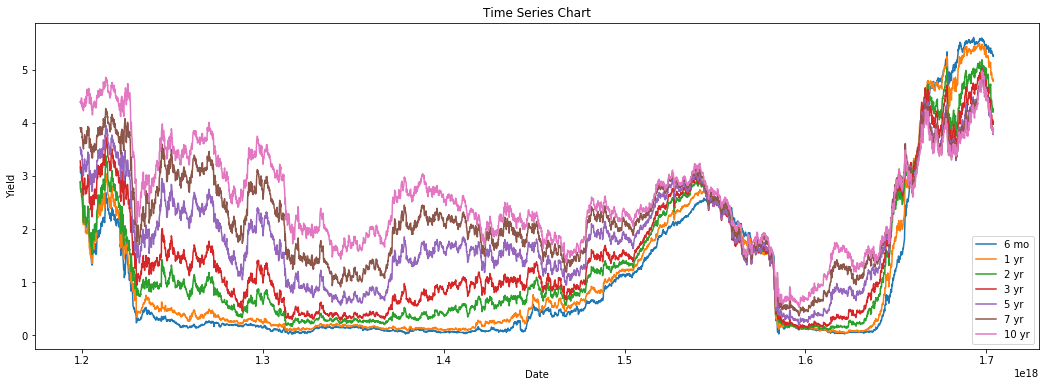

In [263]:
print("Time series US Treasury Yield Curve")
list_variables = ['6 mo','1 yr','2 yr',
                 '3 yr','5 yr','7 yr','10 yr',]
df_eda_g=df_eda[list_variables]   
plt.figure(figsize=(18, 6))
for column in df_eda_g.columns:
    plt.plot(df_eda_g.index, df_eda_g[column], label=column)
plt.xlabel('Date')
plt.ylabel('Yield')
plt.title('Time Series Chart')
plt.legend()
# Save the image
plt.savefig('time_series_chart.png')
# Display the plot
plt.show()

Analysis Volatility
   index  Volatility (bps)  Tenor
0   6 mo        337.095530   6 mo
1   1 yr        415.365437   1 yr
2   2 yr        509.189696   2 yr
3   3 yr        548.587912   3 yr
4   5 yr        593.500898   5 yr
5   7 yr        608.302949   7 yr
6  10 yr        591.722745  10 yr


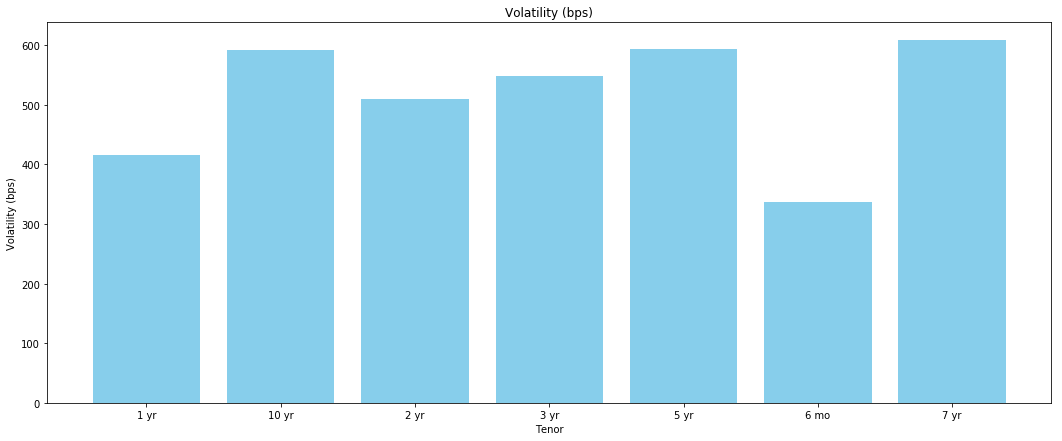

Analysis Volatility


In [264]:
print("Analysis Volatility")
#The drift of forward rate is fully determined by volatility of forward rate dynamics.
diff_ = df_eda_g.diff(-1)
diff_.dropna(inplace=True)
vol = np.std(diff_, axis=0) * 10000
vol=pd.DataFrame(vol)
vol.columns=['Volatility (bps)']
vol.reset_index(inplace=True)
vol["Tenor"]=vol["index"]
print(vol)
# Plotting a horizontal bar chart
plt.figure(figsize=(18, 7))

plt.bar(vol['Tenor'], vol['Volatility (bps)'], color='skyblue')
plt.xlabel('Tenor')
plt.ylabel('Volatility (bps)')
plt.title('Volatility (bps)')
#plt.xticks(vol.index, vol.index)  # Set x-axis ticks and labels based on the index
#plt.grid(axis='x', linestyle='--', alpha=0.6)
# Save the image
plt.savefig('volatility_bar_chart.png')
# Display the plot
plt.show()
#vol[:21].iplot(title='Volatility of daily UK government yields', xTitle='Tenor', yTitle='Volatility (bps)',
#         color='cornflowerblue')

print("Analysis Volatility")

***Comment***:
- The above volatility plot is of the averaged values, but we can see that different parts of the yield curve move differently. As you can see volatility is very significant, especially at the shorter end of the curve. This means that 1-year and 2-year rates seems to move up and down a lot as compared to other tenors.



- [Top](#table_contents)
### 3.3. PCA Analysis <a id="pca"></a>


4.3. PCA Analysis


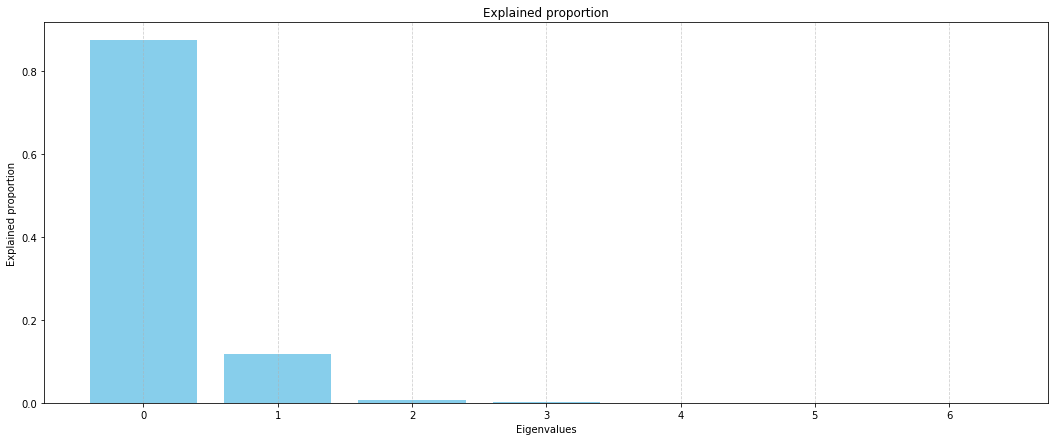

4.3. PCA Analysis


In [265]:
print("3.3. PCA Analysis")
# Standarized data
scaler = StandardScaler()
scaler.fit(df_eda_g)
df_eda_g1 = pd.DataFrame(scaler.transform(df_eda_g))
df_eda_g1.head()
#Covariance Matrix
# Create a covariance matrix 
cov_matrix_array = np.cov(df_eda_g1, rowvar=False)
pd.DataFrame(cov_matrix_array) #, index=range(1,21), columns=range(1,21))
#Eigen Decomposition
# Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_array)
# Sort values (good practice)
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
# Format into a DataFrame 
df_eigval = pd.DataFrame({"Eigenvalues": eigenvalues}) #, index=range(1,21))
eigenvalues
# Format into a DataFrame 
df_eigvec = pd.DataFrame(eigenvectors) #, index=range(1,21))

eigenvectors[:,0]
# Work out explained proportion 
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])

#Format as percentage
df_eigval.style.format({"Explained proportion": "{:.2%}"})

# Plotting a horizontal bar chart
plt.figure(figsize=(18, 7))
plt.bar(df_eigval.index, df_eigval['Explained proportion'], color='skyblue')
plt.xlabel('Eigenvalues')
plt.ylabel('Explained proportion')
plt.title('Explained proportion')
plt.grid(axis='x', linestyle='--', alpha=0.6)
# Save the image
plt.savefig('horizontal_bar_chart_pca.png')
# Display the plot
plt.show()
print("3.3. PCA Analysis")

4.3 PCA Analysis


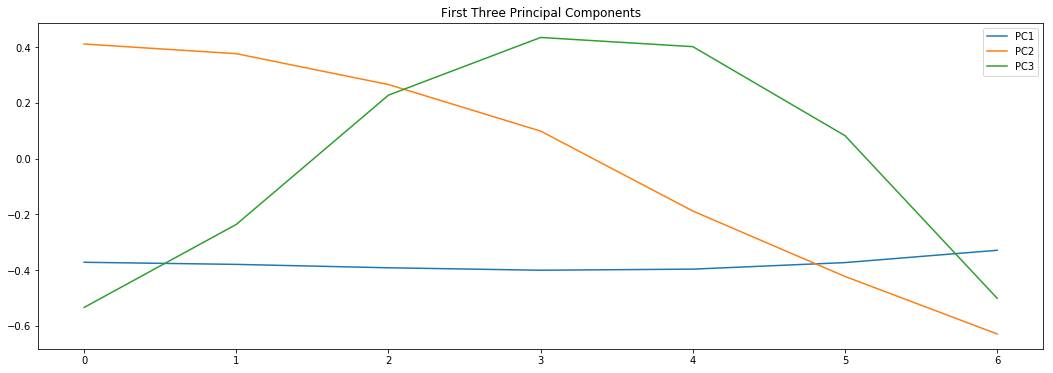

4.3. PCA Analysis


In [266]:
print("3.3 PCA Analysis")
# Subsume first 3 components into a dataframe
pcadf = pd.DataFrame(eigenvectors[:,0:3], columns=['PC1','PC2','PC3'])
pcadf
plt.figure(figsize=(18, 6))
for column in pcadf.columns:
    plt.plot(pcadf.index, pcadf[column], label=column)
#plt.xlabel('Date')
#plt.ylabel('Yield')
plt.title('First Three Principal Components')
plt.legend()
# Save the image
plt.savefig('pca_chart.png')
# Display the plot
plt.show()
#pcadf.iplot(title='First Three Principal Components', secondary_y='PC1', secondary_y_title='PC1', 
#            yTitle='change in yield (bps)')
print("3.3. PCA Analysis")

***Comment:***
One of the key interpretations of PCA as applied to interest rates are the components of the yield curve. We can attribute the first three principal components to: Parallel shifts in yield curve, Changes in short/long rates (steepening/flattening of the curve) and changes in curvature of the model (twists)


Exploritary Data Analysis (EDA): Target


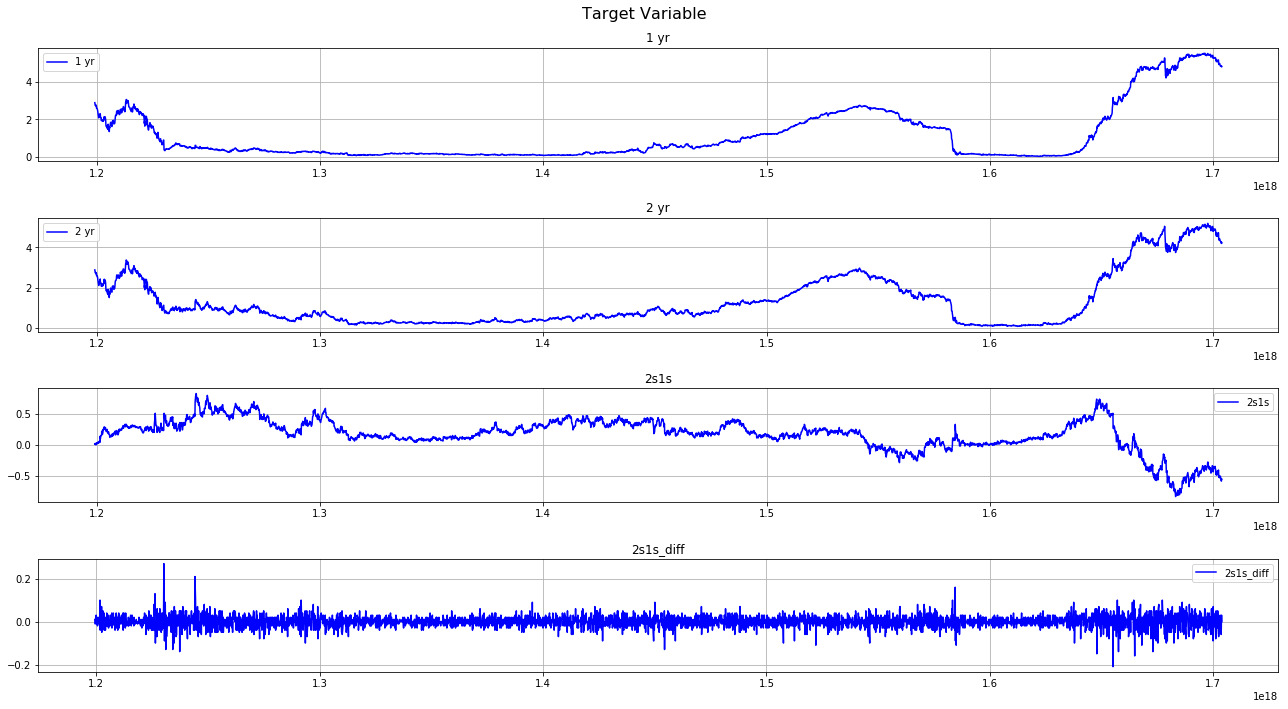

Exploritary Data Analysis (EDA): Target


In [267]:
print("Exploritary Data Analysis (EDA): Target")
list_target = ['1 yr', '2 yr', '2s1s','2s1s_diff']

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(18, 10))
fig.suptitle('Target Variable', fontsize=16)

for i, ax in enumerate(axes.flatten()):
    series_name = list_target[i]
    ax.plot(df_eda1.index, df_eda1[series_name], label=series_name, color='blue')
    ax.set_title(series_name)
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('eda_target.png')
plt.show()
print("Exploritary Data Analysis (EDA): Target")

- [Top](#table_contents)

Exploritary Data Analysis (EDA)


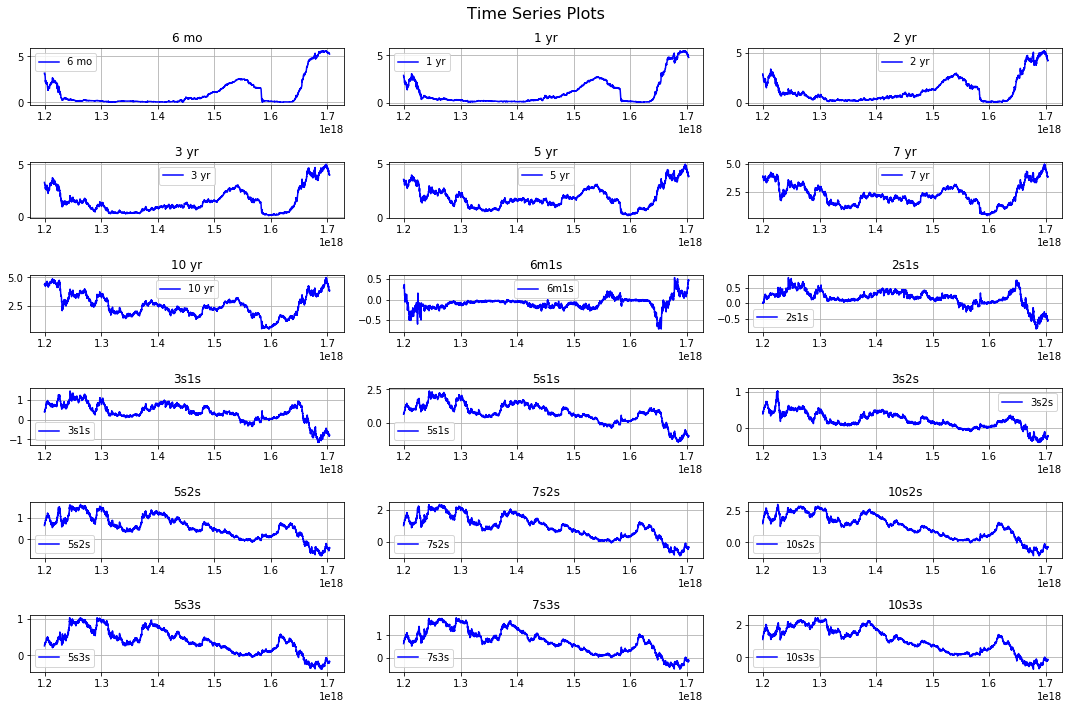

In [268]:
print("Exploritary Data Analysis (EDA)")
# Plotting 18 independent graphs in a tight layout
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 10))
fig.suptitle('Time Series Plots', fontsize=16)

for i, ax in enumerate(axes.flatten()):
    series_name = df_eda1.columns[i]
    ax.plot(df_eda1.index, df_eda1[series_name], label=series_name, color='blue')
    ax.set_title(series_name)
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('eda_rates.png')
plt.show()
print("Exploritary Data Analysis (EDA)")

Exploratory Data Analysis (EDA): Fin


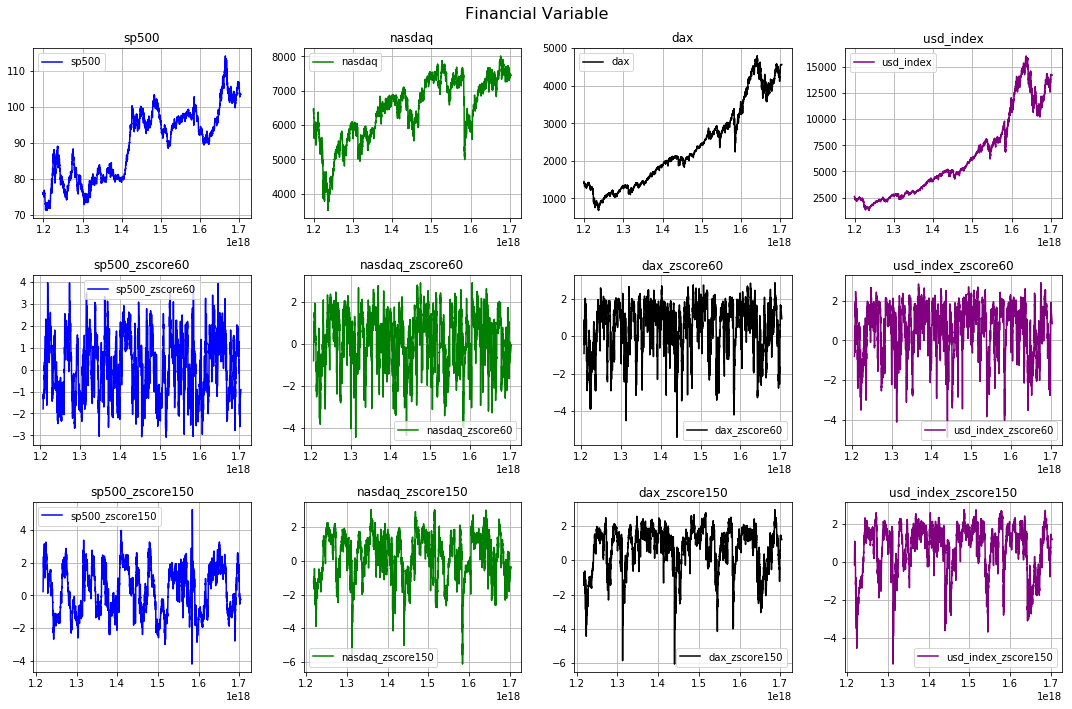

Exploratory Data Analysis (EDA): Fin


In [269]:
print("Exploratory Data Analysis (EDA): Fin")
colors = ['blue', 'green', 'black', 'purple']
list_fin=['sp500',  'nasdaq', 'dax', 'usd_index',
          'sp500_zscore60' ,'nasdaq_zscore60','dax_zscore60','usd_index_zscore60',
          'sp500_zscore150' ,'nasdaq_zscore150','dax_zscore150','usd_index_zscore150'] 
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Financial Variable', fontsize=16)

for i, ax in enumerate(axes.flatten()):
    series_name = list_fin[i]
    color = colors[i % len(colors)]  # Cycle through colors if there are more series than colors
    ax.plot(df_eda0.index, df_eda0[series_name], label=series_name, color=color)
    ax.set_title(series_name)
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('eda_fin.png')
plt.show()
print("Exploratory Data Analysis (EDA): Fin")

**Comment:** since the Financial data moves in a trend, is better to use more stationary (scaled) version such as z scores which standarizes the number to a more comparable metric. 

Exploratory Data Analysis (EDA): Eco


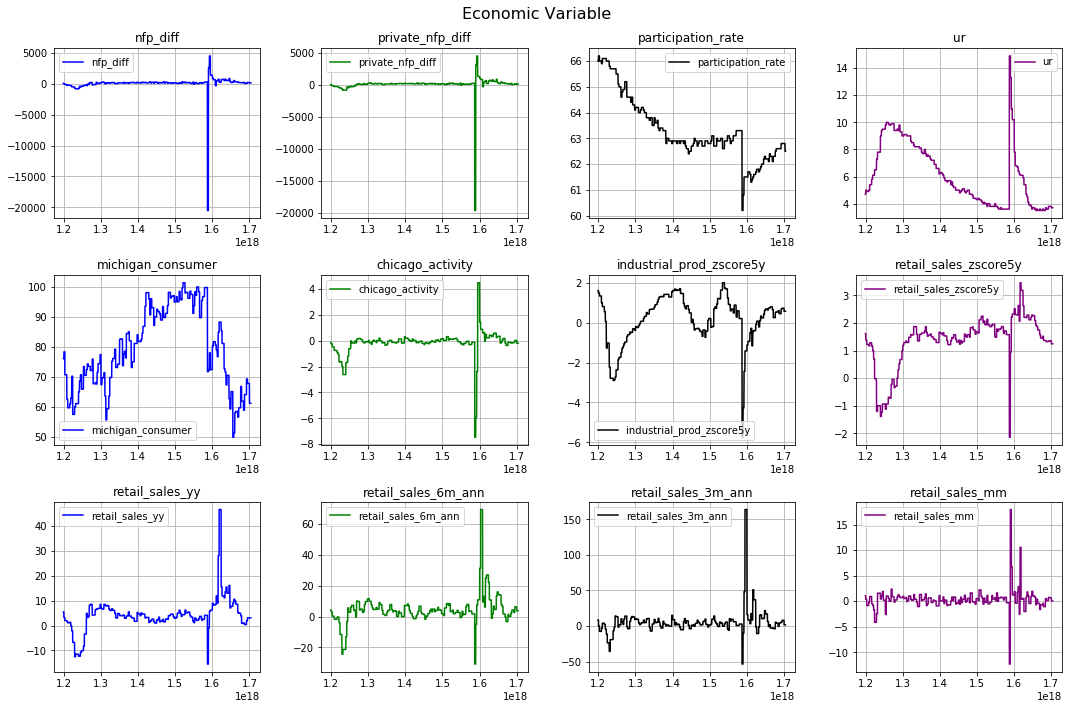

Exploratory Data Analysis (EDA): Eco


In [270]:
print("Exploratory Data Analysis (EDA): Eco")

list_eco =['nfp_diff','private_nfp_diff',
             'participation_rate',
             'ur',
             'michigan_consumer',
             'chicago_activity',
           'industrial_prod_zscore5y',
            'retail_sales_zscore5y',
            'retail_sales_yy',
             'retail_sales_6m_ann','retail_sales_3m_ann','retail_sales_mm',
            'industrial_prod_yy',
             'industrial_prod_6m_ann','industrial_prod_3m_ann','industrial_prod_mm',
]



fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Economic Variable', fontsize=16)
colors = ['blue', 'green', 'black', 'purple']
for i, ax in enumerate(axes.flatten()):
    series_name = list_eco[i]
    color = colors[i % len(colors)]
    ax.plot(df_eda0.index, df_eda0[series_name], label=series_name, color=color)
    ax.set_title(series_name)
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('eda_fin.png')
plt.show()
print("Exploratory Data Analysis (EDA): Eco")

***Comments***
The economic data is already ina stationary version by using year on year percentage rates

- [Top](#table_contents)
- - - - - - -
## 3.4 Correlation Analysis <a id="correlation"></a>

- Now, let us take a look if there are some interesting non-linear and linear dependencies in data. 
- Firstly, we construct a correlation matrix and try  find some linear relationships between features and target variable.
- After that, we construct several scatter plots to check if there are some non-linear relationships in the data, which were not captured in the correlation matrix.
- Let us select several the most promising core features and construct a correlation matrix.



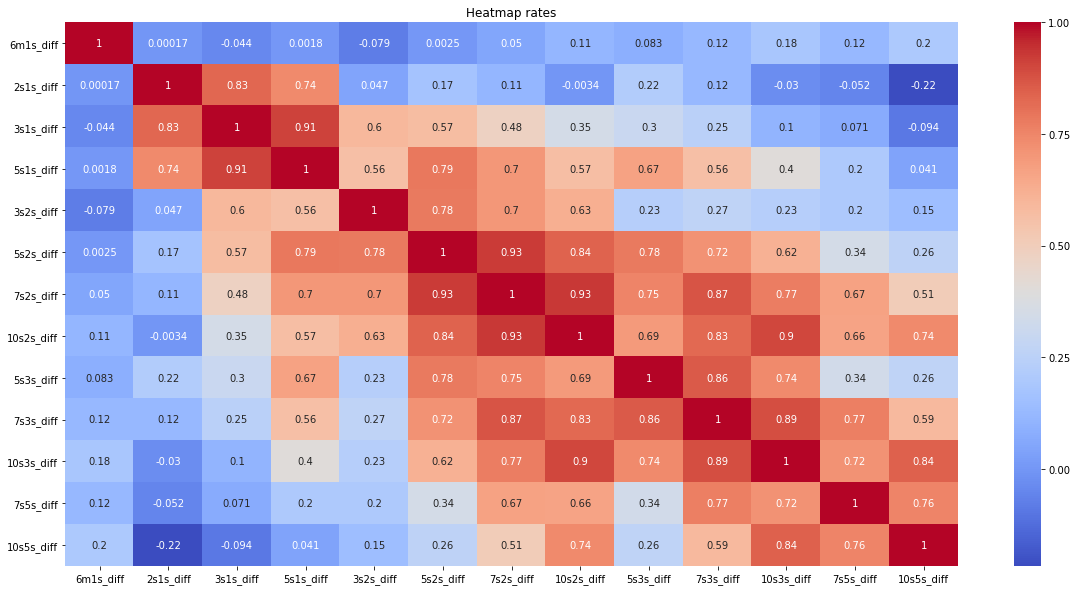

In [272]:
list_variables_c = ['6m1s_diff','2s1s_diff','3s1s_diff','5s1s_diff',
                 '3s2s_diff','5s2s_diff','7s2s_diff','10s2s_diff',
                 '5s3s_diff','7s3s_diff','10s3s_diff',
                 '7s5s_diff','10s5s_diff']
df_eda1_diff=df_eda[list_variables_c] 

#Correlation Matrix
# first, let's compute the corr. matrix among features
corrFeatMatrix = df_eda1_diff.corr()

#Plotting of features correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(corrFeatMatrix, cmap="coolwarm",annot=True)
# plt.title(
#     'Correlation Matrix among features', 
#     fontsize=16, y=1.05, weight='bold'
# )
plt.title('Heatmap rates')
plt.savefig('heatmap_rates.png')
plt.show()
#print("Pairplot") 
#sns.pairplot(df_eda1)


###Show top correlation
#correlation_with_labels_top = pd.DataFrame(aggregate_data.corr()['y_labels'].\
#                                           sort_values(ascending = False).head(5))
#correlation_with_labels_top.rename(columns = {'y_labels': \
#                                              'Top 5 Correlation \
#                                              Coefficients with y_labels'})

Comment:
the dynamics of each part of the yield curve are differentes. the 6m1s is less correlated to the rest of tenors while longer maturity tener are more correlated.

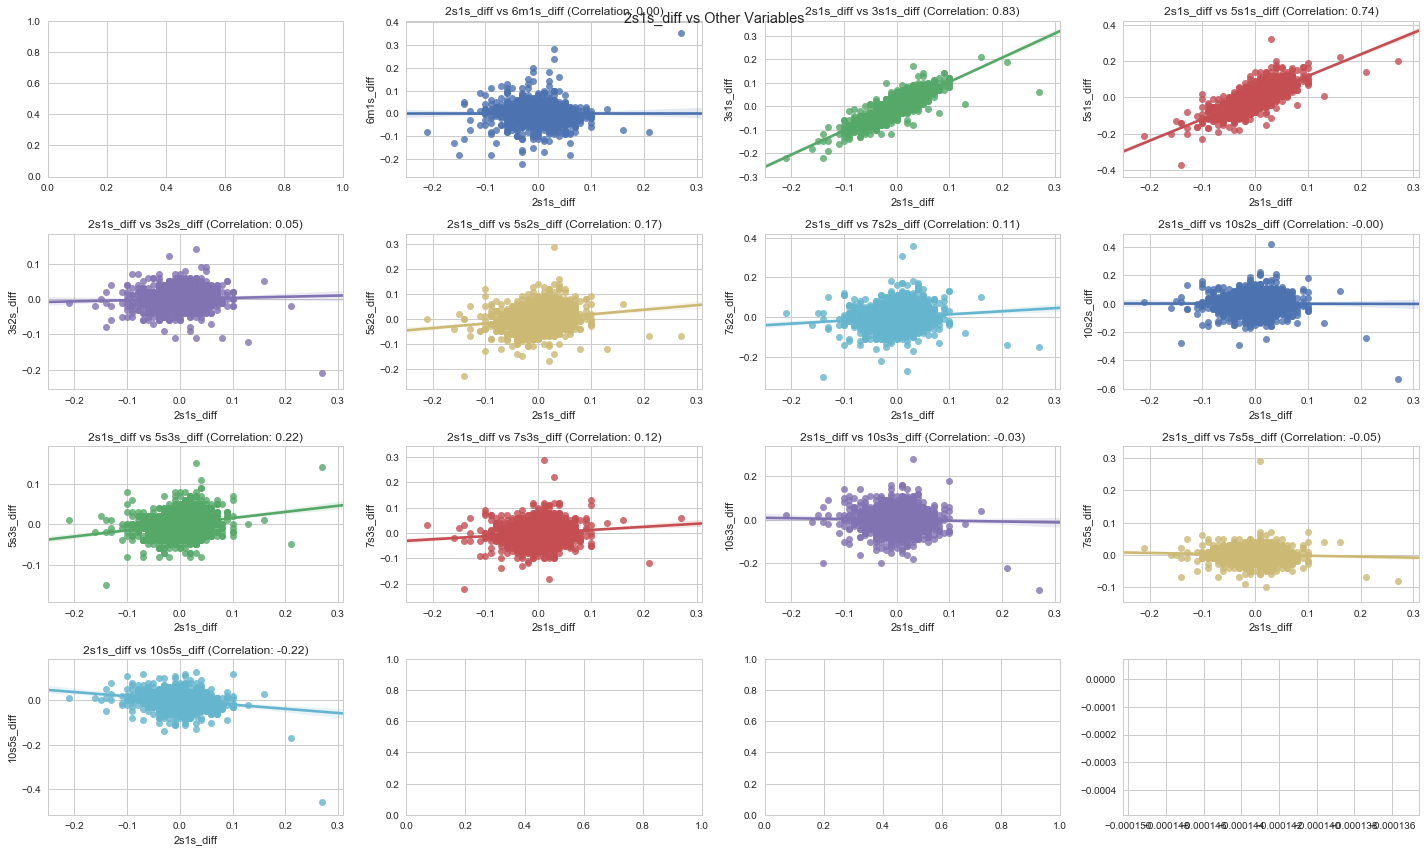

In [273]:
list_variables_s = ['2s1s_diff','6m1s_diff','3s1s_diff','5s1s_diff',
                 '3s2s_diff','5s2s_diff','7s2s_diff','10s2s_diff',
                 '5s3s_diff','7s3s_diff','10s3s_diff','7s5s_diff','10s5s_diff']
df_eda1_diff=df_eda[list_variables_s] 
sns.set(style="whitegrid")
# Create 18 scatterplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 12))
# Flatten the axes for easier iteration
axes = axes.flatten()
# Select the variable to plot against
your_variable = '2s1s_diff'
for i, col in enumerate(df_eda1_diff.columns):
    if col != your_variable:
        sns.regplot(x=your_variable, y=col, data=df_eda1_diff, ax=axes[i])
        # Calculate the correlation coefficient
        correlation_coefficient = df_eda1_diff[your_variable].corr(df_eda1_diff[col])
        axes[i].set_title(f'{your_variable} vs {col} (Correlation: {correlation_coefficient:.2f})')

# Adjust layout
plt.tight_layout()
plt.suptitle(f'{your_variable} vs Other Variables')
plt.savefig('scatter_rates.png')
plt.show()#
#vplt.suptitle('Scatter plot for each numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)


Exploritary Data Analysis (EDA)


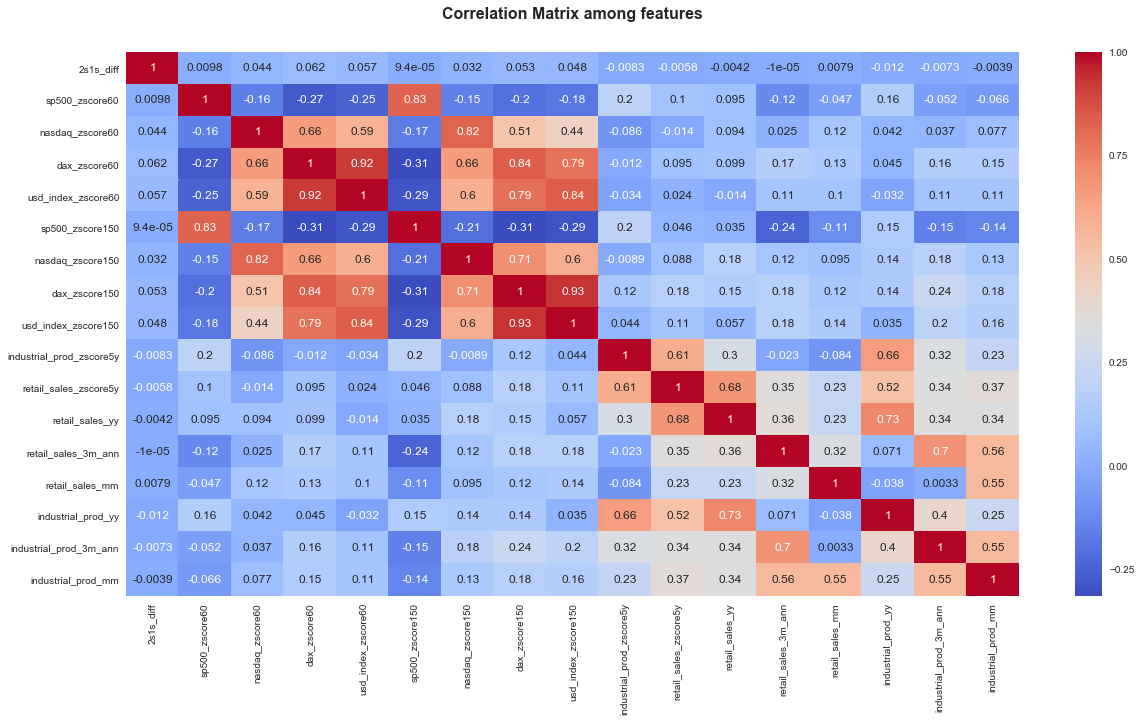

Commentions


In [274]:
#CNow lets comparted the correlation bettween 21s differnce and the economnad finaincal variable s
#orrelations beteween rest of economa dna finacial vairales

list_variables = ['2s1s_diff',
                  'sp500_zscore60' ,'nasdaq_zscore60','dax_zscore60','usd_index_zscore60',
                  'sp500_zscore150' ,'nasdaq_zscore150','dax_zscore150','usd_index_zscore150',
                  'industrial_prod_zscore5y','retail_sales_zscore5y',
                  'retail_sales_yy','retail_sales_3m_ann','retail_sales_mm',
                  'industrial_prod_yy','industrial_prod_3m_ann','industrial_prod_mm']
df_eda1_diff=df_eda[list_variables] 
print("Exploritary Data Analysis (EDA)")
#Correlation Matrix
# first, let's compute the corr. matrix among features
corrFeatMatrix = df_eda1_diff.corr()

#Plotting of features correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(corrFeatMatrix, cmap="coolwarm",annot=True)
plt.title('Correlation Matrix among features', fontsize=16, y=1.05, weight='bold')
plt.savefig('heatmap_eco1.png')
plt.show()




print("Commentions")

IndexError: index 12 is out of bounds for axis 0 with size 12

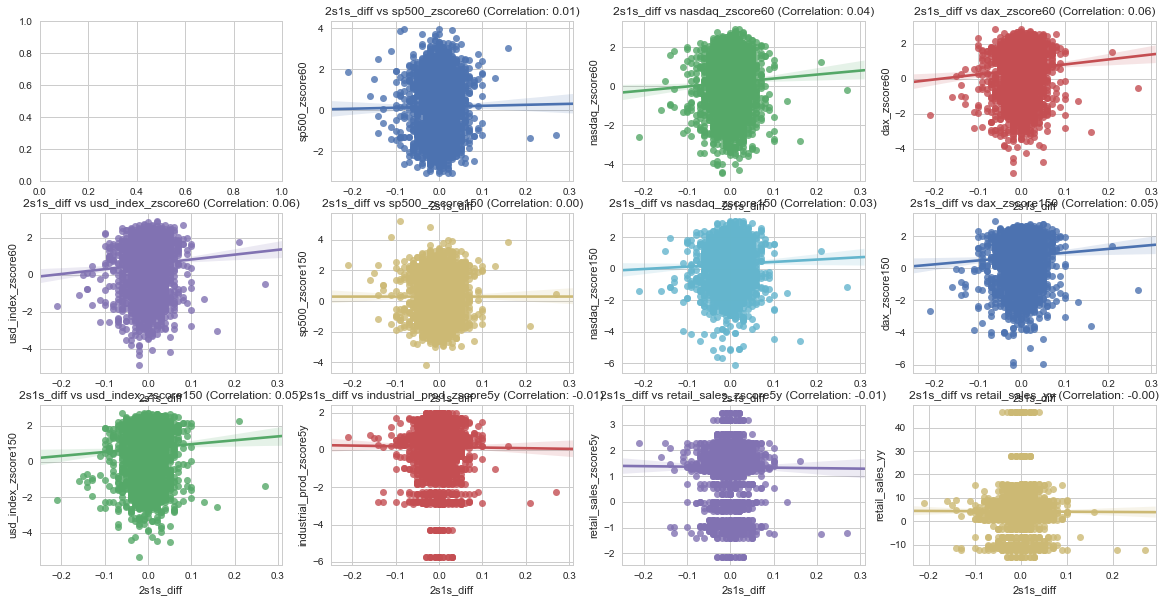

In [275]:

list_variables = ['2s1s_diff',
                  'sp500_zscore60' ,'nasdaq_zscore60','dax_zscore60','usd_index_zscore60',
                  'sp500_zscore150' ,'nasdaq_zscore150','dax_zscore150','usd_index_zscore150',
                  'industrial_prod_zscore5y','retail_sales_zscore5y',
                  'retail_sales_yy','retail_sales_3m_ann','retail_sales_mm',
                  'industrial_prod_yy','industrial_prod_3m_ann','industrial_prod_mm']


df_eda2=df_eda[list_variables] 
sns.set(style="whitegrid")
# Create 18 scatterplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
# Flatten the axes for easier iteration
axes = axes.flatten()
# Select the variable to plot against
your_variable = '2s1s_diff'
for i, col in enumerate(df_eda1_diff.columns):
    if col != your_variable:
        sns.regplot(x=your_variable, y=col, data=df_eda2, ax=axes[i])
        correlation_coefficient = df_eda2[your_variable].corr(df_eda2[col])
        axes[i].set_title(f'{your_variable} vs {col} (Correlation: {correlation_coefficient:.2f})')

# Adjust layout
plt.suptitle(f'{your_variable} vs Other Variables')
plt.tight_layout()
plt.savefig('scatter_eco2.png')
plt.show()#



- [Top](#table_contents)



### 3.5. Feature Scaling and Dimensionality Reduction <a id="dimensionality"></a>




IndexError: index 12 is out of bounds for axis 0 with size 12

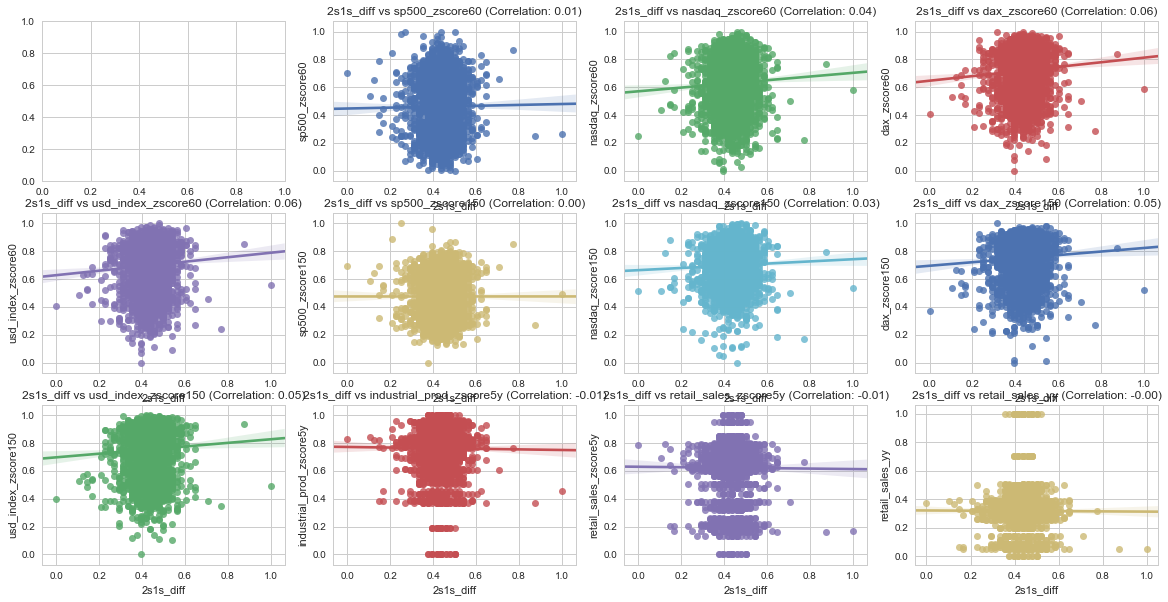

In [276]:
# Example using Min-Max scaling


list_variables = ['2s1s_diff',
                  'sp500_zscore60' ,'nasdaq_zscore60','dax_zscore60','usd_index_zscore60',
                  'sp500_zscore150' ,'nasdaq_zscore150','dax_zscore150','usd_index_zscore150',
                  'industrial_prod_zscore5y','retail_sales_zscore5y',
                  'retail_sales_yy','retail_sales_3m_ann','retail_sales_mm',
                  'industrial_prod_yy','industrial_prod_3m_ann','industrial_prod_mm']


df_eda2=df_eda[list_variables] 
min_max_scaler = MinMaxScaler()
df_eda2_minmax = pd.DataFrame(min_max_scaler.fit_transform(df_eda2), columns=df_eda2.columns)
#see improvemetne in scatterplots

sns.set(style="whitegrid")
# Create 18 scatterplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
# Flatten the axes for easier iteration
axes = axes.flatten()
# Select the variable to plot against
your_variable = '2s1s_diff'
for i, col in enumerate(df_eda2_minmax.columns):
    if col != your_variable:
        sns.regplot(x=your_variable, y=col, data=df_eda2_minmax, ax=axes[i])
        correlation_coefficient = df_eda2[your_variable].corr(df_eda2[col])
        axes[i].set_title(f'{your_variable} vs {col} (Correlation: {correlation_coefficient:.2f})')


# Adjust layout

plt.tight_layout()
plt.savefig('scatter_eco_scaled.png')
plt.show()#





****Comments:*** we find more correlation between variables which mean prediction should improve 

#### - [Top](#table_contents)
- - - - - - -
### 3.6. Multicollinearity Analysis <a id="multicollinearity"></a>
how to interpret VIF:

VIF = 1: No correlation between the variable and the other independent variables. The variance of the estimated regression coefficient is not inflated.

VIF > 1 and < 5: Moderate correlation. The variance of the estimated regression coefficient is moderately inflated.

VIF >= 5: High correlation. The variable is highly correlated with other independent variables, and its variance is significantly inflated. This may cause instability in coefficient estimates and make it challenging to interpret the individual effect of the variable.

- - - - - - -

Check VIF values: Examine the VIF values for each variable. If VIF is close to 1, there is no significant multicollinearity. If VIF is substantially greater than 1, there may be a cause for concern.

Identify problematic variables: Focus on variables with high VIF values. These are the variables that are highly correlated with others.

Address multicollinearity: If high VIF values are identified, consider taking one or more of the following actions:

Remove one or more of the correlated variables.
Combine the correlated variables into a single variable.
Use regularization techniques (e.g., Ridge regression) that automatically penalize large coefficients.

In [278]:
print("3.6. Exploratory Data Analysis (EDA): Multicollinearity")

#wqE ARE GOIGNT O FINAD MLTICLONARY INT HE FRON 
from statsmodels.stats.outliers_influence import variance_inflation_factor


t=['2s1s_diff']
list_variables = ['6m1s_diff','3s1s_diff','5s1s_diff',
                 '3s2s_diff','5s2s_diff',
                  '7s2s_diff',
                  '10s2s_diff',
                 '5s3s_diff','7s3s_diff',
                  '10s3s_diff',
                 '7s5s_diff','10s5s_diff']
df_eda_m=df_eda[list_variables]  

#Multicollienaruty Analysis 
#Multiscatter plotes to explore reltaicvnoshiops amung features
# Adding lagged features for temporal dependencies
lagged_features = []
num_lags = 3  # Number of lags to consider

for feature in list_variables:  # Exclude the target variable
    for i in range(1, num_lags + 1):
        lagged_feature_name = f'{feature}_lag{i}'
        df_eda_m[lagged_feature_name] = df_eda_m[feature].shift(i)
        lagged_features.append(lagged_feature_name)

# Function to calculate VIF
def calculate_vif(data_frame):
    features = data_frame.dropna()  # Exclude the target variable and any rows with missing values
    vif_data = pd.DataFrame()
    vif_data["Variable"] = features.columns
    vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    return vif_data

# Display VIF for features including lags
vif_results = calculate_vif(df_eda_m)
print("VIF Results:")
print(vif_results)

print("3.6.  Exploratory Data Analysis (EDA): Multicollinearity")

3.6. Exploratory Data Analysis (EDA): Multicollinearity
VIF Results:
           Variable           VIF
0         6m1s_diff      1.103045
1         3s1s_diff  24171.400831
2         5s1s_diff  21919.081577
3         3s2s_diff  23449.017664
4         5s2s_diff  45817.531338
5         7s2s_diff  77909.077410
6        10s2s_diff  14404.192299
7         5s3s_diff  42047.157911
8         7s3s_diff  26481.178931
9        10s3s_diff  27405.050449
10        7s5s_diff  60067.427429
11       10s5s_diff  25440.136289
12   6m1s_diff_lag1      1.140604
13   6m1s_diff_lag2      1.140003
14   6m1s_diff_lag3      1.110846
15   3s1s_diff_lag1  46040.518960
16   3s1s_diff_lag2   7165.415604
17   3s1s_diff_lag3  22995.788643
18   5s1s_diff_lag1  24110.152358
19   5s1s_diff_lag2  20519.608051
20   5s1s_diff_lag3  18020.445647
21   3s2s_diff_lag1  59427.130299
22   3s2s_diff_lag2  10854.562291
23   3s2s_diff_lag3   7246.114988
24   5s2s_diff_lag1  23554.127849
25   5s2s_diff_lag2  73142.136021
26   5s2s_dif

In [279]:
print("3.6. Exploratory Data Analysis (EDA): Multicollinearity")

list_variables = ['6m1s_diff',
                 '3s2s_diff',
                 '5s3s_diff',
                 '7s5s_diff',
                  '10s5s_diff']
df_eda_m=df_eda[list_variables]   

#Multicollienaruty Analysis 
#Multiscatter plotes to explore reltaicvnoshiops amung features


# Adding lagged features for temporal dependencies
lagged_features = []
num_lags = 3  # Number of lags to consider

for feature in list_variables:  # Exclude the target variable
    for i in range(1, num_lags + 1):
        lagged_feature_name = f'{feature}_lag{i}'
        df_eda_m[lagged_feature_name] = df_eda_m[feature].shift(i)
        lagged_features.append(lagged_feature_name)

# Function to calculate VIF
def calculate_vif(data_frame):
    features = data_frame.dropna()  # Exclude the target variable and any rows with missing values
    vif_data = pd.DataFrame()
    vif_data["Variable"] = features.columns
    vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    return vif_data

# Display VIF for features including lags
vif_results = calculate_vif(df_eda_m)
print("VIF Results:")
print(vif_results)
print("3.6 Exploratory Data Analysis (EDA): Multicollinearity")

3.6. Exploratory Data Analysis (EDA): Multicollinearity
VIF Results:
           Variable       VIF
0         6m1s_diff  1.099201
1         3s2s_diff  1.163005
2         5s3s_diff  1.243464
3         7s5s_diff  2.706729
4        10s5s_diff  2.547302
5    6m1s_diff_lag1  1.135707
6    6m1s_diff_lag2  1.135423
7    6m1s_diff_lag3  1.106142
8    3s2s_diff_lag1  1.217194
9    3s2s_diff_lag2  1.217924
10   3s2s_diff_lag3  1.155513
11   5s3s_diff_lag1  1.341304
12   5s3s_diff_lag2  1.343423
13   5s3s_diff_lag3  1.266224
14   7s5s_diff_lag1  2.886841
15   7s5s_diff_lag2  2.886622
16   7s5s_diff_lag3  2.678698
17  10s5s_diff_lag1  2.591281
18  10s5s_diff_lag2  2.580989
19  10s5s_diff_lag3  2.483728
Exploratory Data Analysis (EDA): Multicollinearity


****Comments*** : So we solve the multicollinearity problem 


- [Top](#table_contents)

### 3.7. Filtering Methods <a id="filtering"></a> <a id="filter"></a>


There exist 3 main Filter Methods to reduce the number of input varaibles:

- **Filter methods** mainly act as rankers, ordering the features from best to worst (Chi Square, Information Gain, Anova F values,)


- **Wrapper Methods**, uses machine learning algorithm to find the best subset of features. 
- computationally intensive for large =feature set
- Can model future dependences,. 
- Boruta and Termination Importance


- **Embedded Methods** Interact between models and features. 
- Fuse measurable adn statistical criteria like filter to choose some features and then uses machine learning algorithm to  pick a subset  with the best classification performance 
- Lasso, Rdge, Embedded Random Forests Embedded LightGBM


In this case we will use the Wrapper Method Boruta:
### Boruta 
Boruta is a feature selection algorithm that uses a random forest classifier to identify relevant features in a dataset. The number of features detected by Boruta can depend on various factors, including the nature of your data, the underlying patterns, and the parameters you set


In [ ]:
print("3.7.Exploratory Data Analysis (EDA): Filtering")
#print(df_complete_list0_t)
# Eliminate elements containing the text "2s1s"
filtered_elements = [elem for elem in df_complete_list0_t if '2s1s' not in elem]
list_1= ['6m1s','5s1s','3s2s','5s2s','7s2s','10s2s',
        '5s3s','7s3s','10s3s','7s5s','10s5s',
        'nasdaq','dax','usd_index','sp500']
list_2=['_diff','_scaled']
list_3 = [elem1 + elem2 for elem1 in list1 for elem2 in list2]
#print(list_3)
boruta_list = filtered_elements+list_3
boruta_list = list(set(boruta_list))
boruta_list = [elem for elem in boruta_list if '_log_return' not in elem]
#print(boruta_list)
total_elements = len(boruta_list)
print(f'Total elements: {total_elements}')
#df_complete_list0_t



lag_list_2=['_lag1','_lag2','_lag3','_lag4','_lag5','_lag6','_lag7']
boruta_list_lag = [elem1 + elem2 for elem1 in filtered_elements for elem2 in lag_list_2]
boruta_list_lag = list(set(boruta_list_lag))
boruta_list_lag = [elem for elem in boruta_list_lag if '_log_return' not in elem]
#print(boruta_list_lag)
total_elements = len(boruta_list_lag)
print(f'Total elements: {total_elements}')

In [ ]:
print("Exploratory Data Analysis (EDA): Filtering")
print("from boruta import BorutaPy")
print("from sklearn.model_selection import train_test_split, cross_val_score")
print("Creating the list off variables ")

df_eda_f=df_eda01.copy()
#df_eda_f = df_eda_f.dropna() 
df_eda_f = df_eda_f[df_eda_f.index. year >= 2009] 
df_eda_f=df_eda_f[df_eda_f.index. year <= 2023]
#df= df.fillna(method='ffill')
#df=df_complete002 [feat_list_y] 
df_eda_f=df_eda_f.round(8)
#y_variables=['2s1s_diff'] 
y_variables=['target_y'] 
x_variables =boruta_list
df_eda_f_y=df_eda_f[y_variables]
df_eda_f_x=df_eda_f[boruta_list]
print(df_eda_f_y.shape[0],df_eda_f_y.shape[1])
print(df_eda_f_x.shape[0],df_eda_f_x.shape[1])
#df_eda_f_y.to_clipboard()
#df_eda_f_x.to_clipboard()

In [ ]:
print(" Split Data into Training and Testing Sets")
xf_train, xf_test, yf_train, yf_test = train_test_split(df_eda_f_x, df_eda_f_y, 
                                                        test_size=0.2, 
                                                        random_state=999)
print("Train Random Forest Classifier with verbose the check restuls live")
rf_classifier = RandomForestClassifier(n_estimators=500, 
                                       n_jobs=-1,
                                       verbose=1)
print(" Apply Boruta Feature Selection")
boruta_selector = BorutaPy(rf_classifier, n_estimators='auto', random_state=999)
boruta_selector.fit(xf_train.values, yf_train.values)
print(" Get Selected Features")
selected_features = xf_train.columns[boruta_selector.support_].tolist()
print(selected_features)

In [ ]:
selected_features_bu1=selected_features
print(selected_features_bu1)

In [ ]:
print("3.7. Exploratory Data Analysis (EDA): Filtering")
df_eda_f=df_eda01.copy()
#df_eda_f = df_eda_f.dropna() 
df_eda_f = df_eda_f[df_eda_f.index. year >= 2009] 
df_eda_f=df_eda_f[df_eda_f.index. year <= 2023]
#df= df.fillna(method='ffill')
#df=df_complete002 [feat_list_y] 
df_eda_f=df_eda_f.round(8)
y_variables=['target_y'] 
x_variables =boruta_list_lag
df_eda_f_y=df_eda_f[y_variables]
df_eda_f_x=df_eda_f[boruta_list_lag]
print(df_eda_f_y.shape[0],df_eda_f_y.shape[1])
print(df_eda_f_x.shape[0],df_eda_f_x.shape[1])
#df_eda_f_y.to_clipboard()
#df_eda_f_x.to_clipboard()
print(" Split Data into Training and Testing Sets")
xf_train, xf_test, yf_train, yf_test = train_test_split(df_eda_f_x, df_eda_f_y, 
                                                        test_size=0.2, 
                                                        random_state=999)
print("Train Random Forest Classifier with verbose the check restuls live")
rf_classifier = RandomForestClassifier(n_estimators=500, 
                                       n_jobs=-1,
                                       verbose=1)
print(" Apply Boruta Feature Selection")
boruta_selector = BorutaPy(rf_classifier, n_estimators='auto', random_state=999)
boruta_selector.fit(xf_train.values, yf_train.values)
print(" Get Selected Features")
selected_features = xf_train.columns[boruta_selector.support_].tolist()
print(selected_features)
print("Exploratory Data Analysis (EDA): Filtering")


In [ ]:
selected_features_bu2=selected_features
print(selected_features_bu2)
boruta_features=selected_features_bu1+selected_features_bu2
print(boruta_features)

- [Top](#table_contents)

### 3.8. Self-Organizing Maps <a name="som"></a>


***Self-Organizing Maps (SOM)*** are typically used for unsupervised learning and dimensionality reduction to produce a low-dimensional (typically two-dimensional), discretized representation of the input space of the training samples, called a map, and is therefore a method to do dimensionality reduction
- A SOM consists of a grid of neurons, often arranged in a two-dimensional lattice.
- Each neuron has a weight vector associated with it. The weights have the same dimensionality as the input data.
- The key idea behind SOMs is that nearby neurons in the SOM grid respond to similar input patterns, thereby forming a topological map of the input space. The competitive learning process organizes the neurons to represent clusters and relationships in the data.



- [Top](#table_contents)

3.8. Exploratory Data Analysis (EDA): Self-Organizing Maps (SOM)
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.0661109248314725


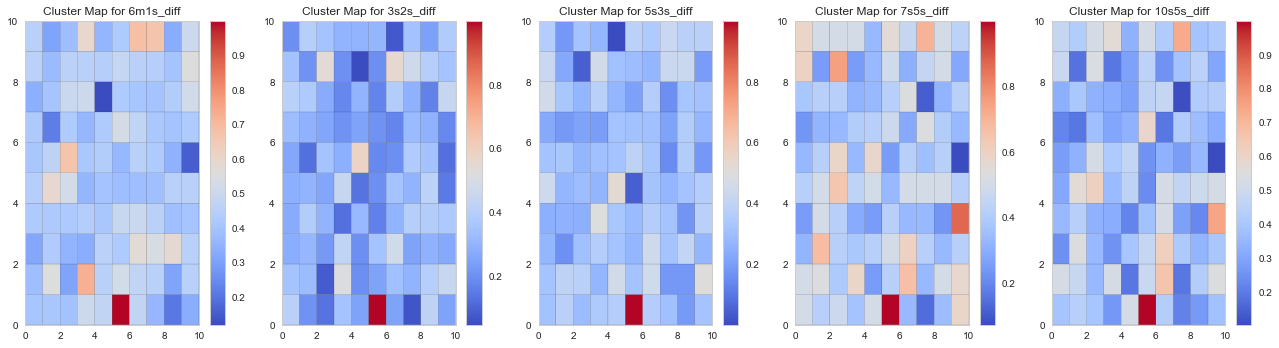

Exploratory Data Analysis (EDA): Self-Organizing Maps (SOM)


In [280]:
print("3.8. Exploratory Data Analysis (EDA): Self-Organizing Maps (SOM)")

import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

df_eda_s=df_eda.copy()
df_eda_s = df_eda_s.dropna() 
y_variables=['target_y'] 
x_variables = ['6m1s_diff',
                 '3s2s_diff',
                 '5s3s_diff',
                 '7s5s_diff',
                  '10s5s_diff']
df_eda_s_y=df_eda_s[y_variables]
df_eda_s_x=df_eda_s[x_variables]

X=df_eda_s_x
y=df_eda_s_y

df = pd.DataFrame(df_eda_s_x)

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df.values)

# Define the SOM parameters
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], df.shape[1], sigma=0.3, learning_rate=0.5)
som.random_weights_init(normalized_data)
som.train_random(normalized_data, 1000, verbose=True)

# Create subplots for each feature
fig, axs = plt.subplots(1, df.shape[1], figsize=(18,5 ))

# Plot different cluster maps for each feature
for i, ax in enumerate(axs):
    # Get the weights for the specific feature
    feature_weights = som.get_weights()[:, :, i]

    # Plot the U-matrix for the specific feature
    im = ax.pcolor(feature_weights, 
                   cmap='coolwarm', 
                   edgecolors='k', 
                   linewidths=0.1)
    ax.set_title(f'Cluster Map for {df.columns[i]}')
    fig.colorbar(im, ax=ax)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('som.png')
plt.show()
print("Exploratory Data Analysis (EDA): Self-Organizing Maps (SOM)")



- [Top](#table_contents)
### 4. Data Pre processing and Cleaning <a id="processing"></a>

In [ ]:
#Data Cleaning
#After the Exploratory data analysis we found the best gorup of variable for our enxr models
list_c0 = ['6m1s','5s1s','3s1s','3s2s','5s3s','10s2s','10s5s','7s2s']
list_z=['_zscore30','_zscore60','_zscore90']
list_c0f = [elem1 + elem2 for elem1 in list_c0 for elem2 in list_z]
lag_list=['_lag1','_lag2','_lag3',]
list_c0f = [elem1 + elem2 for elem1 in list_c0f for elem2 in lag_list]
list_c0f = list(set(list_c0f))

list_c =['6m1s','5s1s','3s1s','3s2s','5s3s','10s2s','10s5s','7s2s','nasdaq','sp500','usd_index']
list_d =['_diff']
list_cf = [elem1 + elem2 for elem1 in list_c for elem2 in list_d]
lag_list=['_lag1','_lag2','_lag3',]
list_cf = [elem1 + elem2 for elem1 in list_cf for elem2 in lag_list]
list_cf = list(set(list_cf))
#list_exog_eco

# lsit of varaibles that will be used 
d_columns = [column for column in df_complete002.columns if "Day" in column]
m_columns = [column for column in df_complete002.columns if "Month" in column]
seas_lag=d_columns+m_columns

feat_list = list_c0f+list_cf+list_exog_eco + seas_lag
print(feat_list)
import pickle
print("saving feature list")
with open('feat_list.pkl', 'wb') as file:
    pickle.dump(feat_list, file)

- [Top](#table_contents)

In [16]:

######
#backtesting

df_target_y=df_bu004 ['2s1s_diff'] 

#######
target_y=['target_y']
feat_list_y =feat_list + target_y
print("Cleaning and preparing the data")
print("Data Modelling")
print("pre steps") 
df=df_bu004 [feat_list_y] 
df= df.fillna(method='ffill')
#df=df_complete002 [feat_list_y] 
df=df.round(8)
print("filtering years")
df = df[df.index. year >= 2009] 
df=df[df.index. year <= 2023]
df=df.fillna(method='ffill') 
print("paramteres") 
random_state0=99
test_size0=0.2
max_iter0=1000 
tail0=350
#filter years #print(x_lr) #print(y_lr)
print("Cleaning and preparing the data")
print("Ready for Data Modelling")
#nan_mask.to_clipboard()
df_pp=df.copy()
print(df_pp.shape[0],df_pp.shape[1])
print("preprocessed database ready backup")
df_pp.to_csv('dataset_pp.csv', index=True)
#df_backup.to_csv('C:/Alan_UK19/2022 CQF/2023 Project/Data/dataset_premodel.csv', index=True)
df_pp00=df_pp.copy()

Cleaning and preparing the data
Data Modelling
pre steps
filtering years
paramteres
Cleaning and preparing the data
Ready for Data Modelling
3752 205
preprocessed database ready backup


In [17]:
import pickle
os.chdir('C:/Alan_UK19/2022 CQF/2023 Project/Data/')
target_y=['target_y']
dfread = pd.read_csv('dataset_pp.csv', index_col=0, parse_dates=True)
#print(dfread.head(5))
print(dfread.shape[0],dfread.shape[1])
#print(df_pp00.head(5))
print(df_pp00.shape[0],df_pp00.shape[1])
dfread.equals(df_pp00)
#df_pp.to_csv('dataset_pp.csv', index=True)
with open('feat_list.pkl', 'rb') as file:
    feat_list = pickle.load(file)
    
#test_size0=0.2
#max_iter0=1000 
#tail0=350
#random_state0=99

test_size0=0.2
max_iter0=1000 
tail0=350
random_state0=99
df_m000=dfread.copy()



3752 205
3752 205


***Comments:***
    In the presetep we have make sure theat we will only consdier lagged varaibles avaiable at the moemnt of the forecast predicitons
    Also that there are not na 
    Alsw we cut thetime wiondws. 
    We see the specifvc random seed for repriclation fo the models 
    The test size is stanfdard of 20 %

- [Top](#table_contents)

### 5  Ensemble techniques<a id="model_building"></a>

- (5)[Model Building and Optimization]

    - [5.2.1.Logistic probability regression model with HyperParameter Tuning](#logistic_ht) 
    - [5.2.2.Decision Tree Classifier model with HyperParameter Tuning](#dtc_ht) 
    - [5.2.3.Random Forest Classifier RF model with Hyperparameter Tuning](#rfc_ht) 
    - [5.2.4.Extra Trees Classifier model ET with HyperParameter Tuning](#etc_ht) 
    - [5.2.5.Bagging Classifier model with Hyperparameter Tuning](#bag_ht) 
    - [5.2.6.Support Vector Classifier with Hyperparameter tuning](#svc_ht) 
    - [5.2.7.XGBClassifier (XGBoost)  with Hyperparameter tuning](#xgbc_ht) 
    - [5.2.8.LGBMClassifier (LightGBM) with Hyperparameter tuning](#lgbmc_ht) 
    - [5.2.9.Voting Classifier: Soft_voting](#voting) 

**comment**: in the model stage we make sure that we model the data using the data that would be available at the moment of the predictions
 For example we can at most consider the previous day rates data, In term of economic data has to be the data of at least 2 months


- [Top](#table_contents)

- [Top](#table_contents) 
- - - - - - -
### 5.2.1 Logistic probability Regressions model  <a id="logistic_ht"></a>
Logistic Regression is a statistical model used for binary classification, which means it is designed to predict the probability that an instance belongs to a particular class. The logistic regression model is well-suited for problems where the dependent variable is binary, representing two classes (e.g., 0 or 1, True or False).



$$P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n)}}$$

where:
\begin{align*}
Y & : \text{Binary outcome variable (1 or 0)} \\
\beta_0 & : \text{Intercept term} \\
\beta_1, \beta_2, \ldots, \beta_n & : \text{Coefficients for the predictor variables} \\
X_1, X_2, \ldots, X_n & : \text{Predictor variables} \\
e & : \text{Base of natural logarithm (Euler's number)}
\end{align*}


This equation represents the probability \(P(Y=1)\) of the positive outcome in logistic regression, where the log-odds of the positive outcome is modeled as a linear combination of predictor variables. The logistic function (sigmoid function) is used to transform the linear combination into a probability between 0 and 1.


This equation represents the probability \(P(Y=1)\) of the positive outcome in logistic regression, where the log-odds of the positive outcome is modeled as a linear combination of predictor variables. The logistic function (sigmoid function) is used to transform the linear combination into a probability between 0 and 1.
- - - - - - -
# Interpretation:

- The logistic function ensures that the output is between 0 and 1, representing a probability.
- The decision boundary is determined by \( w \cdot X + b \). If \( w \cdot X + b \) is greater than 0, the model predicts class 1; otherwise, it predicts class 0.
- The weights \( w \) are learned from the training data through optimization algorithms like gradient descent.
- - - - - - -
## Loss Function:

The logistic regression model is trained by minimizing a loss function, often the binary cross-entropy loss:

$$[ \text{Binary Cross-Entropy Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right)]$$

Here, \( N \) is the number of samples, \( y_i \) is the true label, and \( p_i \) is the predicted probability.
- - - - - - -
## Training:

The model is trained by adjusting the weights and bias to minimize the loss function, often using optimization algorithms like gradient descent.
- - - - - - -
## Prediction:

Given a set of features, the trained logistic regression model can predict the probability of belonging to class 1. If this probability is above a certain threshold (e.g., 0.5), the model predicts class 1; otherwise, it predicts class 0.

Logistic Regression is widely used due to its simplicity, interpretability, and effectiveness for binary classification tasks.
- - - - - - -

### Logistic Regressions with Hyperparamteter Tuning   <a id="logistic_ht"></a>

- The hyperparameters such as C (inverse of regularization strength), penalty (type of regularization), and solver are tuned using GridSearchCV.



<a id="table_contents"></a>

- [Top](#table_contents)   



In [243]:
print("Logistic Regressions with Hyperparamteter Tuning")
start_time = time.time()

print("from sklearn.linear_model import LogisticRegression")
print("Creating new dataset")
df_lr=df_m000.copy()
df_lr=df_lr.tail(3100)
#df_lr=df_lr.tail(tail0)
#df_lr = df_lr.dropna()
x_lr = df_lr[feat_list]
y_lr = df_lr[target_y]
print(x_lr.shape[0])
print(y_lr.shape[0])
print(x_lr.shape, y_lr.shape)
#nan_mask = x_lr.isna()
#print(x_lr.tail(1))
#print(y_lr.tail(1))

print("Splitting Train and Test set")
x_lr_train, x_lr_test, y_lr_train, y_lr_test = train_test_split(x_lr,
                                                                y_lr, 
                                                                test_size=test_size0, 
                                                                random_state=random_state0)

Logistic Regressions with Hyperparamteter Tuning
from sklearn.linear_model import LogisticRegression
Creating new dataset
3100
3100
(3100, 204) (3100, 1)
Splitting Train and Test set


In [244]:
print("5.2.1.Define the Model:Logistic Regression model")
logreg_model_ht = LogisticRegression(max_iter=max_iter0,random_state=random_state0)

print("Define hyperparameters for tuning")
print("Create GridsearchCV for hyperparameter tuning") 
print("Parameters list to search")
# Hyperparameter tuning using GridSearchCV with multiple parameters
#'C': [0.001, 0.01, 0.1, 1, 10, 100],
#'fit_intercept':[True, False],
#'penalty': ['l1', 'l2'],
#'solver': ['liblinear', 'saga']
param_grid_log = {
    'C': [ 0.1, 1,],
    'penalty': ['l1','l2'],
    'solver': ['liblinear','saga']
}
print("Specify Grid search")
print("Grid Search")
grid_search_log = GridSearchCV(logreg_model_ht, 
                           param_grid_log, 
                               verbose=2, 
                                n_jobs=-1, 
                           cv=3, scoring='accuracy')
print("Fitting")
print("using same  dataset")
grid_search_log.fit(x_lr_train, y_lr_train)
print("Fitting Complete")
print("best estimator after fitting")
best_logreg_model = grid_search_log.best_estimator_

print("--------------------------------------------------------------------------------------")

print("Save the GridSearchCV results")
results_logreg_ht = pd.DataFrame(grid_search_log.cv_results_)
#print(results_logreg_ht)
results_logreg_ht.to_csv('grid_search_results_logreg.csv', index=True)
print("GridSearchCV results saved as 'grid_search_results_logreg.csv'.")
print("Save the best model")
model_filename = 'best_logreg_model.pkl'
joblib.dump(best_logreg_model, model_filename)
print("Saved")

# Measure the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("Define the Model:Logistic Regression model")

Define the Model:Logistic Regression model
Define hyperparameters for tuning
Create GridsearchCV for hyperparameter tuning
Parameters list to search
Specify Grid search
Grid Search
Fitting
using same  dataset
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.9min finished


Fitting Complete
best estimator after fitting
--------------------------------------------------------------------------------------
Save the GridSearchCV results
GridSearchCV results saved as 'grid_search_results_logreg.csv'.
Save the best model
Saved
Elapsed Time: 151.14 seconds


In [245]:
print("5.2.1.Logistic Regressions with Hyperparamteter Tuning ")
print("# Load the saved model")
loaded_best_logreg_model = joblib.load('best_logreg_model.pkl')

print("best parameters and best model-estimator")
# Show best hyperparameters and best estimator from the loaded model
best_params_logreg = loaded_best_logreg_model.get_params()
best_logreg_model = loaded_best_logreg_model
best_logreg_model_ht=best_logreg_model
print("Finding the Best hyperparamters")
print("Best Hyperparameters:", best_params_logreg)
print("Finding the Model")
print("Best Model:",best_logreg_model)

print("--------------------------------------------------------------------------------------")

print("Make predictions on the test set with the best model")
y_pred_proba_logreg_model_ht= best_logreg_model_ht.predict_proba(x_lr_test)[:, 1]
y_pred_logreg_model_ht = best_logreg_model_ht.predict(x_lr_test)

print("--------------------------------------------------------------------------------------")
print("Evaluating the Model")
print("1-Accuracy Score analysis")
accuracy_logreg =accuracy_score (y_lr_test,y_pred_logreg_model_ht)
print(f'Best Model Accuracy: {accuracy_logreg}')

print("--------------------------------------------------------------------------------------")
print("2-Confusion Matrix")
conf_matrix_logreg= confusion_matrix(y_lr_test,y_pred_logreg_model_ht) 
print('Confusion Matrix:\n', conf_matrix_logreg)

print("--------------------------------------------------------------------------------------")
print("3-classification_report_result")
classification_report_result_logreg =classification_report (y_lr_test,y_pred_logreg_model_ht) 
print('Classification Report:\n', classification_report_result_logreg)
print("4-ROC Curve") # 
fpr, tpr, thresholds = roc_curve(y_lr_test,y_pred_proba_logreg_model_ht)
roc_auc = auc(fpr, tpr)
print("5-Precision-Recall Curve")
precision, recall, _ = precision_recall_curve(y_lr_test,y_pred_proba_logreg_model_ht)
average_precision = average_precision_score(y_lr_test,y_pred_proba_logreg_model_ht)
print("6 Feature Importance")
#feature_importance = pd.Series(logreg_model.coef_[0], index=x_lr.columns).sort_values(ascending=False)
# Feature Importance
#feature_importance = pd.Series(logreg_model.coef_[0], index=X.columns).sort_values(ascending=False)
print("Learning Curve")
train_sizes, train_scores, test_scores = learning_curve(best_logreg_model_ht, 
                                                        x_lr,y_lr, 
                                                        cv=3, scoring='accuracy')

print("from sklearn.linear_model import LogisticRegression")
print("Logistic Regressions with Hyperparamteter Tuning ")


print("-------------------------------------------------------------------------------")

Logistic Regressions with Hyperparamteter Tuning 
# Load the saved model
best parameters and best model-estimator
Finding the Best hyperparamters
Best Hyperparameters: {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l1', 'random_state': 99, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Finding the Model
Best Model: LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=99, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
--------------------------------------------------------------------------------------
Make predictions on the test set with the best model
---------------------------------------------------------------

Logistic Regressions with Hyperparamteter Tuning 
Best Model Accuracy: 0.7532258064516129
Confusion Matrix:
 [[467   0]
 [153   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       467
           1       0.00      0.00      0.00       153

    accuracy                           0.75       620
   macro avg       0.38      0.50      0.43       620
weighted avg       0.57      0.75      0.65       620

-------------------------------------------------------------------------------
Confusion matrix
Histogram of predicted probabilities
precision recall curve
learning curve


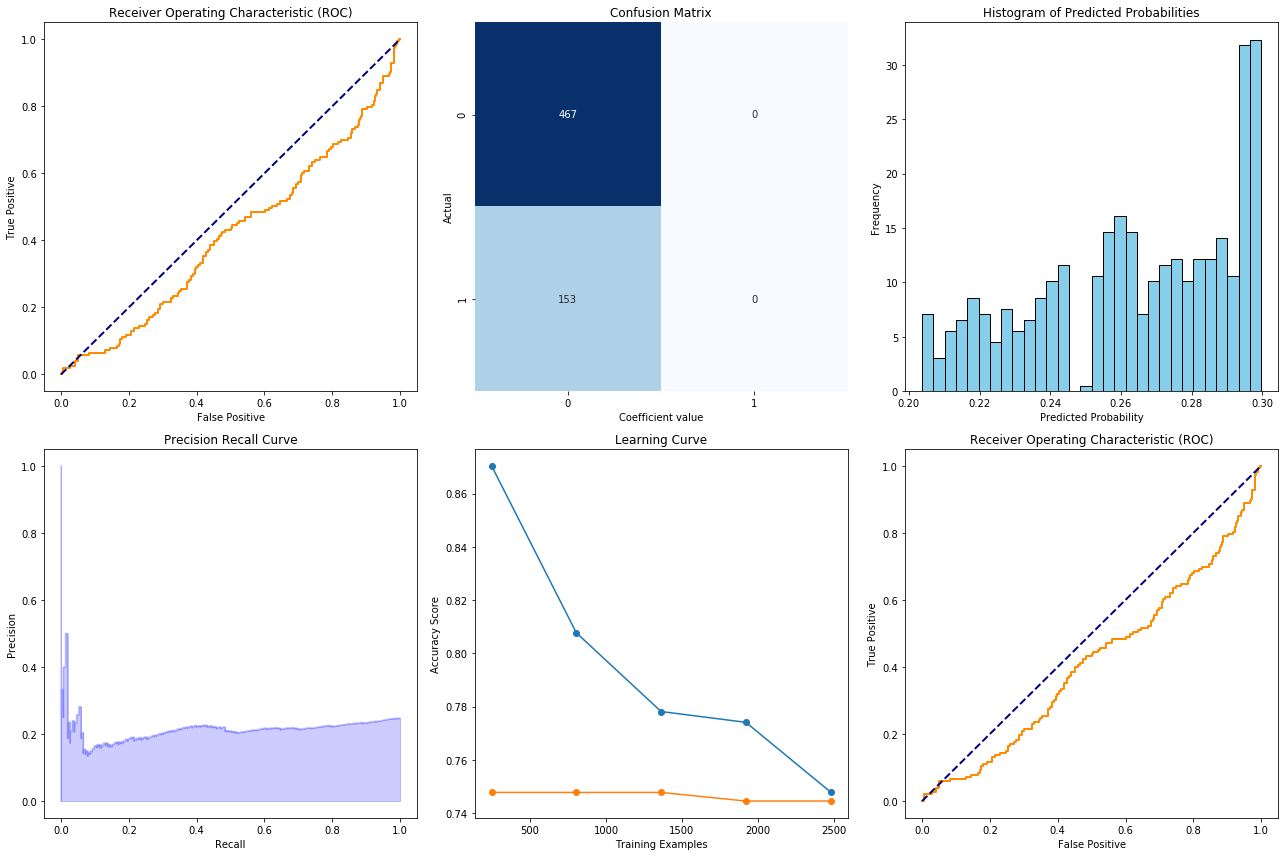

Logistic Regressions with Hyperparamteter Tuning 


In [246]:
print("5.2.1.Logistic Regressions with Hyperparamteter Tuning ")

print(f'Best Model Accuracy: {accuracy_logreg}')
print('Confusion Matrix:\n', conf_matrix_logreg)
print('Classification Report:\n', classification_report_result_logreg)
print("-------------------------------------------------------------------------------")

plt.figure(figsize=(18,12,))
plt.subplot(2,3,1)
plt.plot(fpr,tpr, color= 'darkorange', lw=2, label='ROC CURVE')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristic (ROC)')
      
plt.subplot(2,3,2)       
print("Confusion matrix")
sns.heatmap(conf_matrix_logreg, 
            annot=True, 
            fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Coefficient value')
plt.ylabel('Actual')          
plt.title('Confusion Matrix')
        
plt.subplot(2,3,3)
print("Histogram of predicted probabilities")
plt.hist(y_pred_proba_logreg_model_ht, 
         bins=30, edgecolor='black', color='skyblue', density=True)
#sns.distplot(y_prob,bins=num_bins, kde=True)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')

               
plt.subplot(2,3,4)
print("precision recall curve")
plt.step(recall, precision, 
         color='b', alpha=0.2,where='post')
plt.fill_between (recall, precision,
                  step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
     
plt.subplot(2,3,5)
print("learning curve")
plt.plot(train_sizes, np.mean (train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean (test_scores, axis=1), 'o-',label="Cross-validation score ")
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')

plt.subplot(2,3,6)
plt.plot(fpr,tpr, color= 'darkorange', lw=2, label='ROC CURVE')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristic (ROC)')
 # Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('m_logreg_ht.png')
plt.show()   
print("Logistic Regressions with Hyperparamteter Tuning ")

**5.2.1.Logistic Regressions with Hyperparamteter Tuning**

***Comments***: 
Analysis of Logistc probability model 
- The logistic probability model a much more simple model in relation to base learners that will be developed int he next steps  (machine learning models)
- When looking at the probability distribution, the model cannot assign a probability above 30%, which limits the application of the model in real life.  
- Despite using Hyperparameter tuning grid to obtain the best performing model, the results are underwhelming
- This model will not be used in the final ensemble learning voting classifier model 

In [ ]:
del df_lr,x_lr,y_lr
del results_logreg_ht,best_logreg_model,grid_search_log,param_grid_log,logreg_model_ht
del x_lr_train, x_lr_test, y_lr_train, y_lr_test 
del accuracy_logreg,conf_matrix_logreg,classification_report_result_logreg
del average_precision,precision, recall,fpr, tpr, thresholds
del train_sizes, train_scores, test_scores

5.2.1.Logistic Regressions with Hyperparamteter Tuning

- [Top](#table_contents)   
       

       
### 5.2.2.Decision Tree Classifier with Hyper paramer Tuning  <a id="dt_ht"></a>
        

- **Decision Tree** is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions.
- On every split, the algorithm tries to divide the dataset into the smallest subset possible[2]. 
 - the goal is to find a set of decision rules that optimally split the feature space to classify instances into different classes. The optimization problem involves defining decision variables, an objective function, and constraints
 
 
**Decision Variables:**

Let \(n\) be the number of samples and \(m\) be the number of potential decision rules. For each sample \(i\) and each decision rule \(d\), introduce a binary decision variable \(z_{i,d}\), indicating whether sample \(i\) is assigned to decision rule \(d\). Additionally, introduce binary decision variables \(w_d\) to represent whether a decision rule is selected.

$$[z_{i,d} \in \{0, 1\}, \quad w_d \in \{0, 1\}]$$

**Objective Function:**

The objective function aims to minimize a combination of misclassification loss and a regularization term. Let \(L\) be the misclassification loss function, \(\lambda\) be the regularization parameter, and \(\text{complexity}(d)\) denote the complexity of decision rule \(d\).

$$[\text{Minimize: } \quad \sum_{i} \sum_{d} L(y_i, \hat{y}_{i,d}) \cdot z_{i,d} + \lambda \sum_{d} \text{complexity}(d) \cdot w_d]$$

Here, \(y_i\) is the true label for sample \(i\) and \(\hat{y}_{i,d}\) is the predicted label based on decision rule \(d\).

**Constraints:**
1. **Sample Assignment Constraint:**
   - Each sample must be assigned to exactly one decision rule.

$$[\sum_{d} z_{i,d} = 1, \quad \forall i]$$

2. **Decision Rule Selection Constraint:**
   - Each decision rule must be selected at most once.

$$[\sum_{i} z_{i,d} \leq M \cdot w_d, \quad \forall d]$$

Here, \(M\) is a large constant.

** Binary Constraints:**

$$[z_{i,d} \in \{0, 1\}, \quad w_d \in \{0, 1\}]$$



In [286]:
print ("5.2.2.Decision Tree Classifier with Hyper parameter Tuning ")

5.2.2.Decision Tree Classifier with Hyper parameter Tuning 


In [241]:
print ("5.2.2.Decision Tree Classifier with Hyper parameter Tuning ")


import time
print ("Decision Tree Classifier with Hyper parameter Tuning ")
start_time = time.time()

print("Creating new dataset")
df_dtc=df_m000.copy()
df_dtc=df_dtc.tail(3100)
x_dtc = df_dtc[feat_list]
y_dtc = df_dtc[target_y]
print(x_dtc.shape[0])
print(x_dtc.shape[0])
print(x_dtc.shape, x_dtc.shape)
print("Splitting Train and Test set")
x_dtc_train, x_dtc_test, y_dtc_train, y_dtc_test = train_test_split(x_dtc, y_dtc, 
                                                                    test_size=test_size0,
                                                                    random_state=random_state0)

Decision Tree Classifier with Hyper parameter Tuning 
Decision Tree Classifier with Hyper parameter Tuning 
Creating new dataset
3100
3100
(3100, 204) (3100, 204)
Splitting Train and Test set


In [242]:
print("5.2.2.Define the Model:Decision Tree Classifier model")
dt_classifier_model_ht = DecisionTreeClassifier(random_state=random_state0)

print("Define hyperparameters for tuning")
print("Create GridsearchCV for hyperparameter tuning") 
print("Parameters list to search")
#]'max_features' : ['auto', 'sqrt', 'log2']
#'splitter' : ['best', 'random'],
#'criterion' : ['gini', 'entropy', 'log_loss'],
#    'criterion': 'gini',  # or 'entropy'
#    'max_depth': 5,
#    'min_samples_split': 2,
#    'min_samples_leaf': 1,
#    'random_state': random_state0
print("---------------------------------------------------------------------------------------")
param_grid_dtc = {
    'criterion' : ['gini','entropy',],
    'splitter' : ['best'],
    'max_depth' : range(1,4,1),
    'min_samples_split' : range(2,4,1),
    'min_samples_leaf' : range(1,4,1),
    'max_features' : ['auto',]
}   


print("Specify Grid search")
print("Grid Search")
grid_search_dtc = GridSearchCV(estimator= dt_classifier_model_ht, 
                               param_grid=param_grid_dtc, 
                               verbose=2, 
                               n_jobs=-1, 
                               cv=3, 
                               scoring='accuracy')
print("Fitting")
print("using same  dataset")
grid_search_dtc.fit(x_dtc_train, y_dtc_train)
print("Fitting Complete")
print("best estimator after fitting")
best_dtc_model = grid_search_dtc.best_estimator_

print("---------------------------------------------------------------------------------------")
print("Save the GridSearchCV results")
results_dtc_ht = pd.DataFrame(grid_search_dtc.cv_results_)
#print(results_logreg_ht)
results_dtc_ht.to_csv('grid_search_results_dtc.csv', index=True)
print("GridSearchCV results saved as 'grid_search_results_dtc.csv'.")
print("Save the best model")
model_filename = 'best_dtc_model.pkl'
joblib.dump(best_dtc_model, model_filename)
print("Saved")

print("---------------------------------------------------------------------------------------")
# Measure the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print ("Decision Tree Classifier with Hyper parameter Tuning ")

Define the Model:Decision Tree Classifier model
Define hyperparameters for tuning
Create GridsearchCV for hyperparameter tuning
Parameters list to search
---------------------------------------------------------------------------------------
Specify Grid search
Grid Search
Fitting
using same  dataset
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.5s


Fitting Complete
best estimator after fitting
---------------------------------------------------------------------------------------
Save the GridSearchCV results
GridSearchCV results saved as 'grid_search_results_dtc.csv'.
Save the best model
Saved
---------------------------------------------------------------------------------------
Elapsed Time: 39.63 seconds
Decision Tree Classifier with Hyper parameter Tuning 


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   19.4s finished


In [26]:
print ("5.2.2.Decision Tree Classifier with Hyper parameter Tuning ")

print("# Load the saved model")
loaded_best_dtc_model = joblib.load('best_dtc_model.pkl')

print("best parameters and best model-estimator")
# Show best hyperparameters and best estimator from the loaded model
best_params_dtc = loaded_best_dtc_model.get_params()
best_dtc_model = loaded_best_dtc_model
best_dtc_model_ht=best_dtc_model
print("Finding the Best hyperparamters")
print("Best Hyperparameters:", best_params_dtc)
print("Finding the Model")
print("Best Model:",best_dtc_model)


print("---------------------------------------------------------------------------------------")
print("Make predictions on the test set with the best model")
y_pred_proba_dtc_model_ht= best_dtc_model_ht.predict_proba(x_dtc_test)[:, 1]
y_pred_dtc_model_ht = best_dtc_model_ht.predict(x_dtc_test)

# Display selected features
sfm_dtc = SelectFromModel(best_dtc_model, threshold=0.01)
sfm_dtc.fit(x_dtc_train, y_dtc_train)
selected_features_dtc = x_dtc.columns[sfm_dtc.get_support()]
print("Selected Features:", selected_features_dtc)


# Display selected feature names from the training set
#selected_features = x_dtc.columns[best_dtc_model.tree_.feature[best_dtc_model.tree_.feature != -2]]
#print("Selected Features from Training Set:")
#print(selected_features)
## Show the best features from the best model using feature importances
#feature_importances = loaded_dt_model.feature_importances_
#best_features = [feature for feature, importance in zip(X.columns, feature_importances) if importance > 0]

print("---------------------------------------------------------------------------------------")
print("Evaluating the Model")
print("1-Accuracy Score analysis")
accuracy_dtc =accuracy_score (y_dtc_test,y_pred_dtc_model_ht)
print(f'Best Model Accuracy: {accuracy_dtc}')
print("Decision Tree Classifier training accuracy score is : {}%".format(round(best_dtc_model.score(x_dtc_train, 
                                                                                               y_dtc_train)*100)))
print("Decision Tree Classifier model's accuracy score is : {}%".format(round(accuracy_score(y_dtc_test,
                                                                                             y_pred_dtc_model_ht)*100)))
print("---------------------------------------------------------------------------------------")
print("2-Confusion Matrix")
conf_matrix_dtc= confusion_matrix(y_dtc_test,y_pred_dtc_model_ht) 
true_positive = conf_matrix_dtc[0][0]
false_positive = conf_matrix_dtc[0][1]
false_negative = conf_matrix_dtc[1][0]
true_negative = conf_matrix_dtc[1][0]
print("---------------------------------------------------------------------------------------")
print("Confusion_matrix results")
print('True Positive:',
      true_positive, 
      '\nTrue Negative:',
      true_negative, 
      '\nFalse Negative:',
      false_negative, 
      '\nFalse Positive:',
      false_positive)
print('Confusion Matrix:\n', conf_matrix_dtc)
print("---------------------------------------------------------------------------------------")
print("3-classification_report_result")
classification_report_result_dtc =classification_report (y_dtc_test,y_pred_dtc_model_ht) 
print('Classification Report:\n', classification_report_result_dtc)
print("---------------------------------------------------------------------------------------")
print("4-ROC Curve") # 
fpr, tpr, thresholds = roc_curve(y_dtc_test,y_pred_proba_dtc_model_ht)
roc_auc = auc(fpr, tpr)
print("---------------------------------------------------------------------------------------")
print("5-Precision-Recall Curve")
precision, recall, _ = precision_recall_curve(y_dtc_test,y_pred_proba_dtc_model_ht)
average_precision = average_precision_score(y_dtc_test,y_pred_proba_dtc_model_ht)
#print("6 Feature Importance")
#feature_importance = pd.Series(logreg_model.coef_[0], index=x_lr.columns).sort_values(ascending=False)
# Feature Importance
#feature_importance = pd.Series(logreg_model.coef_[0], index=X.columns).sort_values(ascending=False)
print("Learning Curve")
#train_sizes, train_scores, test_scores = learning_curve(best_dtc_model_ht, 
#                                                        x_dtc,y_dtc, 
#                                                        cv=5, scoring='accuracy')#




print ("5.2.2Decision Tree Classifier with Hyper paramer Tuning ")
print ("5.2.2.Decision Tree Classifier with Hyper paramer Tuning ")

Decision Tree Classifier with Hyper parameter Tuning 
# Load the saved model
best parameters and best model-estimator
Finding the Best hyperparamters
Best Hyperparameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 99, 'splitter': 'best'}
Finding the Model
Best Model: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')
Make predictions on the test set with the best model
Selected Features: Index(['3s2s_z

In [ ]:
print ("5.2.2Decision Tree Classifier with Hyper paramer Tuning")

Decision Tree Classifier with Hyper paramer Tuning
Confusion matrix
Histogram of predicted probabilities


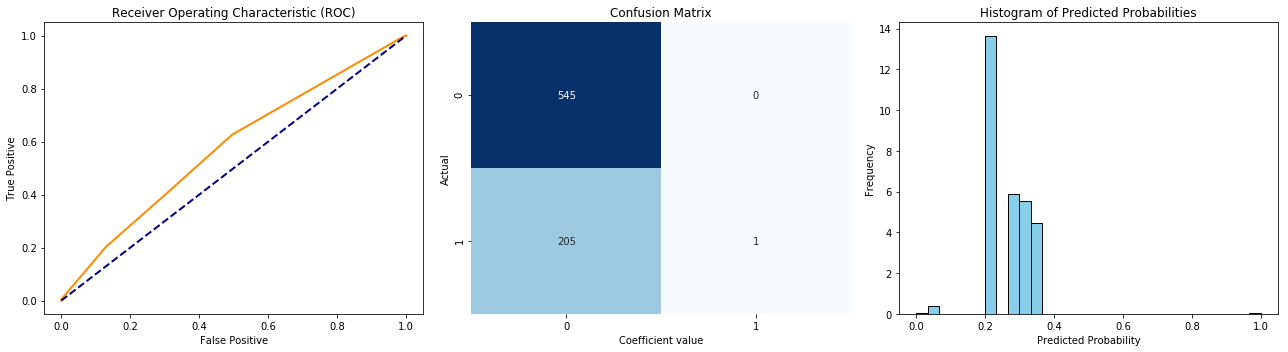

Decision Tree Classifier with Hyper paramer Tuning 


In [27]:
print ("5.2.2Decision Tree Classifier with Hyper paramer Tuning")

#fig, axs = plt.subplots(2, 3, figsize=(18, 10))
plt.figure(figsize=(18,5,))
plt.subplot(1,3,1)
plt.plot(fpr,tpr, color= 'darkorange', lw=2, label='ROC CURVE')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristic (ROC)')
      
plt.subplot(1,3,2)       
print("Confusion matrix")
sns.heatmap(conf_matrix_dtc, 
            annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Coefficient value')
plt.ylabel('Actual')          
plt.title('Confusion Matrix')
        
plt.subplot(1,3,3)
print("Histogram of predicted probabilities")
plt.hist(y_pred_proba_dtc_model_ht, bins=30, edgecolor='black', color='skyblue', density=True)
#sns.distplot(y_prob,bins=num_bins, kde=True)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('m_dtc_ht.png')
plt.show()   

print ("Decision Tree Classifier with Hyper paramer Tuning ")

Decision Tree Classifier with Hyper paramer Tuning
Plotting Decision Tree
from sklearn import tree
 import matplotlib.pyplot as plt
Decision Tree Classifier with Hyper paramer Tuning
Plotting Decision Tree
from sklearn import tree
 import matplotlib.pyplot as plt
Selected Features from Training Set:
['cleveland_median_pce_scaled', 'chicago_activity_zscore5y', 'core_cpi_3m_ann', '3s1s_diff_lag1', 'sp500_diff_lag1', '3s2s_zscore90_lag2']
Decision Tree Classifier Model
Plotting Decision Tree


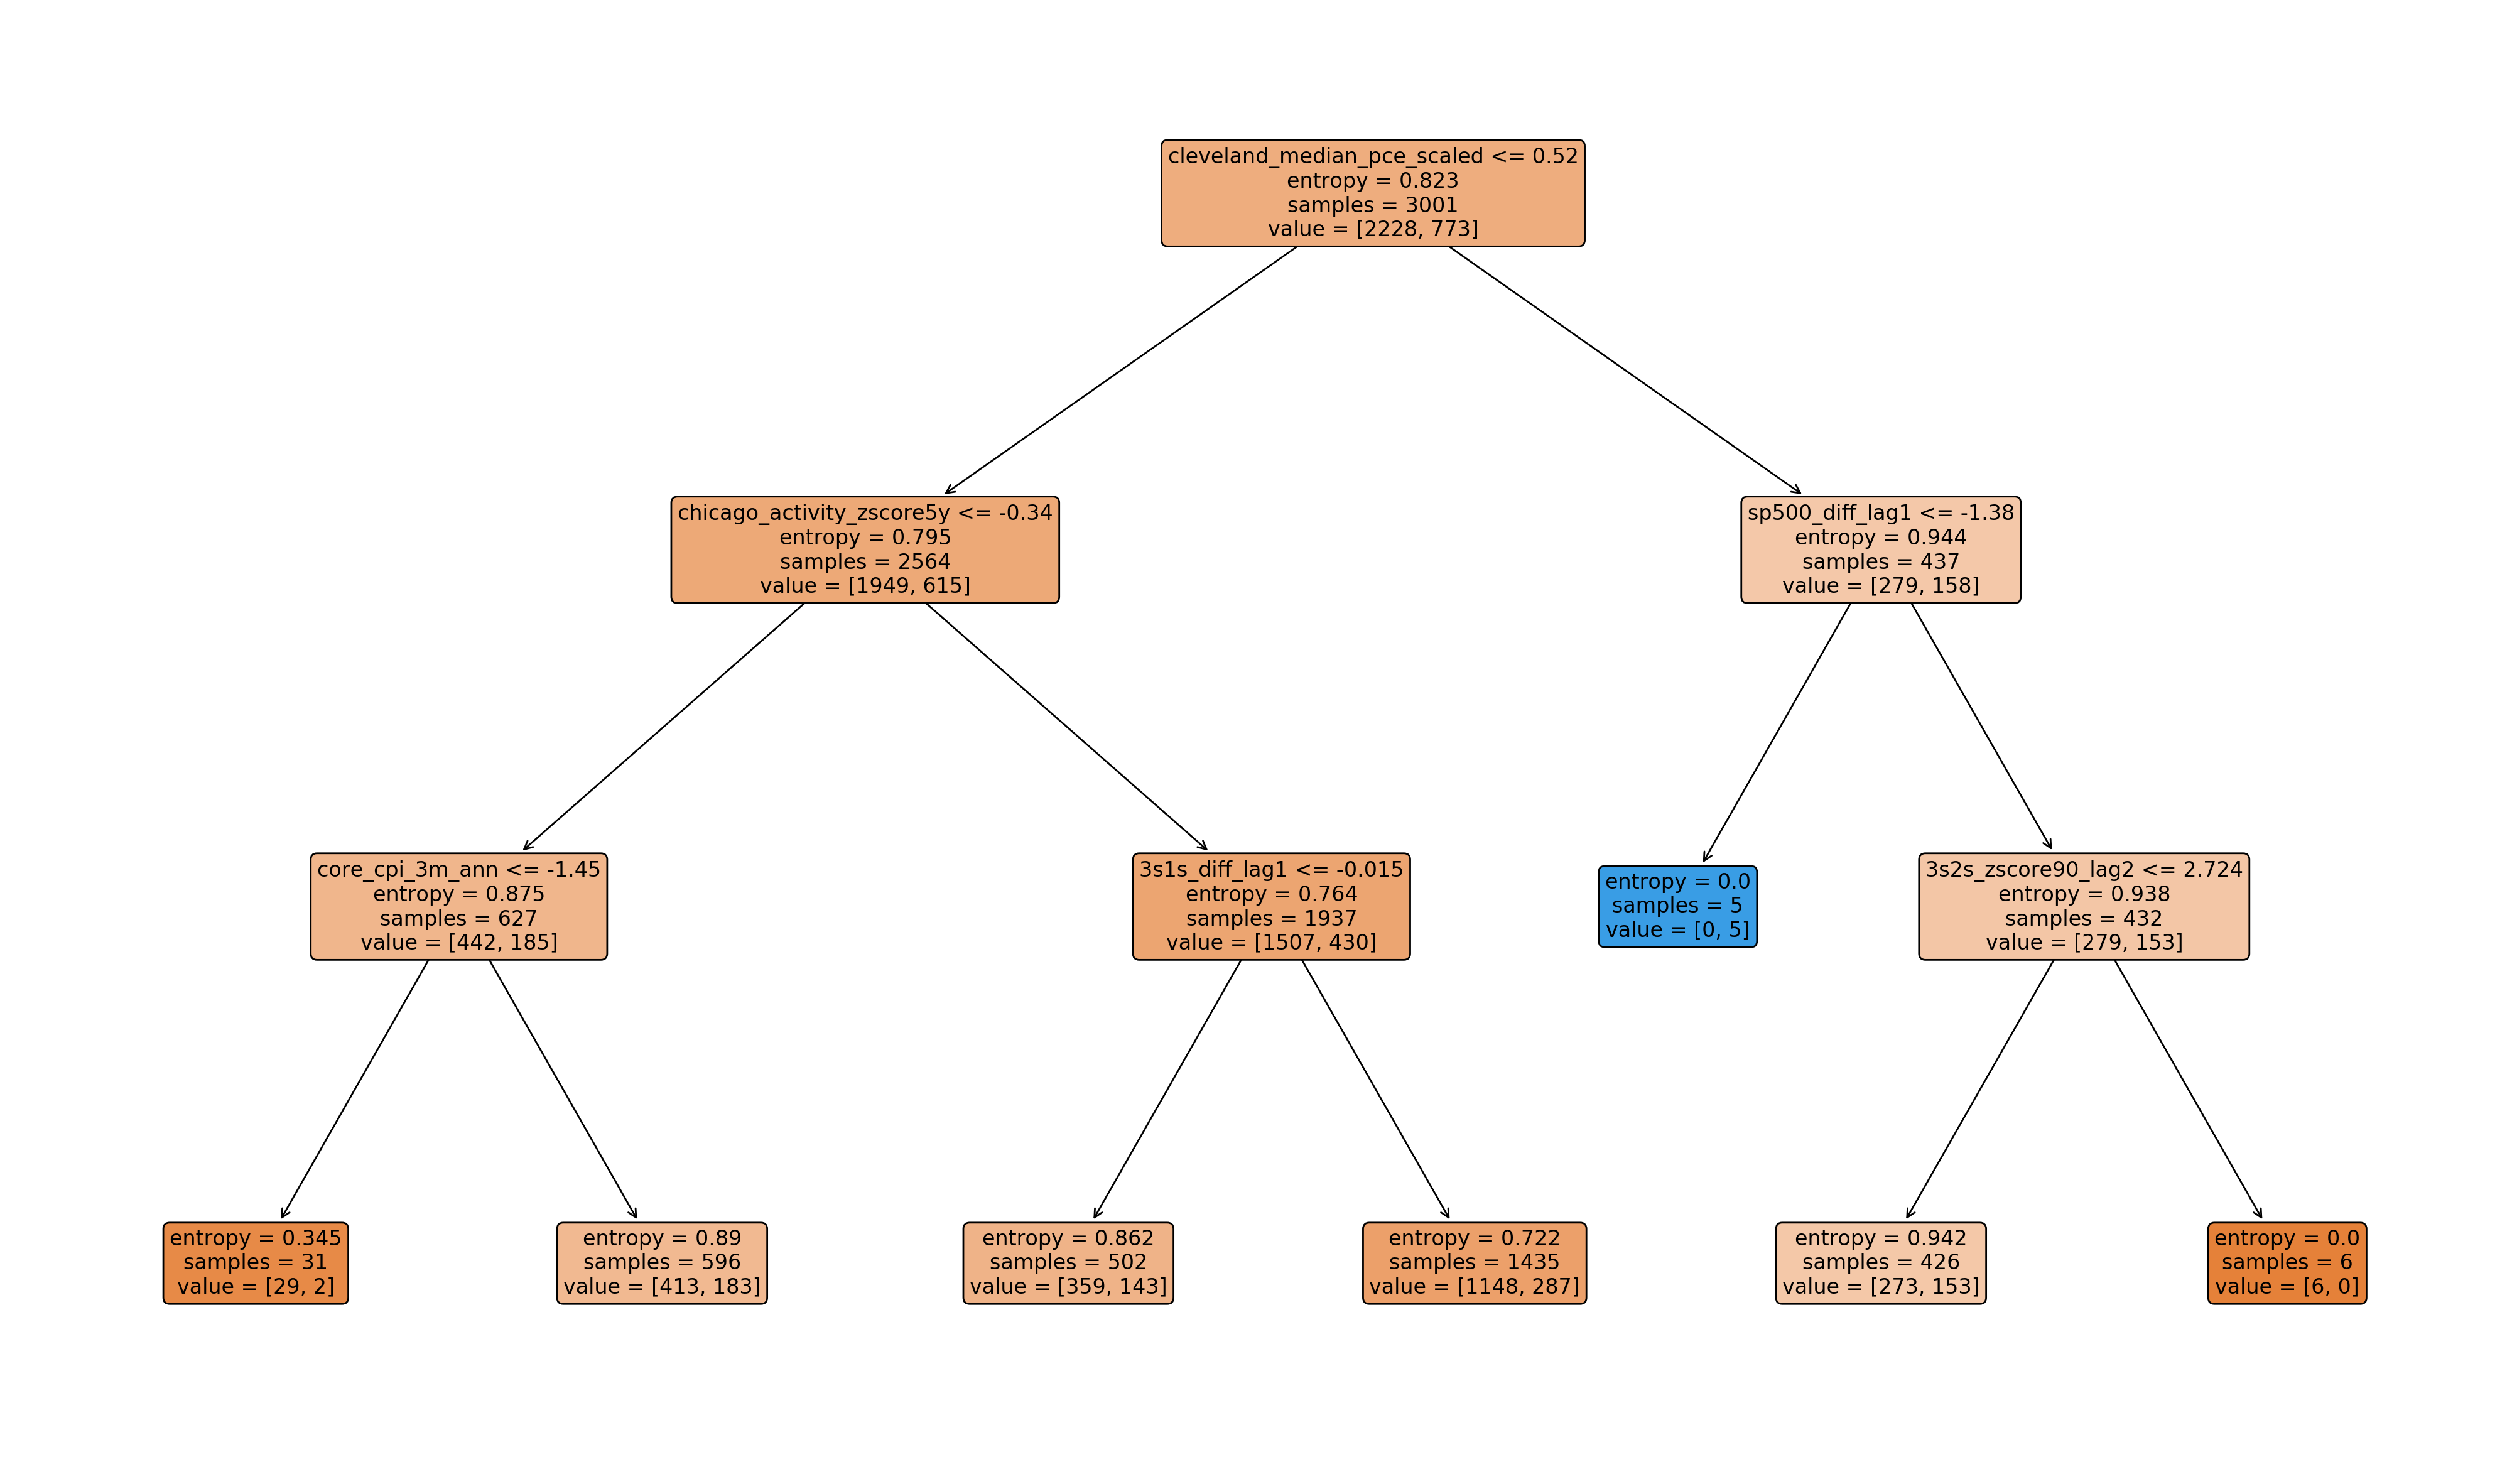

Decision Tree Classifier with Hyper paramer Tuning
Decision Tree Classifier with Hyper paramer Tuning


In [28]:
print ("5.2.2Decision Tree Classifier with Hyper paramer Tuning")
print("Plotting Decision Tree")
print("from sklearn import tree")
print(" import matplotlib.pyplot as plt")
print ("Decision Tree Classifier with Hyper paramer Tuning")
print("Plotting Decision Tree")
print("from sklearn import tree")
print(" import matplotlib.pyplot as plt")
print("---------------------------------------------------------------------------------------")
# Display selected feature names from the training set
selected_feature_indices = best_dtc_model_ht.tree_.feature[best_dtc_model_ht.tree_.feature != -2]
selected_features = x_dtc.columns[selected_feature_indices]
print("Selected Features from Training Set:")
print(selected_features.tolist())

X_col_names = list(x_dtc_train.columns)
feature_names_g = X_col_names

print("---------------------------------------------------------------------------------------")
print("Decision Tree Classifier Model")
print("Plotting Decision Tree")
fig = plt.figure(figsize=(25,15), dpi=200)
tree.plot_tree(best_dtc_model_ht, max_depth=5,feature_names=feature_names_g,
               filled=True, rounded=True, fontsize=12)

plt.show()
print ("Decision Tree Classifier with Hyper paramer Tuning")

print("---------------------------------------------------------------------------------------")

print ("5.2.2.Decision Tree Classifier with Hyper paramer Tuning")

**5.2.2.Decision Tree Classifier with Hyper paramer Tuning:**
**Comment**
- The Decision Tree represent a much more easier framework to comprehend the results. 
- ITs noteworthy the importance of the economic variables in the model 
- According to the probability distribution histogram, the decision tree model cannot assign a probablity above 40%
- We will not use this model as a base learner in the final versIon of the ensemble learning voting classifer model

In [ ]:
del feature_names_g,df_dtc,x_dtc,y_dtc,x_dtc_train, x_dtc_test, y_dtc_train, y_dtc_test,
del model_dtc,conf_matrix,y_prob,fpr,tpr
del selected_feature_indices, selected_features ,X_col_names,feature_names_g
del grid_search_dtc,dt_classifier_model_ht,best_dtc_model,results_dtc_ht
del accuracy_dtc,conf_matrix_dtc, classification_report_result_dtc, 
del precision, recall, average_precision,train_sizes, train_scores, test_scores
del selected_feature_indices,selected_features,X_col_names,feature_names_g

- [Top](#table_contents)  
    
# 5.2.3. Random Forest Classifier  <a id="random"></a>

- **Random Forest Classifier** combines the output of multiple decision trees to reach a single result.
- Random forests are for supervised machine learning, where there is a labeled target variable.
 - Random forests can be used for solving regression (numeric target variable) and classification (categorical target variable) problems.
- Random forest works on the Bagging principle. It creates a different training subset from sample training data with replacement & the final output is based on majority voting. For example,  Random Forest.

# Random Forest Classifier Optimization Problem for Binary Classification

In a Random Forest classifier, the goal is to build an ensemble of decision trees to collectively make accurate predictions. The optimization problem involves defining decision variables, an objective function, and constraints.

## Decision Variables:

Let \( n \) be the number of samples, \( m \) be the number of potential decision rules for each tree, and \( T \) be the total number of trees in the forest. For each sample \( i \), each decision rule \( d \), and each tree \( t \), introduce a binary decision variable \( z_{i,d,t} \), indicating whether sample \( i \) is assigned to decision rule \( d \) in tree \( t \). Additionally, introduce binary decision variables \( w_t \) to represent whether a tree is selected.

$$z_{i,d,t} \in \{0, 1\}, \quad w_t \in \{0, 1\}$$

## Objective Function:

The objective function aims to minimize a combination of misclassification loss and a regularization term across all trees. Let \( L \) be the misclassification loss function, \( \lambda \) be the regularization parameter, and \( \text{complexity}(d) \) denote the complexity of decision rule \( d \).

$$[\text{Minimize: } \quad \sum_{t=1}^{T} \left( \sum_{i} \sum_{d} L(y_i, \hat{y}_{i,d,t}) \cdot z_{i,d,t} + \lambda \sum_{d} \text{complexity}(d) \cdot w_t \right)]$$

Here, \( y_i \) is the true label for sample \( i \), and \( \hat{y}_{i,d,t} \) is the predicted label based on decision rule \( d \) in tree \( t \).

## Constraints:

1. **Sample Assignment Constraint:**
   - Each sample must be assigned to exactly one decision rule in each tree.

$$[\sum_{d} z_{i,d,t} = 1, \quad \forall i, \forall t]$$

2. **Decision Rule Selection Constraint:**
   - Each decision rule must be selected at most once in each tree.

$$[\sum_{i} z_{i,d,t} \leq M \cdot w_t, \quad \forall d, \forall t]$$

Here, \( M \) is a large constant.

3. **Tree Selection Constraint:**
   - At most \( B \) trees are selected from the total \( T \) trees.

$$[\sum_{t=1}^{T} w_t \leq B]$$

## Binary Constraints:

$$[z_{i,d,t} \in \{0, 1\}, \quad w_t \in \{0, 1\}]$$

These binary constraints ensure that the decision variables are either 0 or 1.

This formulation captures the essence of the Random Forest classifier optimization problem for binary classification, aiming to build an ensemble of trees that collectively provide accurate and robust predictions.

- [Top](#table_contents)  
    
# 5.2.3. Random Forest Classifier with Hyperparameter Tuning
        
        
        

In [282]:
print("5.2.3.Random Forest Classifier with Hyperparameter Tuning")
print("Random Forest Classifier with Hyperparameter Tuning")
start_time = time.time()
print("from sklearn.ensemble import RandomForestClassifier")
print("from sklearn.feature_selection import SelectFromModel")
print("Creating new dataset")
df_rfc=df_m000.copy()
df_rfc=df_rfc.tail(3100)
x_rfc = df_rfc[feat_list]
y_rfc = df_rfc[target_y]
print(x_rfc.shape[0])
print(y_rfc.shape[0])
print(y_rfc.shape, y_rfc.shape)
print("Splitting Train and Test set")
x_rfc_train, x_rfc_test, y_rfc_train, y_rfc_test = train_test_split(x_rfc, y_rfc, 
                                                                    test_size=test_size0,
                                                                    random_state=random_state0)

print("---------------------------------------------------------------------------------------------------")

5.2.3.Random Forest Classifier with Hyperparameter Tuning
Random Forest Classifier with Hyperparameter Tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
Creating new dataset
3100
3100
(3100, 1) (3100, 1)
Splitting Train and Test set
---------------------------------------------------------------------------------------------------


In [233]:
print("5.2.3.Define the Model:RFXC")
rfc_model_ht = RandomForestClassifier(random_state=random_state0)


print("Define hyperparameters for tuning")
print("Create GridsearchCV for hyperparameter tuning") 
print("Parameters list to search")
#grid_params = { 'criterion' : ['gini', 'entropy', 'log_loss'],
param_grid_rfc = { 'criterion' : ['gini','entropy',],
                  'n_estimators': [500],
                  'max_depth': [10, 20,],
                  'min_samples_split': [5,10 ],
                  'min_samples_leaf': [ 2,]
                 }        
print("Specify Grid search")
print("Grid Search")
grid_search_rfc = GridSearchCV(estimator=rfc_model_ht, 
                           param_grid=param_grid_rfc, 
                           n_jobs=-1, 
                           verbose=2, 
                           cv=3, scoring='accuracy')        
print("Fitting")
print("using same  dataset")
grid_search_rfc.fit(x_rfc_train, y_rfc_train)
print("Fitting Complete")
print("best estimator after fitting")
best_rfc_model = grid_search_rfc.best_estimator_

print("---------------------------------------------------------------------------------------------------")

print("Save the GridSearchCV results")
results_rfc_ht = pd.DataFrame(grid_search_rfc.cv_results_)
#print(results_logreg_ht)
results_rfc_ht.to_csv('grid_search_results_rfc.csv', index=True)
print("GridSearchCV results saved as 'grid_search_results_rfc.csv'.")
print("Save the best model")
model_filename = 'best_rfc_model.pkl'
joblib.dump(best_rfc_model, model_filename)
print("Saved")

# Measure the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("Random Forest Classifier with Hyperparameter Tuning")




#print("Finding the best parameters")
#grid_search_rfc.best_params_     
## Display the best hyperparameters
#best_params_rfc = grid_search_rfc.best_params_
#print("Best Hyperparameters:", best_params_rfc)
## Get the best estimator
#best_rfc_classifier = grid_search_rfc.best_estimator_

# Display selected features
#sfm = SelectFromModel(best_rfc_classifier, threshold=0.01)
#sfm.fit(x_rfc_train, y_rfc_train)
#selected_features = x_rfc.columns[sfm.get_support()]
#print("Selected Features:", selected_features)


print("5.2.3.Random Forest Classifier with Hyperparameter Tuning")
print("---------------------------------------------------------------------------------------------------")

Define the Model:Decision Tree Classifier model
Define hyperparameters for tuning
Create GridsearchCV for hyperparameter tuning
Parameters list to search
Specify Grid search
Grid Search
Fitting
using same  dataset
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:  2.0min remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.0min finished


Fitting Complete
best estimator after fitting
---------------------------------------------------------------------------------------------------
Save the GridSearchCV results
GridSearchCV results saved as 'grid_search_results_rfc.csv'.
Save the best model
Saved
Elapsed Time: 445.06 seconds
Random Forest Classifier with Hyperparameter Tuning
Random Forest Classifier with Hyperparameter Tuning
---------------------------------------------------------------------------------------------------


In [281]:
print("5.2.3.Random Forest Classifier with Hyperparameter Tuning")
print("Random Forest Classifier with Hyperparameter Tuning")

print("# Load the saved model")
loaded_best_rfc_model = joblib.load('best_rfc_model.pkl')

print("best parameters and best model-estimator")
# Show best hyperparameters and best estimator from the loaded model
best_params_rfc = loaded_best_rfc_model.get_params()
best_rfc_model = loaded_best_rfc_model
best_rfc_model_ht=best_rfc_model
print("Finding the Best hyperparamters")
print("Best Hyperparameters:", best_params_rfc)
print("Finding the Model")
print("Best Model:",best_rfc_model)

print("---------------------------------------------------------------------------------------------------")
# Display selected features
sfm_rfc = SelectFromModel(best_rfc_model, threshold=0.01)
sfm_rfc.fit(x_rfc_train, y_rfc_train)
selected_features_rfc = x_rfc.columns[sfm_rfc.get_support()]
print("Selected Features:", selected_features_rfc)



print("Make predictions on the test set with the best model")
y_pred_proba_rfc_model_ht= best_rfc_model_ht.predict_proba(x_rfc_test)[:, 1]
y_pred_rfc_model_ht = best_rfc_model_ht.predict(x_rfc_test)


print("---------------------------------------------------------------------------------------------------")
print("Evaluating the Model")
print("1-Accuracy Score analysis")
accuracy_rfc =accuracy_score (y_rfc_test,y_pred_rfc_model_ht)
print(f'Best Model Accuracy: {accuracy_rfc}')
print("Decision Tree Classifier training accuracy score is : {}%".format(round(best_rfc_model.score(x_rfc_train, 
                                                                                               y_rfc_train)*100)))
print("Decision Tree Classifier model's accuracy score is : {}%".format(round(accuracy_score(y_rfc_test,
                                                                                             y_pred_rfc_model_ht)*100)))
print("---------------------------------------------------------------------------------------------------")
print("2-Confusion Matrix")
conf_matrix_rfc= confusion_matrix(y_rfc_test,y_pred_rfc_model_ht) 
confusion_matrix_rfc=conf_matrix_rfc
true_positive = conf_matrix_rfc[0][0]
false_positive = conf_matrix_rfc[0][1]
false_negative = conf_matrix_rfc[1][0]
true_negative = conf_matrix_rfc[1][0]
print("Confusion_matrix results")
print('True Positive:',
      true_positive, 
      '\nTrue Negative:',
      true_negative, 
      '\nFalse Negative:',
      false_negative, 
      '\nFalse Positive:',
      false_positive)
print('Confusion Matrix:\n', conf_matrix_rfc)
print("---------------------------------------------------------------------------------------------------")
print("3-classification_report_result")
classification_report_result_rfc =classification_report (y_rfc_test,y_pred_rfc_model_ht) 
print('Classification Report:\n', classification_report_result_rfc)
print("4-ROC Curve") # 
fpr, tpr, thresholds = roc_curve(y_rfc_test,y_pred_proba_rfc_model_ht)
roc_auc = auc(fpr, tpr)
print("5-Precision-Recall Curve")
precision, recall, _ = precision_recall_curve(y_rfc_test,y_pred_proba_rfc_model_ht)
average_precision = average_precision_score(y_rfc_test,y_pred_proba_rfc_model_ht)
print("6 Feature Importance")
#feature_importance = pd.Series(logreg_model.coef_[0], index=x_lr.columns).sort_values(ascending=False)
# Feature Importance
#feature_importance = pd.Series(logreg_model.coef_[0], index=X.columns).sort_values(ascending=False)
#print("Learning Curve")
#train_sizes, train_scores, test_scores = learning_curve(best_rfc_model_ht, 
#                                                        x_rfc,y_rfc, 
#                                                        cv=5, scoring='accuracy')



print("5.2.3.Random Forest Classifier with Hyperparameter Tuning")




5.2.3.Random Forest Classifier with Hyperparameter Tuning
Random Forest Classifier with Hyperparameter Tuning
# Load the saved model
best parameters and best model-estimator
Finding the Best hyperparamters
Best Hyperparameters: {'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 99, 'verbose': 0, 'warm_start': False}
Finding the Model
Best Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimat

Random Forest Classifier with Hyperparameter Tuning
Best Model Accuracy: 0.7467741935483871
Confusion Matrix:
 [[462   5]
 [152   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.85       467
           1       0.17      0.01      0.01       153

    accuracy                           0.75       620
   macro avg       0.46      0.50      0.43       620
weighted avg       0.61      0.75      0.65       620

-----------------------------------------------------------------------------------------
Random Forest Classifier with Hyperparameter Tuning
Confusion matrix
Histogram of predicted probabilities


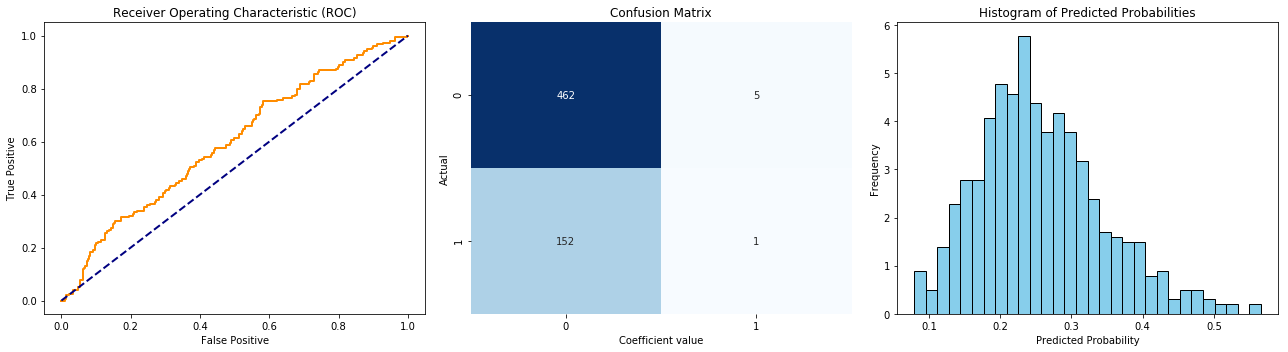

Random Forest Classifier with Hyperparameter Tuning
Random Forest Classifier with Hyperparameter Tuning


In [237]:
print("5.2.3.Random Forest Classifier with Hyperparameter Tuning")

print(f'Best Model Accuracy: {accuracy_rfc}')
print('Confusion Matrix:\n', conf_matrix_rfc)
print('Classification Report:\n', classification_report_result_rfc)

print("-----------------------------------------------------------------------------------------")
print("Random Forest Classifier with Hyperparameter Tuning")

#fig, axs = plt.subplots(2, 3, figsize=(18, 10))
plt.figure(figsize=(18,5,))
plt.subplot(1,3,1)
plt.plot(fpr,tpr, color= 'darkorange', lw=2, label='ROC CURVE')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristic (ROC)')
      
plt.subplot(1,3,2)       
print("Confusion matrix")
sns.heatmap(conf_matrix_rfc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Coefficient value')
plt.ylabel('Actual')          
plt.title('Confusion Matrix')
        
plt.subplot(1,3,3)
print("Histogram of predicted probabilities")
plt.hist(y_pred_proba_rfc_model_ht, bins=30, edgecolor='black', color='skyblue', density=True)
#sns.distplot(y_prob,bins=num_bins, kde=True)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('m_rfc_ht.png')
plt.show()   

print("5.2.3.Random Forest Classifier with Hyperparameter Tuning")
print("Random Forest Classifier with Hyperparameter Tuning")

In [283]:
print("5.2.3.Random Forest Classifier with Hyperparameter Tuning")
print("Random Forest Classifier with Hyperparameter Tuning")
best_rfc_model

feature_importances = best_rfc_model.feature_importances_
feature_names = x_rfc.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Top 5 Important Features:")
print(sorted_feature_importance_df.head(5))


print("5.2.3.Random Forest Classifier with Hyperparameter Tuning")    
print("Random Forest Classifier with Hyperparameter Tuning")

5.2.3.Random Forest Classifier with Hyperparameter Tuning
Random Forest Classifier with Hyperparameter Tuning
Top 5 Important Features:
                Feature  Importance
75       5s1s_diff_lag1    0.016223
25   6m1s_zscore30_lag1    0.013860
41   6m1s_zscore60_lag1    0.013579
2    3s1s_zscore30_lag1    0.013361
100      3s1s_diff_lag1    0.012570
5.2.3.Random Forest Classifier with Hyperparameter Tuning
Random Forest Classifier with Hyperparameter Tuning


5.2.3.Random Forest Classifier with Hyperparameter Tuning


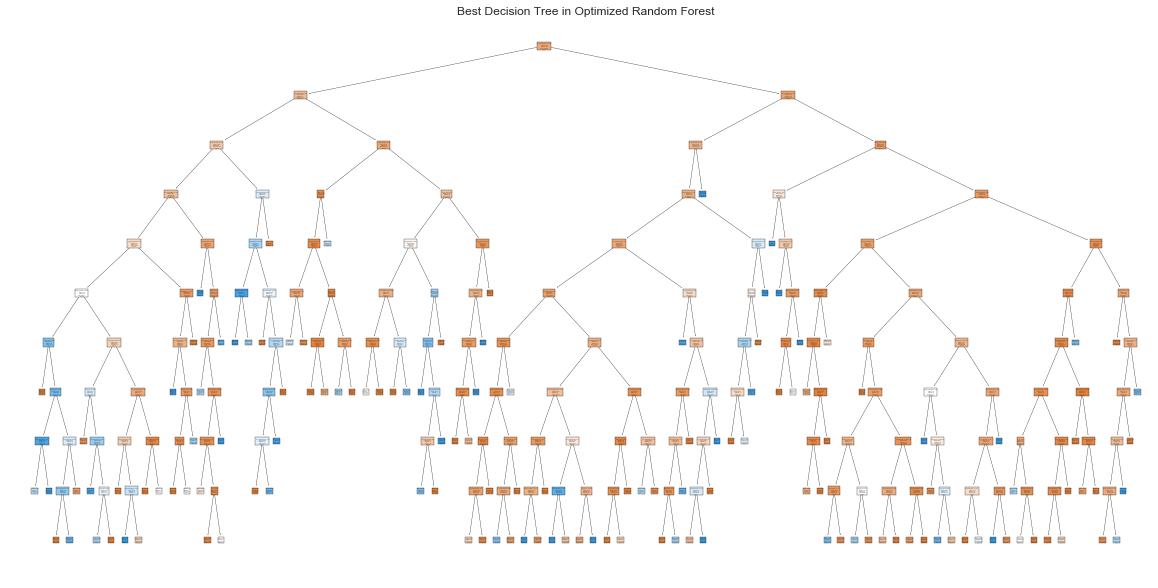

In [285]:

print("5.2.3.Random Forest Classifier with Hyperparameter Tuning")    
from sklearn.tree import plot_tree
# Visualize the best decision tree in the final Random Forest
plt.figure(figsize=(20, 10))
plot_tree(best_rfc_model.estimators_[0], feature_names=feature_names, class_names=['0', '1'], filled=True)
plt.title('Best Decision Tree in Optimized Random Forest')
plt.show()


**5.2.3. Random Forest Classifier with Hyperparameter Tuning**

**Comment

- When reviewing the most importnat features of the RFC model, makes sense that varaibles such as  5s1s_diff_lag1    and 6m1s_zscore30_lag1 are the most importtant from the iteration
- In comparison with the Decision Tree Classifier, the Random Forest classifier provides a much more healthy distribution of assinged probalibtes. 
- Thea accuiaracy overal improves however there are not many forecasted "1" signals.
- We will not use this  base learner in the final version of the  ensemble learning voting classifer model 

In [ ]:
del x_rfc_train, x_rfc_test, y_rfc_train, y_rfc_test ,rfc_model_ht,param_grid_rfc,best_rfc_model
del results_rfc_ht,best_rfc_model_ht,best_rfc_model,sfm_rfc,selected_features_rfc
del accuracy_rfc,classification_report_result_rfc,conf_matrix_rfc,fpr, tpr, thresholds 
del precision, recall,average_precision,train_sizes, train_scores, test_scores

del X_col_names,feature_names_g
del fpr,tpr, roc_auc, accuracy_rfc,y_pred_rfc,y_prob_rfc,y_pred_prob_rfc,rfc_model, selected_features_rfc
del df_rfc,x_rfc,y_rfc,x_rfc_train, x_rfc_test, y_rfc_train, y_rfc_test
del x_rfc_train, x_rfc_test, y_rfc_train, y_rfc_test ,rfc_model_ht,param_grid_rfc,best_rfc_model
del results_rfc_ht,best_rfc_model_ht,best_rfc_model,sfm_rfc,selected_features_rfc
del accuracy_rfc,classification_report_result_rfc,conf_matrix_rfc,fpr, tpr, thresholds 
del precision, recall,average_precision,train_sizes, train_scores, test_scores


**Anlysis of  Random Forest Classifier with Hyperparameter Tuning**

   - [Top](#table_contents)   
   
### 5.2.4. ExtraTrees  (Extremely Randomized Trees)
 
 **ExtraTrees** Extra Tree Classifier (Extremely Randomized Trees) is an ensemble ML approach that trains numerous decision trees and aggregates the results from the group of decision trees to output a prediction. However, there are few differences between Extra Trees and Random Forest.
  
 - Aggregates the results of multiple de-correlated decision trees collected in a "forest" to output it's classification result.
- the decision boundaries are determined using random thresholds for each feature at each split, making the trees "extra" randomized
 - Using the entire dataset (which is the default setting and can be changed) allows ExtraTrees to reduce the bias of the model. the sampling for each tree is random, without replacement.(unique sampleS)
  - ExtraTrees have higher bias and lower variance than Random Forest. 
  
-------

# Extra Trees Classifier Optimization Problem for Binary Classification

In the Extra Trees classifier, the optimization problem involves building an ensemble of extremely randomized decision trees to collectively make accurate predictions. The optimization process includes defining decision variables, an objective function, and constraints.

------


## Decision Variables:

Let \( n \) be the number of samples, \( m \) be the number of potential decision rules for each tree, and \( T \) be the total number of trees in the ensemble. For each sample \( i \), each decision rule \( d \), and each tree \( t \), introduce a binary decision variable \( z_{i,d,t} \), indicating whether sample \( i \) is assigned to decision rule \( d \) in tree \( t \). Additionally, introduce binary decision variables \( w_t \) to represent whether a tree is selected.

$$[z_{i,d,t} \in \{0, 1\}, \quad w_t \in \{0, 1\}]$$
-----


## Objective Function:

The objective function aims to minimize a combination of misclassification loss and a regularization term across all trees. Let \( L \) be the misclassification loss function, \( \lambda \) be the regularization parameter, and \( \text{complexity}(d) \) denote the complexity of decision rule \( d \).

$$[\text{Minimize: } \quad \sum_{t=1}^{T} \left( \sum_{i} \sum_{d} L(y_i, \hat{y}_{i,d,t}) \cdot z_{i,d,t} + \lambda \sum_{d} \text{complexity}(d) \cdot w_t \right)]$$

Here, \( y_i \) is the true label for sample \( i \), and \( \hat{y}_{i,d,t} \) is the predicted label based on decision rule \( d \) in tree \( t \).

## Constraints:

1. **Sample Assignment Constraint:**
   - Each sample must be assigned to exactly one decision rule in each tree.

$$[\sum_{d} z_{i,d,t} = 1, \quad \forall i, \forall t]$$

2. **Decision Rule Selection Constraint:**
   - Each decision rule must be selected at most once in each tree.

$$[\sum_{i} z_{i,d,t} \leq M \cdot w_t, \quad \forall d, \forall t]$$

Here, \( M \) is a large constant.

3. **Tree Selection Constraint:**
   - At most \( B \) trees are selected from the total \( T \) trees.

$$[\sum_{t=1}^{T} w_t \leq B]$$

## Binary Constraints:

$$[z_{i,d,t} \in \{0, 1\}, \quad w_t \in \{0, 1\}]$$





#### Extra Trees Classifier <a id="et"></a>

- [Top](#table_contents)
#### 5.2.4. Extra Trees Classifier with HyperParameter Tuning <a id="et_ht"></a>

In [222]:
print("5.2.4. Extra Trees Classifier with HyperParameter Tuning")
print("Extra Trees Classifier")
print("from sklearn.ensemble import ExtraTreesClassifier")
start_time = time.time()
print("from sklearn.ensemble import ExtraTreesClassifier")
print("Creating new dataset")
df_etc=df_m000.copy()
df_etc=df_etc.tail(3100)
x_etc = df_etc[feat_list]
y_etc = df_etc[target_y]
print(x_etc.shape[0])
print(x_etc.shape[0])
print(x_etc.shape, x_etc.shape)
print("Splitting Train and Test set")
x_etc_train, x_etc_test, y_etc_train, y_etc_test = train_test_split(x_etc, y_etc, 
                                                                    test_size=test_size0,
                                                                    random_state=random_state0)

Extra Trees Classifier with HyperParameter Tuning
from sklearn.ensemble import ExtraTreesClassifier
Creating new dataset
3100
3100
(3100, 204) (3100, 204)
Splitting Train and Test set


In [223]:
print("----------------------------------------------------------------------------------------------")
print("5.2.4. Define the Model: Extra Trees Classifier model")
etc_model = ExtraTreesClassifier(random_state=random_state0)

print("Define hyperparameters for tuning")
print("Create GridsearchCV for hyperparameter tuning") 
print("Parameters list to search")
#'max_features' : ['sqrt', 'log2']
grid_params_etc = {
    'n_estimators' : [50],
    'criterion' : ['gini', 'entropy', ],
    'max_depth' : range(2,5,1),
    'min_samples_split' : range(4,8,2),
    'min_samples_leaf' : range(1,3,1),
    'max_features' : ['sqrt', ]
}
print("Specify Grid search")
print("Grid Search")
grid_search_etc = GridSearchCV(estimator=etc_model, 
                           param_grid=grid_params_etc, 
                           n_jobs=-1,
                           verbose=2, 
                           cv=3)
print("Fitting")
print("using same  dataset")
grid_search_etc.fit(x_etc_train, y_etc_train)
print("Fitting Complete")
print("best estimator after fitting")
best_etc_model = grid_search_etc.best_estimator_
print("----------------------------------------------------------------------------------------------")

print("Save the GridSearchCV results")
results_etc_ht = pd.DataFrame(grid_search_etc.cv_results_)
#print(results_logreg_ht)
results_etc_ht.to_csv('grid_search_results_etc.csv', index=True)
print("GridSearchCV results saved as 'grid_search_results_etc.csv'.")
print("Save the best model")
model_filename = 'best_etc_model.pkl'
joblib.dump(best_etc_model, model_filename)
print("Saved")
print("----------------------------------------------------------------------------------------------")
# Measure the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")

print("Extra Trees Classifier with HyperParameter Tuning")
#model_with_bst_prm_etc = ExtraTreesClassifier(criterion = 'log_loss',
#                                              max_depth = 9,
#                                              max_features = 'sqrt',
#                                              min_samples_leaf = 2,
#                                              min_samples_split = 8,
#                                              n_estimators = 10)
print("Extra Trees Classifier with HyperParameter Tuning")

----------------------------------------------------------------------------------------------
Define the Model: Extra Trees Classifier model
Define hyperparameters for tuning
Create GridsearchCV for hyperparameter tuning
Parameters list to search
Specify Grid search
Grid Search
Fitting
using same  dataset
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   23.0s finished


Fitting Complete
best estimator after fitting
----------------------------------------------------------------------------------------------
Save the GridSearchCV results
GridSearchCV results saved as 'grid_search_results_etc.csv'.
Save the best model
Saved
----------------------------------------------------------------------------------------------
Elapsed Time: 104.78 seconds
Extra Trees Classifier with HyperParameter Tuning
Extra Trees Classifier with HyperParameter Tuning


In [227]:
print("5.2.4. Extra Trees Classifier with HyperParameter Tuning")

print("Extra Trees Classifier with HyperParameter Tuning")

print("# Load the saved model")
loaded_best_etc_model = joblib.load('best_etc_model.pkl')

print("best parameters and best model-estimator")
# Show best hyperparameters and best estimator from the loaded model
best_params_etc = loaded_best_etc_model.get_params()
best_etc_model = loaded_best_dtc_model
best_etc_model_ht=best_etc_model
print("Finding the Best hyperparamters")
print("Best Hyperparameters:", best_params_etc)
print("Finding the Model")
print("Best Model:",best_etc_model)



print("----------------------------------------------------------------------------------------------")
print("Make predictions on the test set with the best model")
y_pred_proba_etc_model_ht= best_etc_model_ht.predict_proba(x_etc_test)[:, 1]
y_pred_etc_model_ht = best_etc_model_ht.predict(x_etc_test)

# Display selected features
sfm_etc = SelectFromModel(best_etc_model, threshold=0.01)
sfm_etc.fit(x_etc_train, y_etc_train)
selected_features_etc = x_etc.columns[sfm_etc.get_support()]
print("Selected Features:", selected_features_etc)


# Display selected feature names from the training set
#selected_features = x_dtc.columns[best_dtc_model.tree_.feature[best_dtc_model.tree_.feature != -2]]
#print("Selected Features from Training Set:")
#print(selected_features)
## Show the best features from the best model using feature importances
#feature_importances = loaded_dt_model.feature_importances_
#best_features = [feature for feature, importance in zip(X.columns, feature_importances) if importance > 0]
print("----------------------------------------------------------------------------------------------")

print("Evaluating the Model")
print("1-Accuracy Score analysis")
accuracy_etc =accuracy_score (y_etc_test,y_pred_etc_model_ht)
print(f'Best Model Accuracy: {accuracy_etc}')
print("Decision Tree Classifier training accuracy score is : {}%".format(round(best_etc_model.score(x_etc_train, 
                                                                                               y_etc_train)*100)))
print("Decision Tree Classifier model's accuracy score is : {}%".format(round(accuracy_score(y_etc_test,
                                                                                             y_pred_etc_model_ht)*100)))
print("----------------------------------------------------------------------------------------------")
print("2-Confusion Matrix")
conf_matrix_etc= confusion_matrix(y_etc_test,y_pred_etc_model_ht) 
true_positive = conf_matrix_etc[0][0]
false_positive = conf_matrix_etc[0][1]
false_negative = conf_matrix_etc[1][0]
true_negative = conf_matrix_etc[1][0]
print("Confusion_matrix results")
print('True Positive:',
      true_positive, 
      '\nTrue Negative:',
      true_negative, 
      '\nFalse Negative:',
      false_negative, 
      '\nFalse Positive:',
      false_positive)
print('Confusion Matrix:\n', conf_matrix_etc)
print("----------------------------------------------------------------------------------------------")
print("3-classification_report_result")
classification_report_result_etc =classification_report (y_etc_test,y_pred_etc_model_ht) 
print('Classification Report:\n', classification_report_result_etc)
print("4-ROC Curve") # 
fpr, tpr, thresholds = roc_curve(y_etc_test,y_pred_proba_etc_model_ht)
roc_auc = auc(fpr, tpr)
print("5-Precision-Recall Curve")
precision, recall, _ = precision_recall_curve(y_etc_test,y_pred_proba_etc_model_ht)
average_precision = average_precision_score(y_etc_test,y_pred_proba_etc_model_ht)
#print("6 Feature Importance")
#feature_importance = pd.Series(logreg_model.coef_[0], index=x_lr.columns).sort_values(ascending=False)
# Feature Importance
#feature_importance = pd.Series(logreg_model.coef_[0], index=X.columns).sort_values(ascending=False)
#print("Learning Curve")
#train_sizes, train_scores, test_scores = learning_curve(best_etc_model_ht, 
#                                                        x_etc,y_etc, 
#                                                        cv=5, scoring='accuracy')




print("----------------------------------------------------------------------------------------------")
print("Extra Trees Classifier with HyperParameter Tuning")

print("Extra Trees Classifier with HyperParameter Tuning")
print("Extra Trees Classifier with HyperParameter Tuning")

Extra Trees Classifier with HyperParameter Tuning
Extra Trees Classifier with HyperParameter Tuning
# Load the saved model
best parameters and best model-estimator
Finding the Best hyperparamters
Best Hyperparameters: {'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 99, 'verbose': 0, 'warm_start': False}
Finding the Model
Best Model: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       rand

Extra Trees Classifier with HyperParameter Tuning
Extra Trees Classifier with HyperParameter Tuning
Best Model Accuracy: 0.7548387096774194
Confusion Matrix:
 [[467   0]
 [152   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       467
           1       1.00      0.01      0.01       153

    accuracy                           0.75       620
   macro avg       0.88      0.50      0.44       620
weighted avg       0.82      0.75      0.65       620

----------------------------------------------------------------------------------------------
Confusion matrix
Histogram of predicted probabilities


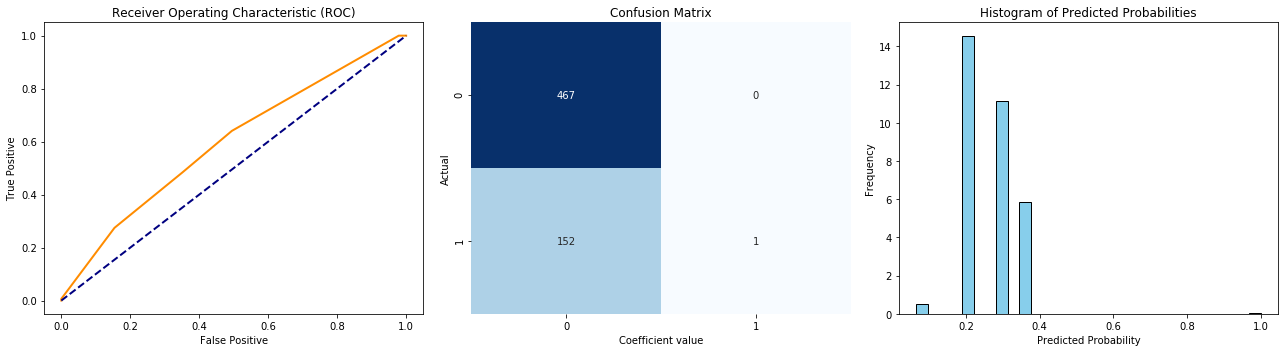

Extra Trees Classifier with HyperParameter Tuning


NameError: name 'best_etc_model' is not defined

In [229]:
print("5.2.4. Extra Trees Classifier with HyperParameter Tuning")
print("Extra Trees Classifier with HyperParameter Tuning")

print(f'Best Model Accuracy: {accuracy_etc}')
print('Confusion Matrix:\n', conf_matrix_etc)
print('Classification Report:\n', classification_report_result_etc)
print("----------------------------------------------------------------------------------------------")
#fig, axs = plt.subplots(2, 3, figsize=(18, 10))
plt.figure(figsize=(18,5,))
plt.subplot(1,3,1)
plt.plot(fpr,tpr, color= 'darkorange', lw=2, label='ROC CURVE')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristic (ROC)')
      
plt.subplot(1,3,2)       
print("Confusion matrix")
sns.heatmap(conf_matrix_etc, 
            annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Coefficient value')
plt.ylabel('Actual')          
plt.title('Confusion Matrix')
        
plt.subplot(1,3,3)
print("Histogram of predicted probabilities")
plt.hist(y_pred_proba_etc_model_ht, 
         bins=30, edgecolor='black', color='skyblue', density=True)
#sns.distplot(y_prob,bins=num_bins, kde=True)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('m_etc_ht.png')
plt.show()   

print("Extra Trees Classifier with HyperParameter Tuning")

print("Extra Trees Classifier with HyperParameter Tuning")

5.2.4.Extra Trees Classifier model ET with HyperParameter Tuning

**Comment**
- In a certain way Decision Tree (High Variance), Random Forest (Medium Variance), Extra Trees (Low Variance)
- We will use the Extra Tree Model as a base learner in the final version of the Ensemble Learning Voting Classifer Model 

In [ ]:
del train_sizes, train_scores, test_scores
del roc_auc,fpr, tpr, thresholds,classification_report_result_etc
del y_etc_test,y_pred_etc_model_ht
del best_params_etc,loaded_best_etc_model,best_etc_model_ht,
del y_pred_proba_etc_model_ht,y_pred_etc_model_ht,
del sfm_etc,selected_features_etc

   - [Top](#table_contents)   

## Bagging Classifier <a id="bag"></a>

## 5.2.5.Bagging ClassifierHyperparameter tuning <a id="bag_ht"></a>
    
***Bagging Classifier Hyerparametne Bootstrap aggregating)***

- Bagging (Bootstrap Aggregating) is an ensemble method that builds multiple models independently and combines their predictions through a voting mechanism.
- multiple base models are trained independently in parallel on different subsets of the training data. 
- Each subset is generated using bootstrap sampling, in which data points are picked at random with replacement. In the case of the Bagging classifier, the final prediction is made by aggregating the predictions of the all-base model, using majority voting. 
 -Bagging is typically used with base models that have high variance and low bias, such as decision trees.




# Bagging Classifier Optimization Problem for Binary Classification

In a Bagging classifier, the optimization problem involves building an ensemble of models, each trained on a bootstrap sample of the original dataset, to collectively make accurate predictions. The optimization process includes defining decision variables, an objective function, and constraints.

## Decision Variables:

Let \( n \) be the number of samples, \( T \) be the total number of models in the ensemble, and \( m \) be the size of each bootstrap sample. Introduce binary decision variables \( w_t \) to represent whether model \( t \) is selected.

$$[w_t \in \{0, 1\}\$$

## Objective Function:

The objective function aims to minimize the misclassification loss across all models.

$$[\text{Minimize: } \quad \sum_{t=1}^{T} \sum_{i} L(y_i, \hat{y}_{i,t}) \cdot w_t]$$

Here, \( y_i \) is the true label for sample \( i \), and \( \hat{y}_{i,t} \) is the predicted label based on model \( t \).

## Constraints:

1. **Model Selection Constraint:**
   - At most \( B \) models are selected from the total \( T \) models.

$$[\sum_{t=1}^{T} w_t \leq B]$$

## Binary Constraints:

$$[w_t \in \{0, 1\}]$$

These binary constraints ensure that the decision variables are either 0 or 1.




In [215]:
 print("  5.2.5. Bagging Classifier Hyperparameter tuning ") 
print("from sklearn.ensemble import BaggingClassifier")
 print("  Bagging Classifier") 
print("from sklearn.ensemble import BaggingClassifier")
start_time = time.time()
 

print("-----------------------------------------------------------------------------------------------")
print("Creating new dataset")
df_bag=df_m000.copy()
df_bag=df_bag.tail(3100)
x_bag = df_bag[feat_list]
y_bag = df_bag[target_y]
print(x_bag.shape[0])
print(x_bag.shape[0])
print(x_bag.shape, x_bag.shape)
print("Splitting Train and Test set")
x_bag_train, x_bag_test, y_bag_train, y_bag_test = train_test_split(x_bag, y_bag, 
                                                                    test_size=test_size0,
                                                                    random_state=random_state0)

  Bagging Classifier Hyperparameter tuning 
from sklearn.ensemble import BaggingClassifier
  Bagging Classifier
from sklearn.ensemble import BaggingClassifier
-----------------------------------------------------------------------------------------------
Creating new dataset
3100
3100
(3100, 204) (3100, 204)
Splitting Train and Test set


In [217]:
print("5.2.5.Define the Model:Bagging Classifier model")
bag_classifier_model_ht = BaggingClassifier(random_state=random_state0)
#bagg_cls = BaggingClassifier() 
print("-----------------------------------------------------------------------------------------------")
print("Define hyperparameters for tuning")
print("Create GridsearchCV for hyperparameter tuning") 
print("Parameters list to search")
print("Bagging Classifier with Hyperparameter Tuning")

params_grid_bag = {'n_estimators' : [5, 10, ],
        'max_samples' : range(2, 10, 2),
        'max_features' : range(2, 8, 3)
        }


print("Specify Grid search")
print("Grid Search")
#scoring='accuracy'
grid_search_bag = GridSearchCV(estimator= bag_classifier_model_ht, 
                               param_grid=params_grid_bag, 
                               verbose=2, 
                               n_jobs=-1, 
                               cv=3, )


print("Fitting")
print("using same  dataset")
grid_search_bag.fit(x_bag_train, y_bag_train)
print("Fitting Complete")
print("best estimator after fitting")
best_bag_model = grid_search_bag.best_estimator_

print("-----------------------------------------------------------------------------------------------")

print("Save the GridSearchCV results")
results_bag_ht = pd.DataFrame(grid_search_bag.cv_results_)
#print(results_logreg_ht)
results_bag_ht.to_csv('grid_search_results_bag.csv', index=True)
print("GridSearchCV results saved as 'grid_search_results_bag.csv'.")
print("Save the best model")
model_filename = 'best_bag_model.pkl'
joblib.dump(best_bag_model, model_filename)
print("Saved")

print("-----------------------------------------------------------------------------------------------")
# Measure the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("  Bagging Classifier Hyperparameter tuning ")

Define the Model:Bagging Classifier model
-----------------------------------------------------------------------------------------------
Define hyperparameters for tuning
Create GridsearchCV for hyperparameter tuning
Parameters list to search
Bagging Classifier with Hyperparameter Tuning
Specify Grid search
Grid Search
Fitting
using same  dataset
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.1s


Fitting Complete
best estimator after fitting
-----------------------------------------------------------------------------------------------
Save the GridSearchCV results
GridSearchCV results saved as 'grid_search_results_bag.csv'.
Save the best model
Saved
-----------------------------------------------------------------------------------------------
Elapsed Time: 67.12 seconds
  Bagging Classifier Hyperparameter tuning 


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   15.6s finished


In [218]:
print("5.2.5.Bagging Classifier with Hyperparameter Tuning")
print("Bagging Classifier with Hyperparameter Tuning")
print("Loading Model")
loaded_best_bag_model = joblib.load('best_bag_model.pkl')
print("-----------------------------------------------------------------------------------------------")
print("best parameters and best model-estimator")
# Show best hyperparameters and best estimator from the loaded model
best_params_bag = loaded_best_bag_model.get_params()
best_bag_model = loaded_best_bag_model
best_bag_model_ht=best_bag_model
print("Finding the Best hyperparamters")
print("Best Hyperparameters:", best_params_bag)
print("Finding the Model")
print("Best Model:",best_bag_model)

print("-----------------------------------------------------------------------------------------------")

print("Make predictions on the test set with the best model")
y_pred_proba_bag_model_ht= best_bag_model_ht.predict_proba(x_bag_test)[:, 1]
y_pred_bag_model_ht = best_bag_model_ht.predict(x_bag_test)

# Display selected features
#sfm_bag = SelectFromModel(best_bag_model, threshold=0.01)
#sfm_bag.fit(x_bag_train, y_bag_train)
#selected_features_bag = x_bag.columns[sfm_bag.get_support()]
#print("Selected Features:", selected_features_bag)


# Display selected feature names from the training set
#selected_features = x_dtc.columns[best_dtc_model.tree_.feature[best_dtc_model.tree_.feature != -2]]
#print("Selected Features from Training Set:")
#print(selected_features)
## Show the best features from the best model using feature importances
#feature_importances = loaded_dt_model.feature_importances_
#best_features = [feature for feature, importance in zip(X.columns, feature_importances) if importance > 0]


print("Evaluating the Model")
print("1-Accuracy Score analysis")
accuracy_bag =accuracy_score (y_bag_test,y_pred_bag_model_ht)
print(f'Best Model Accuracy: {accuracy_bag}')
print("Decision Tree Classifier training accuracy score is : {}%".format(round(best_bag_model.score(x_bag_train, 
                                                                                               y_bag_train)*100)))
print("Decision Tree Classifier model's accuracy score is : {}%".format(round(accuracy_score(y_bag_test,
                                                                                             y_pred_bag_model_ht)*100)))
print("-----------------------------------------------------------------------------------------------")
print("2-Confusion Matrix")
conf_matrix_bag= confusion_matrix(y_bag_test,y_pred_bag_model_ht) 
true_positive = conf_matrix_bag[0][0]
false_positive = conf_matrix_bag[0][1]
false_negative = conf_matrix_bag[1][0]
true_negative = conf_matrix_bag[1][0]
print("Confusion_matrix results")
print('True Positive:',
      true_positive, 
      '\nTrue Negative:',
      true_negative, 
      '\nFalse Negative:',
      false_negative, 
      '\nFalse Positive:',
      false_positive)
print('Confusion Matrix:\n', conf_matrix_bag)
print("-----------------------------------------------------------------------------------------------")
print("3-classification_report_result")
classification_report_result_bag =classification_report (y_bag_test,y_pred_bag_model_ht) 
print('Classification Report:\n', classification_report_result_bag)
print("-----------------------------------------------------------------------------------------------")
print("4-ROC Curve") # 
fpr, tpr, thresholds = roc_curve(y_bag_test,y_pred_proba_bag_model_ht)
roc_auc = auc(fpr, tpr)
print("5-Precision-Recall Curve")
precision, recall, _ = precision_recall_curve(y_bag_test,y_pred_proba_bag_model_ht)
average_precision = average_precision_score(y_bag_test,y_pred_proba_bag_model_ht)
#print("6 Feature Importance")
##feature_importance = pd.Series(logreg_model.coef_[0], index=x_lr.columns).sort_values(ascending=False)
## Feature Importance
##feature_importance = pd.Series(logreg_model.coef_[0], index=X.columns).sort_values(ascending=False)
#print("Learning Curve")
#train_sizes, train_scores, test_scores = learning_curve(best_bag_model_ht, 
#                                                        x_bag,y_bag, 
#                                                        cv=5, scoring='accuracy')





#print("Bagging Classifier with best parameter training accuracy score is : {}%".format(
#    round(model_with_best_params_bc.score(X_train, y_train)*100, 2)))
#print("Bagging Classifier with best parameter model's accuracy score is : {}%".format(
#    round(accuracy_score(y_test, y_pred_bst_est_bc)*100, 2)))##

#print("Bagging Classifier model with best parameter training training roc-auc score is : {}%".
#      format(round(roc_auc_score(y_train, y_train_predict_bc_bst_prm[:,1])*100)))

#print("Bagging Classifier model with best parameter training roc-auc accuracy score is : {}%".
#      format(round(roc_auc_score(y_test, y_test_predict_roc_bc_bst_prm[:,1])*100)))


print("Bagging Classifier with Hyperparameter Tuning")    


Bagging Classifier with Hyperparameter Tuning
Bagging Classifier with Hyperparameter Tuning
Loading Model
-----------------------------------------------------------------------------------------------
best parameters and best model-estimator
Finding the Best hyperparamters
Best Hyperparameters: {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 2, 'max_samples': 2, 'n_estimators': 5, 'n_jobs': None, 'oob_score': False, 'random_state': 99, 'verbose': 0, 'warm_start': False}
Finding the Model
Best Model: BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=2, max_samples=2, n_estimators=5, n_jobs=None,
                  oob_score=False, random_state=99, verbose=0,
                  warm_start=False)
-----------------------------------------------------------------------------------------------
Make predictions on the test set with the best model
Evaluating the Model
1-Accuracy Score analysis

Bagging Classifier with Hyperparameter Tuning
Best Model Accuracy: 0.7532258064516129
Confusion Matrix:
 [[467   0]
 [153   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       467
           1       0.00      0.00      0.00       153

    accuracy                           0.75       620
   macro avg       0.38      0.50      0.43       620
weighted avg       0.57      0.75      0.65       620

------------------------------------------------------------------------------
Confusion matrix
Histogram of predicted probabilities


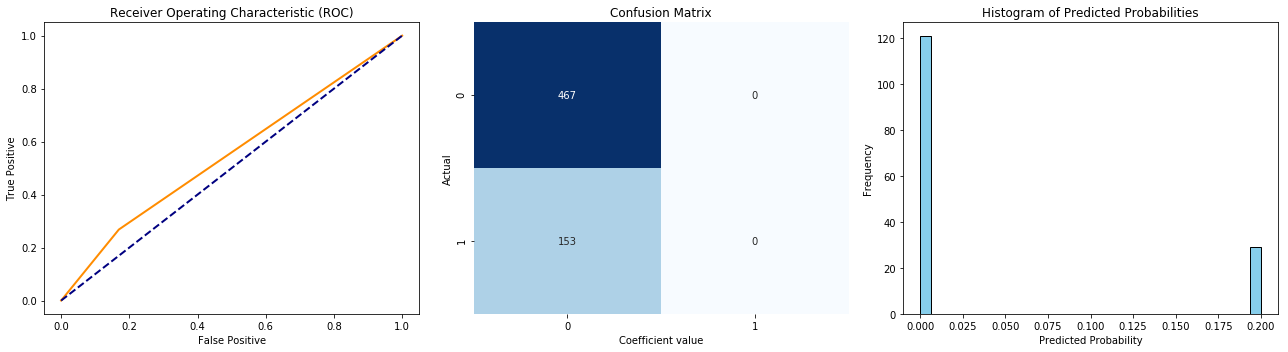

Bagging Classifier with Hyperparameter Tuning


In [219]:
print("5.2.5.Bagging Classifier with Hyperparameter Tuning")
print(f'Best Model Accuracy: {accuracy_bag}')
print('Confusion Matrix:\n', conf_matrix_bag)
print('Classification Report:\n', classification_report_result_bag)

print("------------------------------------------------------------------------------")
#fig, axs = plt.subplots(2, 3, figsize=(18, 10))


plt.figure(figsize=(18,5,))
plt.subplot(1,3,1)
plt.plot(fpr,tpr, color= 'darkorange', lw=2, label='ROC CURVE')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristic (ROC)')
      
plt.subplot(1,3,2)       
print("Confusion matrix")
sns.heatmap(conf_matrix_bag, 
            annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Coefficient value')
plt.ylabel('Actual')          
plt.title('Confusion Matrix')
        
plt.subplot(1,3,3)
print("Histogram of predicted probabilities")
plt.hist(y_pred_proba_bag_model_ht, 
         bins=30, edgecolor='black', color='skyblue', density=True)
#sns.distplot(y_prob,bins=num_bins, kde=True)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('m_bag_ht.png')
plt.show()   

print("Bagging Classifier with Hyperparameter Tuning")

    

In [220]:

print("5.2.5. Bagging Classifier with Hyperparameter Tuning")

Bagging Classifier with Hyperparameter Tuning


5.2.5. Bagging Classifier with Hyperparameter Tuning

**Comment: **
- The bagging classifier runs a complex proces but the resutls are underwheliming since it cannot predict accurately for this datatest
- In the distribution histogram there are only 2 options 0 or 20%
- We will not use the bagging classifier in the final version of the ensemble learning voting classifier model 



In [ ]:

print("Bagging Classifier with Hyperparameter Tuning")
del y_pred_proba_bag_model_ht,conf_matrix_bag,
del selected_features_bag,sfm_bag,best_bag_model,best_bag_model_ht,best_params_bag,loaded_best_bag_model
del results_bag_ht,best_bag_model, grid_search_bag, grid_params_bag, bag_model
del x_bag_train, x_bag_test, y_bag_train, y_bag_test
del df_bag , y_bag,x_bag

print("Bagging Classifier with Hyperparameter Tuning")

- [Top](#table_contents)
### 5.2.6.Support Vector Classifier with Hyperparameter tuning <a id="svc_ht"></a>



------
Lets do first a quick overview of  **SVM models**:

####***Support Vector Machines (SVM)****
A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. - **Support Vector Machine (SVM) models** are tools for classification and regression tasks. A SVM model aims to find the optimal hyperplane that separates data points of different classes while maximizing the margin, which is the distance between the hyperplane and the nearest support vectors. SVM models can be fine-tuned using regularization parameters to control the trade-off between model complexity and generalization performance.

-------
- The main parameters are:
    - **Regularization C  (Cost Parameter)**: primary regularization parameter that controls the trade-off between achieving a low training error and a low testing error.ontrols the trade-off between maximizing the margin (minimizing the classification error by allowing margin violations) and minimizing the classification error on the training data. 
    
  The standard soft-margin SVM optimization problem can be written as follows:

    - Minimize:
    $$ 1/2 * ||w||^2 + C * Σξ $$

    - Subject to:
$$ yᵢ(wᵀxᵢ + b) ≥ 1 - ξᵢ,$$ 
$$ξᵢ ≥ 0,$$ 

   - In this formulation, C appears as a multiplier on the summation term (Σξ), representing the total margin violations. The optimization aims to minimize the magnitude of the weight vector (w) while controlling the influence of the cost parameter C on the margin violations (ξᵢ).**Small C paramter (C < 1): allows for more margin violations (misclassifications) and leads to a simpler model with higher bias and lower variance** **Large C paramter(C > 1): penalizes margin violations more heavily and results in a more complex model with lower bias but potentially higher variance.**
   
    - **Regularization Gamma paramter (γ)**: The gamma parameter defines how far the influence of a single training example reaches. It affects the shape of the decision boundary and can be considered a regularization parameter for models using the radial basis function (RBF) kernel.

-------

### Support Vector Classification (SVC)
- **Support Vector Classification (SVC)** belongs to the family of Support Vector Machines (SVM). 
- The goal of SVC is to find a hyperplane in an N-dimensional space (where N is the number of features) that distinctly classifies the data points into different classes.

**Optimization Objective:**
- SVC aims to find the hyperplane that maximizes the margin between different classes while minimizing the classification error.The objective is to maximize the margin while ensuring that all data points are correctly classified. 

 


In [211]:
print("5.2.6.Support Vector classifier with Hyperparameter Tuning")
start_time = time.time()

print("Creating new dataset")
df_svc=df_m000.copy()
df_svc=df_svc.tail(3100)
x_svc = df_svc[feat_list]
print(x_svc.shape[0])
y_svc= df_svc[target_y]
print(y_svc.shape[0])
print(x_svc.shape, y_svc.shape)
print("Splitting Train and Test set")
print("Splitting")
x_svc_train, x_svc_test, y_svc_train, y_svc_test = train_test_split(x_svc,y_svc,
                                                                    test_size=test_size0,
                                                                    random_state=random_state0)

Support Vector classifier with Hyperparameter Tuning
Creating new dataset
3100
3100
(3100, 204) (3100, 1)
Splitting Train and Test set
Splitting


In [212]:
print("-------------------------------------------------------------------------")
print("5.2.6.Define the Support Vector Machine classifier")
print("Incorporate probability=True")
svc_classifier = SVC(probability=True,random_state=random_state0,)

print("Define hyperparameters for tuning")
print("Create GridsearchCV for hyperparameter tuning") 
print("Parameters list to search")
#ernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
#'kernel': ['linear', 'rbf', 'poly'],
#'gamma': ['scale', 'auto']
#probabilitybool, default=False
#probabilitybool=False,
# shrinkingbool=True,
# class_weight=None,
# verbosebool=False
# Hyperparameter tuning using GridSearchCV
param_grid_svc = {
    'C': [0.1, 1, 10,],
    'kernel': ['rbf',],
    'gamma': ['scale','auto']

}
print("Specify Grid search")
print("Grid Search")
#grid_search_svc = GridSearchCV(svc_classifier, param_grid=param_grid_svc, cv=3, scoring='accuracy')
# Perform GridSearchCV for hyperparameter tuning
grid_search_svc = GridSearchCV(svc_classifier,
                               param_grid=param_grid_svc,
                               n_jobs=-1,
                               cv=4,
                               verbose=2, 
                               scoring='accuracy',)
print("Fitting")
print("using same  dataset")
grid_search_svc.fit(x_svc_train, y_svc_train,)
print("best estimator")
best_svc_model = grid_search_svc.best_estimator_
print("Fitting Complete")
print("-------------------------------------------------------------------------")

print("Save the GridSearchCV results")
results_svc = pd.DataFrame(grid_search_svc.cv_results_)

print(results_svc)
results_svc.to_csv('grid_search_results_svc.csv', index=True)
print("GridSearchCV results saved as 'grid_search_results.csv'.")
print("Save the best model")
model_filename = 'best_svc_model.pkl'
joblib.dump(best_svc_model, model_filename)
print("Saved")

print("Display the best hyperparameters")
best_params_svc = grid_search_svc.best_params_
print("Best Hyperparameters:", best_params_svc)
print("Finding the best parameters")
print("Get the best estimator")
best_svc_classifier = grid_search_svc.best_estimator_
best_svc_model = grid_search_svc.best_estimator_
print("-------------------------------------------------------------------------")
# Measure the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("Support Vector Machine classifier with Hyper paramer Tuning")
print("Support Vector classifier with Hyperparameter Tuning")

-------------------------------------------------------------------------
Define the Support Vector Machine classifier
Incorporate probability=True
Define hyperparameters for tuning
Create GridsearchCV for hyperparameter tuning
Parameters list to search
Specify Grid search
Grid Search
Fitting
using same  dataset
Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:  1.6min remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.6min finished


best estimator
Fitting Complete
-------------------------------------------------------------------------
Save the GridSearchCV results
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      12.751391      1.030982         0.676587        0.080599     0.1   
1      31.673549      2.968332         1.424922        0.667966     0.1   
2      15.887179      1.482725         0.983198        0.180843       1   
3      32.547090      3.029135         1.160806        0.082671       1   
4      15.339366      2.139655         1.001753        0.077214      10   
5      25.469661      1.701843         1.055718        0.143919      10   

  param_gamma param_kernel                                         params  \
0       scale          rbf  {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}   
1        auto          rbf   {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}   
2       scale          rbf    {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}   
3        auto          rbf    

In [213]:
print("5.2.6.Support Vector Machine classifier with Hyper paramer Tuning")
print("-------------------------------------------------------------------------")
start_time = time.time()
# Load the previously saved model
print("# Load the saved model")
loaded_best_svc_model = joblib.load('best_svc_model.pkl')

print("best parameters and best model-estimator")
# Show best hyperparameters and best estimator from the loaded model
best_params_svc = loaded_best_svc_model.get_params()
best_svc_model = loaded_best_svc_model
best_svc_model_ht=best_svc_model
print("Finding the Best hyperparamters")
print("Best Hyperparameters:", best_params_svc)
print("Finding the Model")
print("Best Model:",best_svc_model)
#svc_classifier_ht=SVC (** best_params_svc)
#svc_classifier_ht.fit(x_svc_train,y_svc_train)


print("Make predictions on the test set with the best model")
y_pred_proba_svc_model_ht= best_svc_model_ht.predict_proba(x_svc_test)[:, 1]
y_pred_svc_model_ht = best_svc_model_ht.predict(x_svc_test)

## Display selected features
#sfm_etc = SelectFromModel(best_etc_model, threshold=0.01)
#sfm_etc.fit(x_dtc_train, y_etc_train)
#selected_features_etc = x_etc.columns[sfm_etc.get_support()]
#print("Selected Features:", selected_features_etc)

## Get the support vectors and their indices
#support_vectors = svc_classifier_ht.support_vectors_
#support_vector_indices = svc_classifier_ht.support_
#print(support_vector_indices)



# Display selected feature names from the training set
#selected_features = x_dtc.columns[best_dtc_model.tree_.feature[best_dtc_model.tree_.feature != -2]]
#print("Selected Features from Training Set:")
#print(selected_features)
## Show the best features from the best model using feature importances
#feature_importances = loaded_dt_model.feature_importances_
#best_features = [feature for feature, importance in zip(X.columns, feature_importances) if importance > 0]

print("-------------------------------------------------------------------------")
print("Evaluating the Model")
print("1-Accuracy Score analysis")
accuracy_svc =accuracy_score (y_svc_test,y_pred_svc_model_ht)
print(f'Best Model Accuracy: {accuracy_svc}')
print("Decision Tree Classifier training accuracy score is : {}%".format(round(best_svc_model.score(x_svc_train, 
                                                                                               y_svc_train)*100)))
print("Decision Tree Classifier model's accuracy score is : {}%".format(round(accuracy_score(y_svc_test,
                                                                                             y_pred_svc_model_ht)*100)))
print("-------------------------------------------------------------------------")
print("2-Confusion Matrix")
conf_matrix_svc= confusion_matrix(y_svc_test,y_pred_svc_model_ht) 
true_positive = conf_matrix_svc[0][0]
false_positive = conf_matrix_svc[0][1]
false_negative = conf_matrix_svc[1][0]
true_negative = conf_matrix_svc[1][0]
print("Confusion_matrix results")
print('True Positive:',
      true_positive, 
      '\nTrue Negative:',
      true_negative, 
      '\nFalse Negative:',
      false_negative, 
      '\nFalse Positive:',
      false_positive)
print('Confusion Matrix:\n', conf_matrix_svc)
print("-------------------------------------------------------------------------")
print("3-classification_report_result")
classification_report_result_svc =classification_report (y_svc_test,y_pred_svc_model_ht) 
print('Classification Report:\n', classification_report_result_svc)
print("-------------------------------------------------------------------------")
print("4-ROC Curve") # 
fpr, tpr, thresholds = roc_curve(y_svc_test,y_pred_proba_svc_model_ht)
roc_auc = auc(fpr, tpr)
print("5-Precision-Recall Curve")
precision, recall, _ = precision_recall_curve(y_svc_test,y_pred_proba_svc_model_ht)
average_precision = average_precision_score(y_svc_test,y_pred_proba_svc_model_ht)
print("6 Feature Importance")
#feature_importance = pd.Series(logreg_model.coef_[0], index=x_lr.columns).sort_values(ascending=False)
# Feature Importance
#feature_importance = pd.Series(logreg_model.coef_[0], index=X.columns).sort_values(ascending=False)
#print("Learning Curve")
#train_sizes, train_scores, test_scores = learning_curve(best_svc_model_ht, 
#                                                        x_svc,y_svc, 
#                                                        cv=5, scoring='accuracy')#
#

print("---------------------------------------------------------------------------------------------")
# Measure the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")

#del train_sizes, train_scores, test_scores
#del roc_auc,fpr, tpr, thresholds,classification_report_result_etc
#del y_etc_test,y_pred_etc_model_ht

Support Vector Machine classifier with Hyper paramer Tuning
-------------------------------------------------------------------------
# Load the saved model
best parameters and best model-estimator
Finding the Best hyperparamters
Best Hyperparameters: {'C': 0.1, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 99, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Finding the Model
Best Model: SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=99, shrinking=True, tol=0.001,
    verbose=False)
Make predictions on the test set with the best model
-------------------------------------------------------------------------
Evaluating the Model
1-Accuracy Score analysis
Best Model Accuracy: 0.7532258064516129
Decision Tree Class

Support Vector Machine classifier with Hyper paramer Tuning
Support Vector Machine classifier with Hyper paramer Tuning
Best Model Accuracy: 0.7532258064516129
Confusion Matrix:
 [[467   0]
 [153   0]]
------------------------------------------------------------------------------------------------
Confusion matrix
Histogram of predicted probabilities


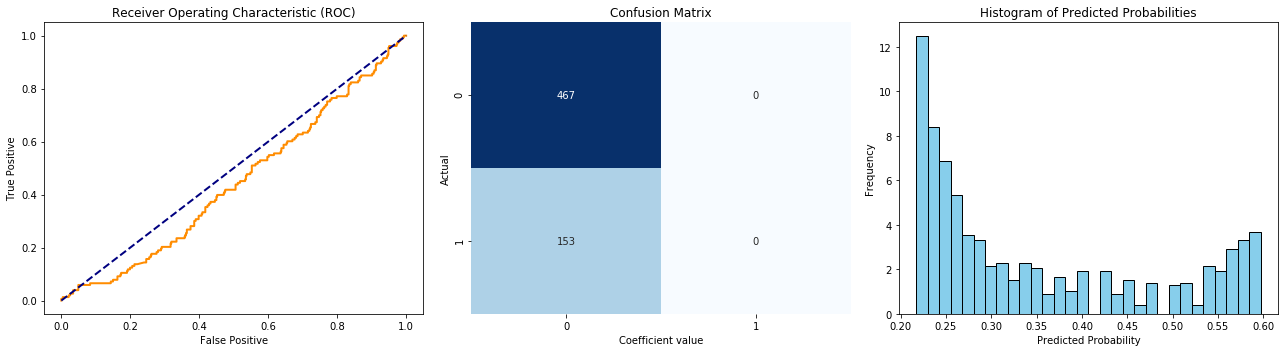

Support Vector Machine classifier with Hyper paramer Tuning


In [214]:
print("5.2.6.Support Vector Machine classifier with Hyper paramer Tuning")
#[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
#[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 18.9min finished
#Elapsed Time: 1546.30 seconds
#fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Visualize the accuracy results
#results_df = pd.DataFrame(grid_search_svc.cv_results_)
#results_pivot = results_df.pivot_table(index='param_C', columns='param_gamma', values='mean_test_score')
## Get the support vectors and their indices
#support_vectors = svc_classifier_ht.support_vectors_
#support_vector_indices = svc_classifier_ht.support_

# Visualize influential variables using a heatmap
# Extract the influential variables based on the support vectors
#influential_variables = pd.DataFrame(data=support_vectors, 
#                                     columns=[f'Feature_{i}' for i in range(support_vectors.shape[1])])
print("Support Vector Machine classifier with Hyper paramer Tuning")

print(f'Best Model Accuracy: {accuracy_svc}')
print('Confusion Matrix:\n', conf_matrix_svc)

print("------------------------------------------------------------------------------------------------")
#fig, axs = plt.subplots(2, 3, figsize=(18, 10))
plt.figure(figsize=(18,5,))
plt.subplot(1,3,1)
plt.plot(fpr,tpr, color= 'darkorange', lw=2, label='ROC CURVE')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristic (ROC)')
      
plt.subplot(1,3,2)       
print("Confusion matrix")
sns.heatmap(conf_matrix_svc, 
            annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Coefficient value')
plt.ylabel('Actual')          
plt.title('Confusion Matrix')
        
plt.subplot(1,3,3)
print("Histogram of predicted probabilities")
plt.hist(y_pred_proba_svc_model_ht, 
         bins=30, edgecolor='black', color='skyblue', density=True)
#sns.distplot(y_prob,bins=num_bins, kde=True)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('m_svc_ht.png')
plt.show()   
print("Support Vector Machine classifier with Hyper paramer Tuning")




# Extract the influential variables based on the support vectors
#influential_variables = pd.DataFrame(data=support_vectors, columns=iris.feature_names)
# Using only first two features for visualization
#X_subset = X[:, :2]
#best_svc_classifier.fit(X_subset, y)  # Re-fitting on the whole dataset for visualization
#plt.figure(figsize=(10, 6))
#plot_decision_function(X_subset, y, best_svc_classifier, "SVC Decision Boundary")
#plt.subplot(1,3,3) 
#print("Support Vector Index")
#sns.heatmap(influential_variables, cmap='viridis', annot=True, cbar_kws={'label': 'Feature Value'})
#plt.title('Influential Variables (Support Vectors)')
#plt.xlabel('Feature')
#p#lt.ylabel('Support Vector Index')


#plt.tight_layout()
#plt.show()  

5.2.6.Support Vector Machine classifier with Hyper paramer Tuning


***Comment**:
- The support Vector Classfier provides a much more rich distributioon of probablites in the hsitorigram. 
- However in the confusion matrix there are no signal for the activation of the target varaible
- We will not use the support vector classifier in the final version of the ensemble learning  voting classifier model.

5.2.6.Support Vector Machine classifier with Hyper paramer Tuning

In [ ]:
print("5.2.6. Support Vector Machine classifier with Hyper paramer Tuning")
del svc_classifier,svc_classifier_ht ,y_prob_svc, y_pred_svc ,accuracy_svc
del end_time, start_time,elapsed_time
del y_pred_proba_etc_model_ht,conf_matrix_etc,
del selected_features_etc,sfm_etc,best_etc_model,best_etc_model_ht,best_params_etc,loaded_best_etc_model
del results_etc_ht,best_etc_model, grid_search_etc, grid_params_etc, etc_model
del x_etc_train, x_etc_test, y_etc_train, y_etc_test
del df_etc , y_etc,x_etc

print("Support Vector Machine classifier with Hyper paramer Tuning")

- [Top](#table_contents)
-------

### 5.2.7. XGBClassifier (XGBoost) <a id="xgbc_ht"></a>

- ***XGBoost (eXtreme Gradient Boosting)*** is an ensemble learning algorithm based on gradient boosting frameworks.
- It builds a series of weak learners (decision trees) and combines their predictions to create a strong predictive model. 
- The "gradient boosting" part refers to the technique of combining weak learners sequentially, with each new learner correcting the errors made by the existing ensemble.
- **Key Features of XGBoost:**
    
    - (1) **Regularization:** XGBoost includes L1 (Lasso) and L2 (Ridge) regularization terms to prevent overfitting.
    - (2) **Tree Pruning:** XGBoost prunes trees during the building process to remove branches that contribute little to overall accuracy. 
    - (3) **Cross-Validation:** XGBoost supports built-in cross-validation capabilities, allowing for model evaluation during the training process. This helps to identify the optimal number of boosting rounds and avoid overfitting.

-------

# XGBoost (XGBClassifier) Optimization Problem for Binary Classification

In the XGBoost classifier, the optimization problem involves building an ensemble of decision trees in a gradient boosting framework to collectively make accurate predictions. The optimization process includes defining decision variables, an objective function, and constraints.

-------

## Decision Variables:

Let \( n \) be the number of samples and \( T \) be the total number of trees in the ensemble. For each sample \( i \) and each tree \( t \), introduce decision variables \( \gamma_{i,t} \), \( h_{i,t}(\mathbf{x}) \), and \( w_t \).

$$[\gamma_{i,t}, w_t \in \{0, 1\}, \quad h_{i,t}(\mathbf{x}) \in \mathbb{R}]$$

Here, \( \gamma_{i,t} \) is a binary variable indicating whether sample \( i \) is assigned to tree \( t \), \( w_t \) is a binary variable indicating whether tree \( t \) is selected, and \( h_{i,t}(\mathbf{x}) \) is the prediction for sample \( i \) from tree \( t \).

-------
## Objective Function:

The objective function aims to minimize a combination of misclassification loss and a regularization term.
$$[\text{Minimize: } \quad \sum_{i} \left[ L(y_i, \hat{y}_i) + \sum_{t=1}^{T} \lambda \cdot w_t + \alpha \cdot \left(\sum_{t=1}^{T} \gamma_{i,t} - 1\right)\right]]$$

Here, \( y_i \) is the true label for sample \( i \), \( \hat{y}_i \) is the predicted label based on the ensemble, \( \lambda \) and \( \alpha \) are regularization parameters.

-------

## Constraints:

(1.) **Sample Assignment Constraint:**
   - Each sample must be assigned to exactly one tree.

$$[\sum_{t=1}^{T} \gamma_{i,t} = 1, \quad \forall i]$$

(2.) **Tree Selection Constraint:**
   - At most \( B \) trees are selected from the total \( T \) trees.

$$[\sum_{t=1}^{T} w_t \leq B]$$

## Binary Constraints:
$$[\gamma_{i,t}, w_t \in \{0, 1\}]$$

These binary constraints ensure that the decision variables are either 0 or 1.



In [ ]:
print("5.2.7.XGBClassifier (XGBoost)")
print("from xgboost import XGBClassifier")
print("---------------------------------------------------------------------------------------------------")
from xgboost import XGBClassifier
print("XGBClassifier (XGBoost)")
print("from xgboost import XGBClassifier")
from xgboost import XGBClassifier
start_time = time.time()
print("Creating new dataset")
df_xgbc=df_m000.copy()
df_xgbc=df_xgbc.tail(3100)
x_xgbc = df_xgbc[feat_list]
y_xgbc = df_xgbc[target_y]
print(x_xgbc.shape, y_xgbc.shape)
print("Splitting Train and Test set")
print("Splitting")
x_xgbc_train, x_xgbc_test, y_xgbc_train, y_xgbc_test = train_test_split(x_xgbc,y_xgbc,
                                                                    test_size=test_size0,
                                                                    random_state=random_state0)

In [ ]:
print("---------------------------------------------------------------------------------------------------")
print("5.2.7.Define the XGBClassifier")
xgbc_model=XGBClassifier(random_state=random_state0,)   

print("Define hyperparameters for tuning")
print("Create GridsearchCV for hyperparameter tuning") 
print("Parameters list to search")
print("Define hyperparameters to tune and their possible values") 
#    'learning_rate': [0.01, 0.1, 0.2],
#    'max_depth': [3, 5, 7],
#    'n_estimators': [50, 100, 200],
#    'subsample': [0.8, 1.0],
#    'colsample_bytree': [0.8, 1.0]
                                        
param_grid_xgbc = {'learning_rate':[0.1,0.01,],
              'max_depth':[5,10],
              'n_estimators':[500,1000],}
print("Specify Grid search")
print("Grid Search")

grid_search_xgbc = GridSearchCV(estimator=xgbc_model,
                           param_grid=param_grid_xgbc,
                           scoring='accuracy',
                                cv=3,  
                                verbose=2)

print("Fitting")
print("using same  dataset")
grid_search_xgbc.fit(x_xgbc_train,y_xgbc_train)
best_xgbc_model = grid_search_xgbc.best_estimator_
print("Fitting Complete")
print("---------------------------------------------------------------------------------------------------")


print("Save the GridSearchCV results")
results_xgbc = pd.DataFrame(grid_search_xgbc.cv_results_)
print(results_xgbc)
results_xgbc.to_csv('grid_search_results_xgbc.csv', index=True)
print("GridSearchCV results saved as 'grid_search_results.csv'.")
print("Save the best model")
model_filename = 'best_xgbc_model.pkl'
joblib.dump(best_xgbc_model, model_filename)



print("Display the best hyperparameters")
best_params_xgbc = grid_search_xgbc.best_params_
print("Best Hyperparameters:", best_params_xgbc)
print("Finding the best parameters")
print("Get the best estimator")
#best_svc_classifier = grid_search_svc.best_estimator_
#best_svc_model = grid_search_svc.best_estimator_

print("---------------------------------------------------------------------------------------------------")
# Feature importance analysis
#feature_importance = best_xgb_model.feature_importances_
#feature_names = X_train.columns
# Sort features based on importance
#sorted_idx = np.argsort(feature_importance)[::-1]
# Plot feature importance
#plt.figure(figsize=(10, 6))
#sns.barplot(x=feature_importance[sorted_idx], y=feature_names[sorted_idx])
#plt.title("Feature Importance")
#plt.xlabel("Importance")
#plt.ylabel("Features")
#plt.show()

# Measure the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("XGBClassifier (XGBoost)")
print("XGBClassifier (XGBoost) with Hyper paramer Tuning")

In [207]:
print("5.2.7.XGBClassifier (XGBoost) with Hyper paramer Tuning")
print("---------------------------------------------------------------------------------------------------")

print("XGBClassifier (XGBoost)")


#print("Get best parameteres")
#best_params_xgbc= grid_search_xgbc.best_params_
#print("using the best model out of the hyperaparameters optimization ") 
#final_xgb_model=XGBClassifier(**best_params_xgbc) 
#final_xgb_model.fit(x_xgb_train,y_xgb_train) 
#print("make predictions")
#y_pred=final_xgb_model.predict(x_xgb_test)

#best_svc_model_loaded = joblib.load(model_filename)
#svc_classifier_ht=SVC (** best_params_svc)
#svc_classifier_ht.fit(x_svc_train,y_svc_train)
#y_pred_svc = svc_classifier_ht.predict(x_svc_test)


start_time = time.time()
# Load the previously saved model
print("# Load the saved model")
loaded_best_xgbc_model = joblib.load('best_xgbc_model.pkl')

print("best parameters and best model-estimator")
# Show best hyperparameters and best estimator from the loaded model
best_params_xgbc = loaded_best_xgbc_model.get_params()
best_xgbc_model = loaded_best_xgbc_model
best_xgbc_model_ht=best_xgbc_model
print("Finding the Best hyperparamters")
print("Best Hyperparameters:", best_params_xgbc)
print("Finding the Model")
print("Best Model:",best_xgbc_model)
#svc_classifier_ht=SVC (** best_params_svc)
#svc_classifier_ht.fit(x_svc_train,y_svc_train)


print("Make predictions on the test set with the best model")
y_pred_proba_xgbc_model_ht= best_xgbc_model_ht.predict_proba(x_xgbc_test)[:, 1]
y_pred_xgbc_model_ht = best_xgbc_model_ht.predict(x_xgbc_test)



print("Evaluating the Model")
print("1-Accuracy Score analysis")
accuracy_xgbc =accuracy_score (y_xgbc_test,y_pred_xgbc_model_ht)
print(f'Best Model Accuracy: {accuracy_xgbc}')
print("---------------------------------------------------------------------------------------------------")
print("Decision Tree Classifier training accuracy score is : {}%".format(round(best_xgbc_model.score(x_xgbc_train, 
                                                                                               y_xgbc_train)*100)))
print("Decision Tree Classifier model's accuracy score is : {}%".format(round(accuracy_score(y_xgbc_test,
                                                                                             y_pred_xgbc_model_ht)*100)))
print("---------------------------------------------------------------------------------------------------")
print("2-Confusion Matrix")
conf_matrix_xgbc= confusion_matrix(y_xgbc_test,y_pred_xgbc_model_ht) 
true_positive = conf_matrix_xgbc[0][0]
false_positive = conf_matrix_xgbc[0][1]
false_negative = conf_matrix_xgbc[1][0]
true_negative = conf_matrix_xgbc[1][0]
print("Confusion_matrix results")
print('True Positive:',
      true_positive, 
      '\nTrue Negative:',
      true_negative, 
      '\nFalse Negative:',
      false_negative, 
      '\nFalse Positive:',
      false_positive)
print('Confusion Matrix:\n', conf_matrix_xgbc)
print("---------------------------------------------------------------------------------------------------")
print("3-classification_report_result")
classification_report_result_xgbc =classification_report (y_xgbc_test,y_pred_xgbc_model_ht) 
print('Classification Report:\n', classification_report_result_xgbc)
print("---------------------------------------------------------------------------------------------------")
print("4-ROC Curve") # 
fpr, tpr, thresholds = roc_curve(y_xgbc_test,y_pred_proba_xgbc_model_ht)
roc_auc = auc(fpr, tpr)
print("5-Precision-Recall Curve")
precision, recall, _ = precision_recall_curve(y_xgbc_test,y_pred_proba_xgbc_model_ht)
average_precision = average_precision_score(y_xgbc_test,y_pred_proba_xgbc_model_ht)
#print("6 Feature Importance")
#feature_importance = pd.Series(logreg_model.coef_[0], index=x_lr.columns).sort_values(ascending=False)
# Feature Importance
#feature_importance = pd.Series(logreg_model.coef_[0], index=X.columns).sort_values(ascending=False)
#print("Learning Curve")
#train_sizes, train_scores, test_scores = learning_curve(best_xgbc_model_ht, 
#                                                        x_xgbc,y_xgbc, 
#                                                        cv=5, scoring='accuracy')




print("---------------------------------------------------------------------------------------------------")

# Measure the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")




print("5.2.7.XGBClassifier (XGBoost) with Hyper paramer Tuning")

XGBClassifier (XGBoost) with Hyper paramer Tuning
---------------------------------------------------------------------------------------------------
XGBClassifier (XGBoost)
# Load the saved model
best parameters and best model-estimator
Finding the Best hyperparamters
Best Hyperparameters: {'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 10, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 500, 'n_jobs': 8, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 99, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
Finding the Model
Best Model: XGBClassifier(base_score=0.

XGBClassifier (XGBoost) with Hyper paramer Tuning
---------------------------------------------------------------------------------------------------
Best Model Accuracy: 0.7203728362183754
Confusion Matrix:
 [[529  16]
 [194  12]]
Evaluate the model
Confusion matrix
Histogram of predicted probabilities


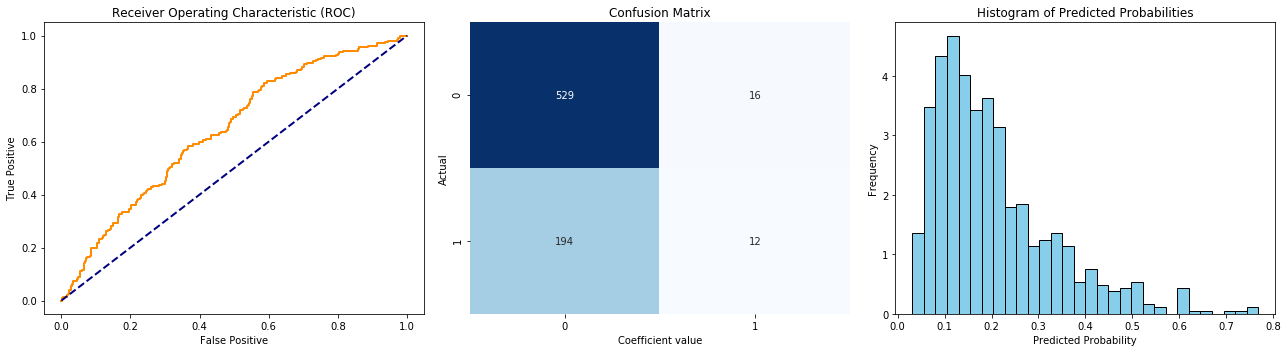

---------------------------------------------------------------------------------------------------
Extra Trees Classifier with HyperParameter Tuning


In [210]:
print("5.2.7.XGBClassifier (XGBoost) with Hyper paramer Tuning")
print("---------------------------------------------------------------------------------------------------")
print(f'Best Model Accuracy: {accuracy_xgbc}')
print('Confusion Matrix:\n', conf_matrix_xgbc)
print("Evaluate the model")

#fig, axs = plt.subplots(2, 3, figsize=(18, 10))
plt.figure(figsize=(18,5,))
plt.subplot(1,3,1)
plt.plot(fpr,tpr, color= 'darkorange', lw=2, label='ROC CURVE')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristic (ROC)')
      
plt.subplot(1,3,2)       
print("Confusion matrix")
sns.heatmap(conf_matrix_xgbc, 
            annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Coefficient value')
plt.ylabel('Actual')          
plt.title('Confusion Matrix')
        
plt.subplot(1,3,3)
print("Histogram of predicted probabilities")
plt.hist(y_pred_proba_xgbc_model_ht, 
         bins=30, edgecolor='black', color='skyblue', density=True)
#sns.distplot(y_prob,bins=num_bins, kde=True)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('m_svc_ht.png')
plt.show()   
print("---------------------------------------------------------------------------------------------------")
print("Extra Trees Classifier with HyperParameter Tuning")

5.2.7. XGBClassifier (XGBoost) with Hyper paramer Tuning

----------
**Comment**:
- Despite being a more complet mode, the XGBC model is a time efficient model.
- Is helpful that the XGBoost prunes trees during the building process to remove branches that contribute little to overall accuracy.
- The xgbc model results provided higher accuracy than previous models  
- In comparison to previous model, we see a much more healthy probablity distrubution, considering a wider range of outcomes.  
- The XBGC in comparison the the first models is more complex.
- We will use the XGBC model in the final Voting Classifier model.


In [ ]:
print("5.2.7.XGBClassifier (XGBoost) with Hyper paramer Tuning")
del elapsed_time,start_time,end_time
del y_pred_proba_etc_model_ht,conf_matrix_etc,
del selected_features_etc,sfm_etc,best_etc_model,best_etc_model_ht,best_params_etc,loaded_best_etc_model
del results_etc_ht,best_etc_model, grid_search_etc, grid_params_etc, etc_model
del x_etc_train, x_etc_test, y_etc_train, y_etc_test
del df_etc , y_etc,x_etc
print("XGBClassifier (XGBoost) with Hyper paramer Tuning")

 - [Top](#table_contents)
 
### 5.2.8.LGBMClassifier (LightGBM)  <a id="lgbmc_ht"></a>
#### Light Gradient Boosting Machine Regression LGB learning rate

- The LightGBM is a gradient boosting framework designed for efficient and distributed training of large-scale machine learning models. 
- LightGBM uses a histogram-based learning approach and employs techniques like leaf-wise tree growth and gradient-based one-side sampling to optimize efficiency. 
- In the **LightGBM classifier**, the optimization problem involves building an ensemble of decision trees in a gradient boosting framework to collectively make accurate predictions. 

**Key Features of LightGBM:**
 - *Gradient Boosting Framework:* LightGBM is a gradient boosting framework that builds an ensemble of weak learners to create a strong predictive model. 
 - *Leaf-wise Tree Growth:* LightGBM uses a leaf-wise tree growth strategy instead of level-wise, which helps in reducing the number of nodes in the tree. 
 - *Histogram-based Learning:* LightGBM bins continuous feature values into discrete bins (histograms) during the training process.

------- 


------- 
### Decision Variables:

Let \( n \) be the number of samples and \( T \) be the total number of trees in the ensemble. For each sample \( i \) and each tree \( t \), introduce decision variables \( \gamma_{i,t} \), \( h_{i,t}(\mathbf{x}) \), and \( w_t \).

$$[\gamma_{i,t}, w_t \in \{0, 1\}, \quad h_{i,t}(\mathbf{x}) \in \mathbb{R}]$$


Here, \( \gamma_{i,t} \) is a binary variable indicating whether sample \( i \) is assigned to tree \( t \), \( w_t \) is a binary variable indicating whether tree \( t \) is selected, and \( h_{i,t}(\mathbf{x}) \) is the prediction for sample \( i \) from tree \( t \).

------- 
### Objective Function:

The objective function aims to minimize a combination of misclassification loss and a regularization term.

$$[\text{Minimize: } \quad \sum_{i} L(y_i, \hat{y}_i) + \sum_{t=1}^{T} \lambda \cdot w_t + \alpha \cdot \left(\sum_{t=1}^{T} \gamma_{i,t} - 1\right)]$$

Here, \( y_i \) is the true label for sample \( i \), \( \hat{y}_i \) is the predicted label based on the ensemble, \( \lambda \) and \( \alpha \) are regularization parameters.

------- 
### Constraints:

1. **Constraint 1: Sample Assignment Constraint:**
   - Each sample must be assigned to exactly one tree.

$$[\sum_{t=1}^{T} \gamma_{i,t} = 1, \quad \forall i]$$

2. **Constraint 2:Tree Selection Constraint:**
   - At most \( B \) trees are selected from the total \( T \) trees.

$$[\sum_{t=1}^{T} w_t \leq B]$$

### Binary Constraints:
- To ensure that the decision variables are either 0 or 1.

$$[\gamma_{i,t}, w_t \in \{0, 1\}]$$

-------




In [ ]:
print("5.2.8.LGBMClassifier (LightGBM) with Hyperparameter Tuning")
print("-------------------------------------------------------------------------------------------------------")
print("LGBMClassifier (LightGBM)")
print("lgb.LGBMClassifier")
import lightgbm as lgb
start_time = time.time()
print("Creating new dataset")
df_lgbm=df_m000.copy()
df_lgbm=df_lgbm.tail(3100)
x_lgbm = df_lgbm[feat_list]
y_lgbm = df_lgbm[target_y]
print(x_lgbm.shape, y_lgbm.shape)
print("Splitting Train and Test set")
print("Splitting")
x_lgbm_train, x_lgbm_test, y_lgbm_train, y_lgbm_test = train_test_split(x_lgbm,
                                                                        y_lgbm, 
                                                                        test_size=test_size0, 
                                                                        random_state=random_state0)
print("Define the LGBMClassifier classifier")
lgbm_classifier = lgb.LGBMClassifier(random_state=random_state0)

print("Define hyperparameters for tuning")
print("Create GridsearchCV for hyperparameter tuning") 
print("Parameters list to search")                                                                   
param_grid_lgbm = {
    'n_estimators': [ 500,1000],
    'learning_rate': [0.05, 0.1],
    'max_depth': [ 5],}
#'subsample': [0.8, 0.9, 1.0]
print("Specify Grid search")
print("Grid Search")
grid_search_lgbm = GridSearchCV(lgbm_classifier,
                           param_grid=param_grid_lgbm, 
                           cv=3, 
                           scoring='accuracy',
                           verbose=2)
print("Fitting")
print("using same  dataset")
grid_search_lgbm.fit(x_lgbm_train,y_lgbm_train)
best_lgbm_model = grid_search_lgbm.best_estimator_
print("Fitting Complete")
# Display the best hyperparameters
best_params = grid_search_lgbm.best_params_
print("Best Hyperparameters:", best_params)
print("-------------------------------------------------------------------------------------------------------")


print("Save the GridSearchCV results")
results_lgbm = pd.DataFrame(grid_search_lgbm.cv_results_)

print(results_lgbm)
results_lgbm.to_csv('grid_search_results_lgbm.csv', index=True)
print("GridSearchCV results saved as 'grid_search_results_lgbm.csv'.")
print("Save the best model")
model_filename = 'best_lgbm_model.pkl'
joblib.dump(best_lgbm_model, model_filename)
print("Saved")

print("-------------------------------------------------------------------------------------------------------")

# Measure the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("LGBMClassifier (LightGBM)")
print("-------------------------------------------------------------------------------------------------------")
print("5.2.8.LGBMClassifier (LightGBM) with Hyperparameter Tuning")

In [204]:
print("5.2.8LGBMClassifier (LightGBM) with Hyperparameter Tuning")
print("-------------------------------------------------------------------------------------------------------")
print("LGBMClassifier (LightGBM)")
start_time = time.time()
# Load the previously saved model
print("# Load the saved model")
loaded_best_lgbm_model = joblib.load('best_lgbm_model.pkl')

print("best parameters and best model-estimator")
# Show best hyperparameters and best estimator from the loaded model
best_params_lgbm = loaded_best_lgbm_model.get_params()
best_lgbm_model = loaded_best_lgbm_model
best_lgbm_model_ht=best_lgbm_model
print("Finding the Best hyperparamters")
print("Best Hyperparameters:", best_params_lgbm)
print("Finding the Model")
print("Best Model:",best_lgbm_model)
#svc_classifier_ht=SVC (** best_params_svc)
#svc_classifier_ht.fit(x_svc_train,y_svc_train)

print("-------------------------------------------------------------------------------------------------------")
print("Make predictions on the test set with the best model")
y_pred_proba_lgbm_model_ht= best_lgbm_model_ht.predict_proba(x_lgbm_test)[:, 1]
y_pred_lgbm_model_ht = best_lgbm_model_ht.predict(x_lgbm_test)


print("-------------------------------------------------------------------------------------------------------")
print("Evaluating the Model")
print("1-Accuracy Score analysis")
accuracy_lgbm =accuracy_score (y_lgbm_test,y_pred_lgbm_model_ht)
print(f'Best Model Accuracy: {accuracy_lgbm}')
print("Decision Tree Classifier training accuracy score is : {}%".format(round(best_lgbm_model.score(x_lgbm_train, 
                                                                                               y_lgbm_train)*100)))
print("Decision Tree Classifier model's accuracy score is : {}%".format(round(accuracy_score(y_lgbm_test,
                                                                                             y_pred_lgbm_model_ht)*100)))
print("-------------------------------------------------------------------------------------------------------")
print("2-Confusion Matrix")
conf_matrix_lgbm= confusion_matrix(y_lgbm_test,y_pred_lgbm_model_ht) 
true_positive = conf_matrix_lgbm[0][0]
false_positive = conf_matrix_lgbm[0][1]
false_negative = conf_matrix_lgbm[1][0]
true_negative = conf_matrix_lgbm[1][0]
print("Confusion_matrix results")
print('True Positive:',
      true_positive, 
      '\nTrue Negative:',
      true_negative, 
      '\nFalse Negative:',
      false_negative, 
      '\nFalse Positive:',
      false_positive)
print('Confusion Matrix:\n', conf_matrix_lgbm)
print("-------------------------------------------------------------------------------------------------------")
print("3-classification_report_result")
classification_report_result_lgbm =classification_report (y_lgbm_test,y_pred_lgbm_model_ht) 
print('Classification Report:\n', classification_report_result_lgbm)
print("-------------------------------------------------------------------------------------------------------")
print("4-ROC Curve") # 
fpr, tpr, thresholds = roc_curve(y_lgbm_test,y_pred_proba_lgbm_model_ht)
roc_auc = auc(fpr, tpr)
print("5-Precision-Recall Curve")
precision, recall, _ = precision_recall_curve(y_lgbm_test,y_pred_proba_lgbm_model_ht)
average_precision = average_precision_score(y_lgbm_test,y_pred_proba_lgbm_model_ht)
#print("6 Feature Importance")
#feature_importance = pd.Series(logreg_model.coef_[0], index=x_lr.columns).sort_values(ascending=False)
# Feature Importance
#feature_importance = pd.Series(logreg_model.coef_[0], index=X.columns).sort_values(ascending=False)
#print("Learning Curve")
#train_sizes, train_scores, test_scores = learning_curve(best_lgbm_model_ht, 
#                                                        x_lgbm,y_lgbm, 
#                                                        cv=5, scoring='accuracy')




print("-------------------------------------------------------------------------------------------------------")

# Measure the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("LGBMClassifier (LightGBM)")
print("-------------------------------------------------------------------------------------------------------")
print("5.2.8.LGBMClassifier (LightGBM) with Hyperparameter Tuning")

LGBMClassifier (LightGBM) with Hyperparameter Tuning
-------------------------------------------------------------------------------------------------------
LGBMClassifier (LightGBM)
# Load the saved model
best parameters and best model-estimator
Finding the Best hyperparamters
Best Hyperparameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 99, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
Finding the Model
Best Model: LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimato

- [Top](#table_contents)
    

LGBMClassifier (LightGBM) with Hyperparameter Tuning
Best Model Accuracy: 0.7483870967741936
Confusion Matrix:
 [[443  24]
 [132  21]]
-------------------------------------------------------------------------------------------------------
Confusion matrix
Histogram of predicted probabilities


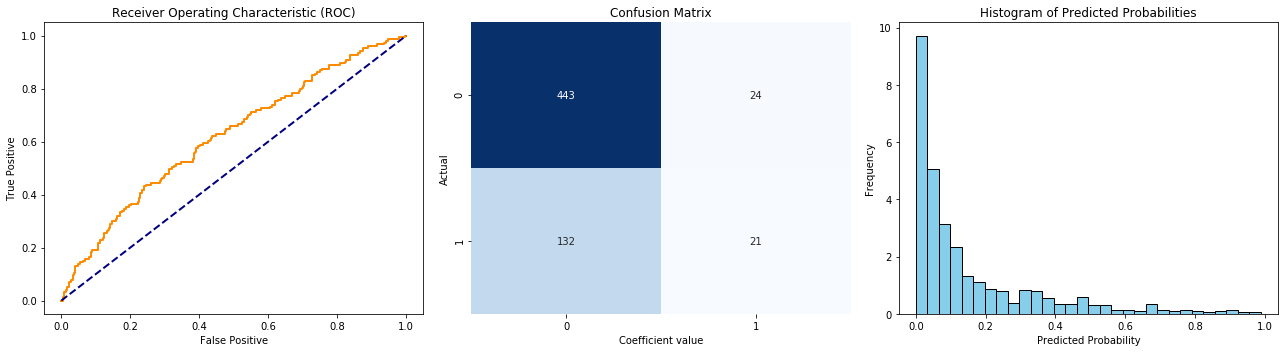

LGBMClassifier (LightGBM) with Hyperparameter Tuning


In [205]:
print("5.2.8.LGBMClassifier (LightGBM) with Hyperparameter Tuning")
print(f'Best Model Accuracy: {accuracy_lgbm}')
print('Confusion Matrix:\n', conf_matrix_lgbm)

print("-------------------------------------------------------------------------------------------------------")
#fig, axs = plt.subplots(2, 3, figsize=(18, 10))
plt.figure(figsize=(18,5,))
plt.subplot(1,3,1)
plt.plot(fpr,tpr, color= 'darkorange', lw=2, label='ROC CURVE')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristic (ROC)')
      
plt.subplot(1,3,2)       
print("Confusion matrix")
sns.heatmap(conf_matrix_lgbm, 
            annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Coefficient value')
plt.ylabel('Actual')          
plt.title('Confusion Matrix')
        
plt.subplot(1,3,3)
print("Histogram of predicted probabilities")
plt.hist(y_pred_proba_lgbm_model_ht, 
         bins=30, edgecolor='black', color='skyblue', density=True)
#sns.distplot(y_prob,bins=num_bins, kde=True)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('m_lgbm_ht.png')
plt.show()       
    
print("5.2.8.LGBMClassifier (LightGBM) with Hyperparameter Tuning")

- [Top](#table_contents)


#### 5.2.8. LGBMClassifier (LightGBM) with Hyperparameter Tuning
-------
- **Comments**: 
- the LGBM  is a strong predictor in comparison to the first models. 
- Is worth highlighting that the accuracy  of the model is heavily dependent on the number of estimators
- It provides higher accuracy level than the previous  models shown
- The histogram shows a more widespread distribution of forecasts probabilites. This is good since there ar emore forecasts signals than the more simple models
- We will use the LGBM Classifier model in the final Voting Classifier model


In [ ]:
print("5.2.8.LGBMClassifier (LightGBM) with Hyperparameter Tuning")

del y_pred_proba_etc_model_ht,conf_matrix_etc,
del selected_features_etc,sfm_etc,best_etc_model,best_etc_model_ht,best_params_etc,loaded_best_etc_model
del results_etc_ht,best_etc_model, grid_search_etc, grid_params_etc, etc_model
del x_etc_train, x_etc_test, y_etc_train, y_etc_test
del df_etc , y_etc,x_etc
print("5.2.8.LGBMClassifier (LightGBM) with Hyperparameter Tuning")

- [Top](#table_contents)

## 5.2.9 Voting Classifier

## Ensemble Technique: Voting Classifier
- - - - - - -
### Heterogeneous Ensemble Machine Learning Model using Voting Classifier

- The VotingClassifier can use variety of classifiers (base learners) that implement the fit and predict methods. 
- When using VotingClassifier with hard voting, all classifiers must be able to predict class labels (i.e., they must have a predict method). 
- When using soft voting, all classifiers must also have a predict_proba method for computing class probabilities.
if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.
- List of classifiers (base learners):
    - LogisticRegression
    - RandomForestClassifier
    - DecisionTreeClassifier
    - BaggingClassifier
    - SVC
    - XGBClassifier (XGBoost)
    - LGBMClassifier (LightGBM)

- - - - - - -
***Comment***:
- We have the option between decision to independently tune the hyperaparameters of each model or decide for a joint hyuperaparmter optimization in a single grid for the entire model 

- I decide for the Joint Hyperparameter Tuning (Single Grid):
- **Pros:**
 - Computationally more efficient as the search space is constrained to a single grid
 - allows for capturing interactions between hyperparameters of different models in the ensemble.

- **Cons:**
- It might not be as fine-tuned for individual base learners as in the case of independent tuning.
- Independent tuning might be more beneficial to capture the unique requirements of each model.

- - - - - - -


In [ ]:
print("5.2.9.Voting Classifier with Hyperparameter tuning")
print("-----------------------------------------------------------------------------------------------------")
start_time = time.time()
#from sklearn.svm import LinearSVC
#from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
print("Models: VotingClassifier with joint hyperparameter tuning")
print("LogisticRegression, DecisionTreeClassifier, RandomForestClassifier,  Extra Tree Classifiers")
print("Baggign Classifiers, Svc ")
print("XGBClassifier (XGBoost),LGBMClassifier (LightGBM)")
print("-----------------------------------------------------------------------------------------------------")

df_vc=df_m000.copy()
df_vc=df_vc.tail(3100)
x_vc = df_vc[feat_list]
y_vc = df_vc[target_y]
print(x_vc.shape[0])
print(y_vc.shape[0])
print(y_vc.shape, y_vc.shape)
print("Splitting Train and Test set")
x_vc_train, x_vc_test, y_vc_train, y_vc_test = train_test_split(x_vc, 
                                                                y_vc, 
                                                                test_size=test_size0, 
                                                                random_state=random_state0)
print(x_vc_train.shape, x_vc_test.shape)

print("Define individual classifiers with hyperparameter tuning")
print("Define the Models")
# Define base classifiers
vc_logreg = LogisticRegression(max_iter=1000,random_state=random_state0)
vc_dtc = DecisionTreeClassifier(random_state=random_state0)
vc_rfc = RandomForestClassifier(random_state=random_state0)
vc_etc = ExtraTreesClassifier(random_state=random_state0)
vc_bag = BaggingClassifier(random_state=random_state0)
vc_svc = SVC(probability=True,)
vc_xgbc = XGBClassifier(random_state=random_state0)
vc_lgbm = LGBMClassifier(random_state=random_state0)


print("Joint Unified Hyperparameter Tuning")
print("Define hyperparameters for tuning")
print("Since we already know the parameters around which the best  indfividal odel reside, in order to save compouter pricessingtim")
print("we will make the hyperaprmaters near th eoptimimum ")
param_grid_vc = {
#    'vc_logreg__C': [0.1,],
#    'vc_logreg__penalty': ['l1'],
    
#    'vc_dtc__criterion': [ 'entropy'],
#    'vc_dtc__splitter' : ['best'], 
#    'vc_dtc__max_depth': [3],
#    'vc_dtc__min_samples_split' : [ 2,],
#    'vc_dtc__min_samples_leaf' : [4 ],
#    'vc_dtc__max_features' : ['auto'], 
    
#    'vc_rfc__criterion' : ['entropy'],
#    'vc_rfc__n_estimators': [100],
#    'vc_rfc__max_depth': [10],
#    'vc_rfc__min_samples_split': [5],
#    'vc_rfc__min_samples_leaf': [2],
    
    'vc_etc__n_estimators': [300],
    'vc_etc__criterion' : ['gini'],
    'vc_etc__max_depth': [4 ],
    'vc_etc__min_samples_split' : [6],
    'vc_etc__min_samples_leaf' : [1],
    'vc_etc__max_features' : ['sqrt'],
    
#    'vc_bag__n_estimators': [15 ],
#    'vc_bag__base_estimator': [None],
#    'vc_bag__max_samples' : [2 ],
#    'vc_bag__max_features' : [2 ],
    
#    'vc_svc__C': [0.1],
#    'vc_svc__kernel': ['rbf'],
#    'vc_svc__gamma': ['auto'],
    
    'vc_xgbc__n_estimators':[1000],
    'vc_xgbc__learning_rate': [0.1],
    'vc_xgbc__max_depth': [7],
    
    'vc_lgbm__n_estimators':[1000],
    'vc_lgbm__learning_rate': [0.1],
    'vc_lgbm__max_depth': [ 7],
}



print("Create a Voting Classifier")
# Create the Voting Classifier
voting_classifier = VotingClassifier(estimators=[
#    ('vc_logreg', vc_logreg),
#    ('vc_dtc', vc_dtc),
#    ('vc_rfc', vc_rfc),
    ('vc_etc', vc_etc),
#    ('vc_bag', vc_bag),
#    ('vc_svc', vc_svc),
    ('vc_xgbc', vc_xgbc),
    ('vc_lgbm', vc_lgbm)
], voting='soft')

print("Specify Grid search")
print("Grid Search")
print("Creatin the GridSearchCV for joint hyperparameter tuning")
grid_search_vc = GridSearchCV(voting_classifier, 
                              param_grid=param_grid_vc,
                              cv=5,verbose=2,  scoring='accuracy')

print("Fitting")
print("using same  dataset")
grid_search_vc.fit(x_vc_train, y_vc_train)
print("Fitting Complete")
print("best estimator after fitting")
best_vc_model = grid_search_vc.best_estimator_
best_voting_classifier = grid_search_vc.best_estimator_
best_vc_params = grid_search_vc.best_params_
print("-----------------------------------------------------------------------------------------------------")

#print("After finding the best model, make predictions on the test set with the best model")
#y_pred = best_voting_model.predict(x_vc_test)
# Get the best model and parameters
#best_voting_classifier = grid_search.best_estimator_
#best_params = grid_search.best_params_

print("Save the GridSearchCV results")
results_vc_ht = pd.DataFrame(grid_search_vc.cv_results_)
#print(results_logreg_ht)
results_vc_ht.to_csv('grid_search_results_vc.csv', index=True)
print("GridSearchCV results saved as 'grid_search_results_vc.csv'.")
print("Save the best model")
model_filename = 'best_vc_model.pkl'
joblib.dump(best_vc_model, model_filename)
print("Saved")

# Measure the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
# Print the elapsed time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("-----------------------------------------------------------------------------------------------------")
print("Voting Classifier with Hyperparameter tuning")

#[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.6min finished
#Elapsed Time: 193.81 seconds

- [Top](#table_contents)

In [195]:
print("5.2.9.Voting Classifier with Hyperparameter tuning")
print("# Load the saved model")
loaded_best_vc_model = joblib.load('best_vc_model.pkl')

print("best parameters and best model-estimator")
# Show best hyperparameters and best estimator from the loaded model
best_params_vc = loaded_best_vc_model.get_params()
best_vc_model = loaded_best_vc_model
best_vc_model_ht=best_vc_model
print("Finding the Best hyperparamters")
#print("Best Hyperparameters:", best_params_vc)
print("Finding the Model")



print("Make predictions on the test set with the best model")
y_pred_proba_vc_model_ht= best_vc_model_ht.predict_proba(x_vc_test)[:, 1]
y_pred_vc_model_ht = best_vc_model_ht.predict(x_vc_test)
                                         
                                         
print("Evaluating the Model")                                        
print("Evaluating the Model")
print("Evaluating the Model")
print("--------------------------------------------------------------------------------------------")
print("1-Accuracy Score analysis")
accuracy_vc =accuracy_score (y_vc_test,y_pred_vc_model_ht)
print(f'Best Model Accuracy: {accuracy_vc}')
print("Decision Tree Classifier training accuracy score is : {}%".format(round(best_vc_model.score(x_vc_train, 
                                                                                               y_vc_train)*100)))
print("Decision Tree Classifier model's accuracy score is : {}%".format(round(accuracy_score(y_vc_test,
                                                                                             y_pred_vc_model_ht)*100)))
print("--------------------------------------------------------------------------------------------")
print("2-Confusion Matrix")
conf_matrix_vc= confusion_matrix(y_vc_test,y_pred_vc_model_ht) 
confusion_matrix_vc=conf_matrix_vc
true_positive = conf_matrix_vc[0][0]
false_positive = conf_matrix_vc[0][1]
false_negative = conf_matrix_vc[1][0]
true_negative = conf_matrix_vc[1][0]
print("Confusion_matrix results")
print('True Positive:',
      true_positive, 
      '\nTrue Negative:',
      true_negative, 
      '\nFalse Negative:',
      false_negative, 
      '\nFalse Positive:',
      false_positive)
print('Confusion Matrix:\n', conf_matrix_vc)
print("--------------------------------------------------------------------------------------------")
print("3-classification_report_result")
classification_report_result_vc =classification_report (y_vc_test,y_pred_vc_model_ht) 
print('Classification Report:\n', classification_report_result_vc)
print("4-ROC Curve") # 
fpr, tpr, thresholds = roc_curve(y_vc_test,y_pred_proba_vc_model_ht)
roc_auc = auc(fpr, tpr)
print("5-Precision-Recall Curve")
precision, recall, _ = precision_recall_curve(y_vc_test,y_pred_proba_vc_model_ht)
average_precision = average_precision_score(y_vc_test,y_pred_proba_vc_model_ht)


print("6 Feature Importance")
#feature_importance = pd.Series(logreg_model.coef_[0], index=x_lr.columns).sort_values(ascending=False)
# Feature Importance
#feature_importance = pd.Series(logreg_model.coef_[0], index=X.columns).sort_values(ascending=False)
print("Learning Curve")
#train_sizes, train_scores, test_scores = learning_curve(best_vc_model_ht, 
#                                                        x_vc,y_vc, 
#                                                        cv=5, scoring='accuracy')

# Feature importance analysis (choose any base learner)
#feature_importance = loaded_model.named_estimators_['lgbm'].feature_importances_
#feature_names = X_train.columns

# Sort features based on importance
#sorted_idx = np.argsort(feature_importance)[::-1]
print("--------------------------------------------------------------------------------------------")
print("5.2.9.Voting Classifier with Hyperparameter tuning")

Voting Classifier with Hyperparameter tuning
# Load the saved model
best parameters and best model-estimator
Finding the Best hyperparamters
Finding the Model
Make predictions on the test set with the best model
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Evaluating the Model
Evaluating the Model
Evaluating the Model
--------------------------------------------------------------------------------------------
1-Accuracy Score analysis
Best Model Accuracy: 0.7483870967741936
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Decision Tree Classifier training accuracy score is : 100.0%
Decision Tree Classifier model's accuracy score is : 75.0%
--------------------------------------------------------

- [Top](#table_contents)

In [196]:
print("5.2.9.Voting Classifier with Hyperparameter tuning")
print("--------------------------------------------------------------------------------------------")
print("Most important Features:")
# most important features and parameters of the modelfor one of the base learner
# XGBC ('vc_xgbc', vc_xgbc),
feature_importance_vc_xgbc = loaded_best_vc_model.named_estimators_['vc_xgbc'].feature_importances_
feature_names = x_vc_train.columns
sorted_idx = np.argsort(feature_importance)[::-1]

print("Top 5 Important Features: xgbc")
for i in range(5):
    print(f"{feature_names[sorted_idx[i]]}: {feature_importance_vc_xgbc[sorted_idx[i]]}")    
        
    
print("--------------------------------------------------------------------------------------------")
# (LGBM) ('vc_lgbm', vc_lgbm)
feature_importance_vc_lgbm = loaded_best_vc_model.named_estimators_['vc_lgbm'].feature_importances_
feature_names = x_vc_train.columns
sorted_idx = np.argsort(feature_importance)[::-1]

print("Top 5 Important Features: LGBM")
for i in range(5):
    print(f"{feature_names[sorted_idx[i]]}: {feature_importance_vc_lgbm[sorted_idx[i]]}")
print("--------------------------------------------------------------------------------------------")
print("Voting Classifier with Hyperparameter tuning")

Voting Classifier with Hyperparameter tuning
--------------------------------------------------------------------------------------------
Most important Features:
Top 5 Important Features: xgbc
sp500_diff_lag1: 0.006099988706409931
sp500_diff_lag2: 0.0035541735123842955
3s2s_zscore30_lag1: 0.007061939220875502
usd_index_diff_lag2: 0.004032657947391272
nasdaq_diff_lag1: 0.003306259633973241
--------------------------------------------------------------------------------------------
Top 5 Important Features: LGBM
sp500_diff_lag1: 462
sp500_diff_lag2: 552
3s2s_zscore30_lag1: 383
usd_index_diff_lag2: 432
nasdaq_diff_lag1: 437
--------------------------------------------------------------------------------------------
Voting Classifier with Hyperparameter tuning


- [Top](#table_contents)

Voting Classifier with Hyperparameter tuning
--------------------------------------------------------------------------------------------
Best Model Accuracy: 0.7483870967741936
--------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85       467
           1       0.45      0.10      0.16       153

    accuracy                           0.75       620
   macro avg       0.61      0.53      0.51       620
weighted avg       0.69      0.75      0.68       620

--------------------------------------------------------------------------------------------
Voting Classifier with Hyperparameter tuning
Confusion matrix
Histogram of predicted probabilities


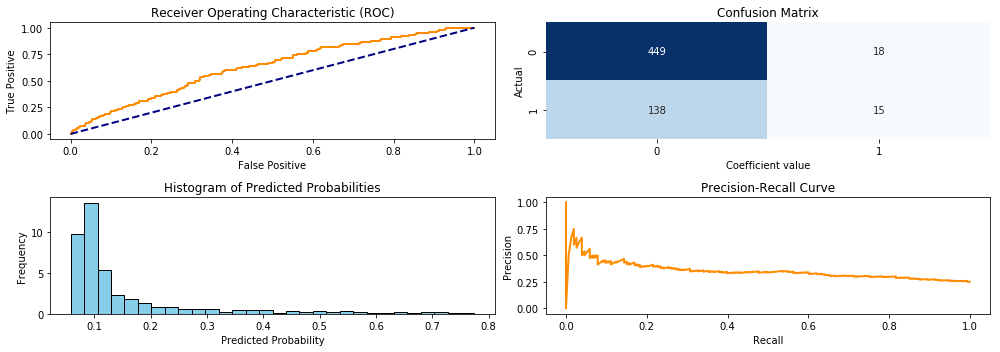

--------------------------------------------------------------------------------------------
Voting Classifier with Hyperparameter tuning


In [197]:
print("5.2.9.Voting Classifier with Hyperparameter tuning")
print("--------------------------------------------------------------------------------------------")
print(f'Best Model Accuracy: {accuracy_vc}')
print("--------------------------------------------------------------------------------------------")
print('Classification Report:\n', classification_report_result_vc)
print("--------------------------------------------------------------------------------------------")
print("Voting Classifier with Hyperparameter tuning")
#fig, axs = plt.subplots(2, 3, figsize=(18, 10))
plt.figure(figsize=(14,5,))
plt.subplot(2,2,1)
plt.plot(fpr,tpr, color= 'darkorange', lw=2, label='ROC CURVE')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristic (ROC)')
      
plt.subplot(2,2,2)       
print("Confusion matrix")
sns.heatmap(conf_matrix_vc, 
            annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Coefficient value')
plt.ylabel('Actual')          
plt.title('Confusion Matrix')
        
plt.subplot(2,2,3)
print("Histogram of predicted probabilities")
plt.hist(y_pred_proba_vc_model_ht, 
         bins=30, edgecolor='black', color='skyblue', density=True)
#sns.distplot(y_prob,bins=num_bins, kde=True)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')

plt.subplot(2,2,4)
# Plot Precision-Recall Curve
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.savefig('m_vc_ht.png')
plt.show()       
print("--------------------------------------------------------------------------------------------")    
print("Voting Classifier with Hyperparameter tuning")

- [Top](#table_contents)

### ***5.2.9. Voting Classifier with Hyperparameter tuning***
***Comments***:
 

- We developed a Ensemle Learning Soft Voting Classifier using a joint hyperparameter tuning for a binary classification problem. 
- The **accuracy of the model is high above 70%** of times 
- Worth nothing that when the model was run originally  with all the different base learners, we found that there were a subset of specific base learner that were not improving the overall model. 
- In the end the models that we kept where the  bas learners that improve the overall model accuracy such as:  Extra Tree Classifier, XGBC Classifier models and the LGBM  classifier model. 
- When looking  histogram of predictive probability we see that there is a right skewed tails corresponding to the event with higher probability.This means that the model can discriminate low and high probabilities for the forecast.
- When looking at the most important  features, of the xgbc and LGBM models we found that the most important variables are  the 3s2s(z score scaled) and the sp500 and the Nasdaq (stationary versions in differences) . This makes sense from an economic perspective. 
- Given this optimized model we move forward with the back testing of the results as a trading strategy.


- [Top](#table_contents)

------
### 6 Backtestintg results:<a id="backtest"></a>

- As a final step, we proceed to back test the results as a trading strategy. 
- In a first stage we will use the prediction output of the Soft Voting Classifier model as the signal to proceed to make an investing that specific day. (Note that at the moment of the forecast we only consider lagged data and  available data at the moment of the forecasts for accuracy and application purposes)
- We will **only consider the testing dataset** for the strategy backtesting
- its important to indicate that since this is a binary classification model with a random seed, the testing sample is randomly scattered all around  dataset, which means that both the training and testing are not subject to a specific economic cycle.
------
- The soft voting signal activates when the forecasted probability is above 50%.(standard threshold decision) 
- In that case when the signal is activated (signal:1) we would simulate which would be the return in that point in time. 
- After that we would proceed and accumulate the return and graph the results.
- We find a **positive accumulated return** int the trading strategy applying the soft voting classifier model results.


In [198]:
print("Backtesting")
print("--------------------------------------------------------------------------------------------")   
print("Aggregating all datasets")
#print(y_vc_test.shape)
#print(y_vc_test.head(5))
y_vc_test_df=pd.DataFrame(y_vc_test)
y_vc_test_df.index=y_vc_test.index
y_vc_test_df.columns=['target_test']

y_pred_proba_vc_model_ht_df=pd.DataFrame(y_pred_proba_vc_model_ht)
y_pred_proba_vc_model_ht_df.index=y_vc_test.index
y_pred_proba_vc_model_ht_df.columns=['prob_model']
#print(y_pred_proba_vc_model_ht_df.shape)
#print(y_pred_proba_vc_model_ht_df.head(5))

y_pred_vc_model_ht_df=pd.DataFrame(y_pred_vc_model_ht)
y_pred_vc_model_ht_df.index=y_vc_test.index
y_pred_vc_model_ht_df.columns=['pred_model']
#print(y_pred_vc_model_ht_df.shape)
#print(y_pred_vc_model_ht_df.head(5))

result_backtesting = pd.merge(y_vc_test_df, y_pred_proba_vc_model_ht_df, left_index=True, right_index=True, how='outer')
result_backtesting = pd.merge(result_backtesting, y_pred_vc_model_ht_df, left_index=True, right_index=True, how='outer')
result_backtesting = result_backtesting.sort_index()
result_backtesting = pd.merge(result_backtesting, df_target_y, left_index=True, right_index=True, how='inner')
#print(result_backtesting.shape)
#print(result_backtesting.head(5))
#print(result_backtesting.tail(5))

print("Simulating accumulated returns")
def new_column_value(row):
    if row['pred_model'] == 1:
        return row['2s1s_diff']
    else:
        return 0

# Create a new column based on conditions
result_backtesting['prediction_prob50_return'] = result_backtesting.apply(new_column_value, axis=1)
result_backtesting['prediction_prob50_return_cumulative'] = result_backtesting['prediction_prob50_return'].cumsum()

result_backtesting['target_test_prob40'] = result_backtesting['prob_model'].apply(lambda x: 1 if x > 0.4 else 0)
def new_column_value40(row):
    if row['target_test_prob40'] == 1:
        return row['2s1s_diff']
    else:
        return 0
result_backtesting['prediction_prob40_return'] = result_backtesting.apply(new_column_value40, axis=1)
result_backtesting['prediction_prob40_return_cumulative'] = result_backtesting['prediction_prob40_return'].cumsum()


result_backtesting['target_test_prob35'] = result_backtesting['prob_model'].apply(lambda x: 1 if x > 0.35 else 0)
def new_column_value35(row):
    if row['target_test_prob35'] == 1:
        return row['2s1s_diff']
    else:
        return 0
result_backtesting['prediction_prob35_return'] = result_backtesting.apply(new_column_value35, axis=1)
result_backtesting['prediction_prob35_return_cumulative'] = result_backtesting['prediction_prob35_return'].cumsum()

result_backtesting_g0=result_backtesting['prediction_prob50_return_cumulative']
print(result_backtesting_g0.shape)
result_backtesting_g1=result_backtesting[['prediction_prob50_return_cumulative',
                                         'prediction_prob40_return_cumulative',
                                         'prediction_prob35_return_cumulative']]


#print(result_backtesting_g1.shape)

print("--------------------------------------------------------------------------------------------")   
print("Backtesting")

Backtesting
--------------------------------------------------------------------------------------------
Aggregating all datasets
Simulating accumulated returns
(620,)
--------------------------------------------------------------------------------------------
Backtesting


- [Top](#table_contents)

Backtesting
--------------------------------------------------------------------------------------------
Plotting the accumualting return of the prediciton


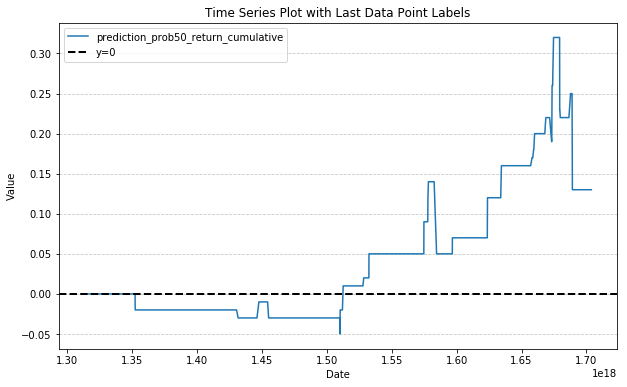

--------------------------------------------------------------------------------------------
Backtesting


In [199]:
print("Backtesting")
print("--------------------------------------------------------------------------------------------")   
print("Plotting the accumualting return of the prediciton")
plt.figure(figsize=(10, 6))


plt.plot(result_backtesting_g0.index, result_backtesting_g0,)
# Add grid lines every 0.1 on the y-axis
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.05))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='black', linewidth=2, linestyle='--', label='y=0')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot with Last Data Point Labels')
plt.legend()
plt.savefig('backtesting_strategy1.png')
plt.show()

print("--------------------------------------------------------------------------------------------")   
print("Backtesting")

Backtesting
--------------------------------------------------------------------------------------------
Plot of different trehsholds results


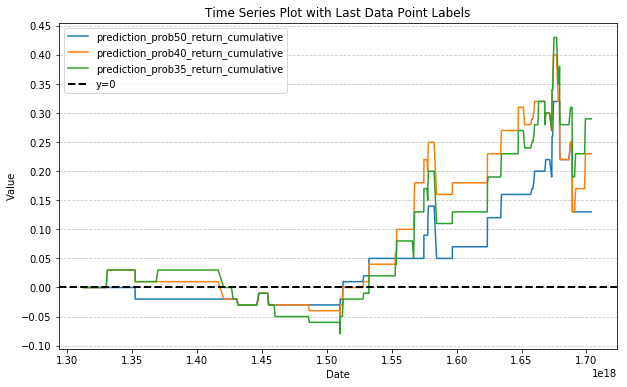

--------------------------------------------------------------------------------------------
Backtesting


In [200]:


print("Backtesting")
print("--------------------------------------------------------------------------------------------")   
print("Plot of different trehsholds results")
plt.figure(figsize=(10, 6))

for column in result_backtesting_g1.columns:
    plt.plot(result_backtesting_g1.index, result_backtesting_g1[column], label=column)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.05))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='black', linewidth=2, linestyle='--', label='y=0')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot with Last Data Point Labels')
plt.legend()
plt.savefig('backtesting_strategy1a.png')
plt.show()

print("--------------------------------------------------------------------------------------------")   
print("Backtesting")

- [Top](#table_contents)
Backtesting Results:
***Comments:***
- As can be seen in the first time series graph , the accumulated return of applying the soft voting classifier  as a trading strategy is positive. 
- Since the trading single originally was conditional that the probability was above 50%, i tried to simulate different interactions considering different thresholds. 
- As a result i added new trading strategy simulation when the probability is above 40% and 35%. 
- Finally inthe second graph , we can see the 3 simualtions with the different tresholds
- Both simulation accumulated return are also positive. Which means that this strategy could be expanded to consider lower threshold


- [Top](#table_contents)

In [ ]:
del loaded_best_vc_model,best_params_vc,best_vc_model,best_vc_model_ht
del y_pred_proba_vc_model_ht,y_pred_vc_model_ht
del conf_matrix_vc,accuracy_vc,confusion_matrix_vc

    
- [Top](#table_contents)

### 7. Conclusion <a id="conclusion"></a>

**Findings:**
- We achieved the main goal of developing an Ensemble Learning Voting  Classifier Model (soft voting version)  to predict  the target (binomial) variable. 
 - Subsequently we proved that the application of this predictive signal  can be converted into a profitable and effective trading strategy
 - The distinctive of this project was the we employed both financial and economic data as predictors, used several different optimized machine learning models as base learners and applied several statistical tool to secure the accuracy and  robustness of the results. 
 - Also is worth mentioning that, since this is a  binary classification problem in which we divide the training and testing dataset randomly (random seed provided), the results of the model are not dependent on the economic cycle. This is an additional robustness check of the model's result.
- When analyzing the  results of the voting classifier model, we found that the variables more important for the base learners make sense from an economic point of view. 
- We found that more simple models such as logistic probability regressions and decision classifier tree were not helpful for the overall accuracy of the model. While the most complex model such as xgbc classifier and lgbm classifier had better predictive power. 
- This was a special project since we incorporate a new approach to a complex dataset that spans several years and incorporate a variety of different predictions to create a simple solution


-------


**Further things to explore in further related research:**
- Replace the model with different target variables such as different curves spreads (3s2s or 5s2s for example) and with different detection thresholds. 
- Simulate the difference of outcomes when using a join hyperparameters tuning grid or fine tuning each model independently.
- Explore more economic variables to add into the model 
- Add the other yield curve rates such as the UK yield curve or Euro yield curve. 
- Test and compare the  profitability of the application of each individual base learner model 
- Add more base learners such as Adaboost or linear SVM, for example. 
- Add a more extensive range of variables in the parameter grid. s


- [Top](#table_contents)
### 8 References <a id="references"></a>


- CQF Lifelong Library “Advanced Machine Learning I & II “ 
- CQF Lifelong Library “Ensemble Techniques Machine Learning “ 
- Breiman, L. (1996). Bagging predictors. Machine Learning, 24(2), 123-140.
- Caruana, R., & Niculescu-Mizil, A. (2006). An empirical comparison of supervised learning algorithms. In Proceedings of the 23rd International Conference on Machine learning (pp. 161-168).
- Chen, T., & Guestrin, C. (2016). XGBoost: A scalable tree boosting system. In Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (pp. 785-794).
- Dietterich, T. G. (2000). Ensemble methods in machine learning. In International Workshop on Multiple Classifier Systems (pp. 1-15).
- Friedman, J. H. (2001). Greedy function approximation: A gradient boosting machine. Annals of Statistics, 1189-1232.
- Freund, Y., & Schapire, R. E. (1997). A decision-theoretic generalization of on-line learning and an application to boosting. Journal of Computer and System Sciences, 55(1), 119-139.
- Hasan  M.. “A Blending Ensemble Learning Model for Crude Oil Price Prediction”
- Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer.
- Polikar, R. (2006). Ensemble learning. In Encyclopedia of Machine Learning (pp. 326-331). Springer.
- Rokach, L., & Maimon, O. (2005). Top-down induction of decision trees classifiers—a survey. IEEE Transactions on Systems, Man, and Cybernetics, Part C (Applications and Reviews), 35(4), 476-487.
- Zhou, Z. H. (2012). Ensemble learning. Frontiers of Computer Science, 6(2), 151-163



- [Top](#table_contents)   

- [Top](#table_contents)